# Table of Contents
<br>
<ol>
    <ol>
        <h2>1. <a href='#1' style="text-decoration : none; color : #000000;"> 50:50 Infected/Uninfected Users</a></h2>
        <ul>
            <a href='#1.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#1.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.B' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#1.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
         <ul>
            <a href='#1.C' style="text-decoration : none; color : #000000;"><h3>C. 70:30 Train Test Split </h3></a>
            <ul><a href='#1.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            <ul><a href='#1.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.E' style="text-decoration : none; color : #000000;"><h3>E. 90:10 Train Test Split </h3></a>
            <ul><a href='#1.E.E' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#1.F' style="text-decoration : none; color : #000000;"><h3>F. 90:10 Train Test Split with PCA </h3></a>
            <ul><a href='#1.F.F' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
    <br>
    <ol>
        <h2>2. <a href='#2' style="text-decoration : none; color : #000000;"> 70:30 Uninfected/Infected Users</a></h2>
        <ul>
            <a href='#2.A' style="text-decoration : none; color : #000000;"><h3>A. 80:20 Train Test Split </h3></a>
            <ul><a href='#2.A.A' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.B' style="text-decoration : none; color : #000000;"><h3>B. 80:20 Train Test Split with PCA </h3></a>
            <ul><a href='#2.B.B' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.C' style="text-decoration : none; color : #000000;"><h3>C. 70:30 Train Test Split </h3></a>
            <ul><a href='#2.C.C' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.D' style="text-decoration : none; color : #000000;"><h3>D. 70:30 Train Test Split with PCA </h3></a>
            <ul><a href='#2.D.D' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.E' style="text-decoration : none; color : #000000;"><h3>E. 90:10 Train Test Split </h3></a>
            <ul><a href='#2.E.E' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
        <ul>
            <a href='#2.F' style="text-decoration : none; color : #000000;"><h3>F. 90:10 Train Test Split with PCA </h3></a>
            <ul><a href='#2.F.F' style="text-decoration : none; color : #000000;"><h4>Comparision Table </h4></a></ul>
        </ul>
     </ol>
</ol>

In [29]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import missingno as msno
import pprint
from tabulate import tabulate
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
pd.set_option("display.max_columns",80)
pd.set_option('display.max_rows', 1200)
warnings.filterwarnings("ignore")

from IPython.display import HTML


import keras
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss,classification_report
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.decomposition import PCA
from sklearn.ensemble import VotingClassifier

<a id='1' style="text-decoration : none; color : #000000;"><h3>1.50:50 Infected/Uninfected Users</h3.</a>

In [30]:
z=pd.read_csv('Feature_with_Hour_Class_Dest.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [31]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [32]:
no_med_user=pd.read_csv('Source_User_No_Medium_Severity.csv')
no_med_user.drop(['Unnamed: 0'],axis=1,inplace=True)
no_med=no_med_user.Source_User
z.reset_index(inplace=True)
x=z[(z.Target=='infected')&(z.Source_User.isin(no_med))]
y=z[(z.Target=='uninfected')]
y=y.sample(n=28)
z=(x.append(y))
z.set_index(['Source_User'],drop=True,inplace=True)

In [33]:
z.Target.value_counts()

uninfected    28
infected      28
Name: Target, dtype: int64

In [34]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [35]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

Number of Records  \
Source_User                                                             
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                890   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                370   

                                                    Average Size of Packets Received  \
Source_User                                                                            
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                         52.117978   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                         13.359459   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                     30.852809   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                     11.502703   

                                                    Average Elapsed Time  \
Source_User                                                                
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...             65.392135   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...             70.683784   

                                                    Average number of Bytes sent  \
Source_User                                                                        
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                   3816.725843   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                   2229.610811   

                                                    Average number of Bytes received  \
Source_User                                                                            
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                      57168.642697   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                       9556.400000   

                                                    Number of different Source Ports  \
Source_User                                                                            
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                             863.0   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                             364.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                                    9.0   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                                    6.0   

                                                    Number of different Applications  \
Source_User                                                                            
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                                37   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                                23   

                                                    Number of different Source IP  \
Source_User                                                                         
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                             26   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                             36   

                                                    Number of different Destination IP  \
Source_User                                                                              
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                                 281   
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d88754566...                                 152   

                                                    Average differnce in Received Time  \
Source_User                                                                              
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b1...                         2831.625843   
8b7d9bb36cbb3b6d3defe02

In [36]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
Y=Y.apply(lambda x: 1 if x=='infected' else 0)
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
0caa319489c018ddc7862bf2dafc054889ec8066de3f5b166d1a26e9f12920a4    1
8b7d9bb36cbb3b6d3defe024d4b980f5bedb71d8875456642e2b173dede2a3c7    1
1ae179941a51b6599b3f4994f658a862138043cce85ce46682b7c73cc9ff7249    0
645ee32ae1c84817505808b1a84e53565542cebd89d00d56207c3a8d111c60e5    1
07a805db92f77828144af02c110b4107381c8608ff69cbe8322b1619550dca26    1
b1d81f7de972e44a6845b9556ed3485a9b9a4a27c499d707ca91d3f5aa2334cc    1
513dfa268f8c3fc7a35f385ba1dad1f446c2bab3276393fd875f2b44f6759bcb    0
3df5898d8eb854960e7c1f0004ef267704f6001b7db464bad368a2a9c9217f69    0
746cc65da95896084ec8c8ec9a7f5e892c516c0dd33894a85e4e4dbabd2bf6aa    0
33a350d300c63d542a5bbc2f9a05d1284ec0a3e7a83ef5079d0928ee22ff17d5    0
Name: Target, dtype: int64

<a id='1.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [38]:
from pandas_ml import ConfusionMatrix
def get_params(grid,model_name=''):
    print("Best Parameters are :")
    display(pd.DataFrame.from_dict(grid.best_params_, orient='index').reset_index().transpose())

def get_cm(model,x,y):
    y_pred=model.predict(x)
    cm=ConfusionMatrix(y,y_pred)
    display(cm)
#     display(pd.crosstab(y, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))

def get_classification_report(model,x,y):
    print(classification_report(y,model.predict(x)))
    
def get_accuracy_plot(data,title=''):
    plt.figure(figsize=(12,8))
    plt.plot(data['accuracy'].values, '--o')
    plt.ylabel('Accuracy', fontsize=20)
    plt.xlabel('Classifier', fontsize=20)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tick_params(axis='both', which='minor', labelsize=12)
    plt.xlim([0, 9])
    plt.title(title,size=18,y=1.05)
    plt.xticks(np.arange(10),data.index.get_values(),rotation=90)
    plt.legend(loc='upper right', fontsize=18)
    plt.show()

def grid(kernel,params,x,y,x_test,y_test,model_name=''):
    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    grid_search=GridSearchCV(estimator=kernel,param_grid=parameters,scoring='accuracy',cv=kfold)
    grid_search.fit(x,y)
    get_params(grid_search,model_name)
    print("\nAccuracy of the ",model_name," model for training data is:",accuracy_score(Y_train,grid_search.predict(X_train)))
    print("\nConfusion Matrix for Training data is:")
    get_cm(grid_search,x,y)
    print("Accuracy of the ",model_name," model for test data is:",accuracy_score(y_test,grid_search.predict(x_test)))
    print("\nConfusion Matrix for test data is:")
    get_cm(grid_search,x_test,y_test)
    
    return grid_search    

In [39]:
table_80_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           20  uniform


Accuracy of the  KNN  model for training data is: 0.681818181818

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          15   6       21
1           8  15       23
__all__    23  21       44

Accuracy of the  KNN  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          1  4        5
__all__    7  5       12

In [41]:
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)
cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))
table_80_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [42]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.772727272727

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          15   6       21
1           4  19       23
__all__    19  25       44

Accuracy of the  Logistic  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          3  2        5
__all__    9  3       12

In [44]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [45]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.931818181818


Predicted   0   1  __all__
Actual                    
0          18   3       21
1           0  23       23
__all__    18  26       44

Accuracy of Random Forest Model on test data is: 0.75


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          1  4        5
__all__    6  6       12

In [46]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

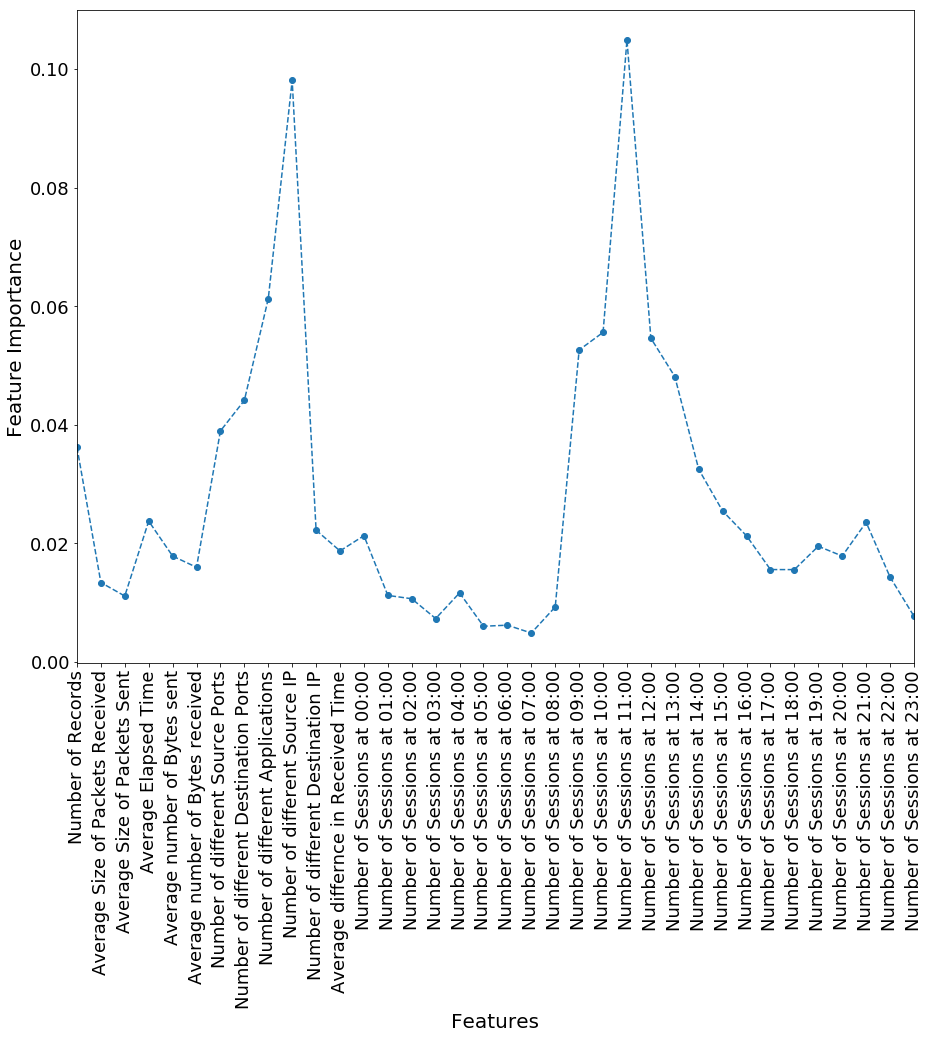

In [47]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [48]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          21   0       21
1           0  23       23
__all__    21  23       44

Accuracy of the  AdaBoostClassifier  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  3        7
1          1  4        5
__all__    5  7       12

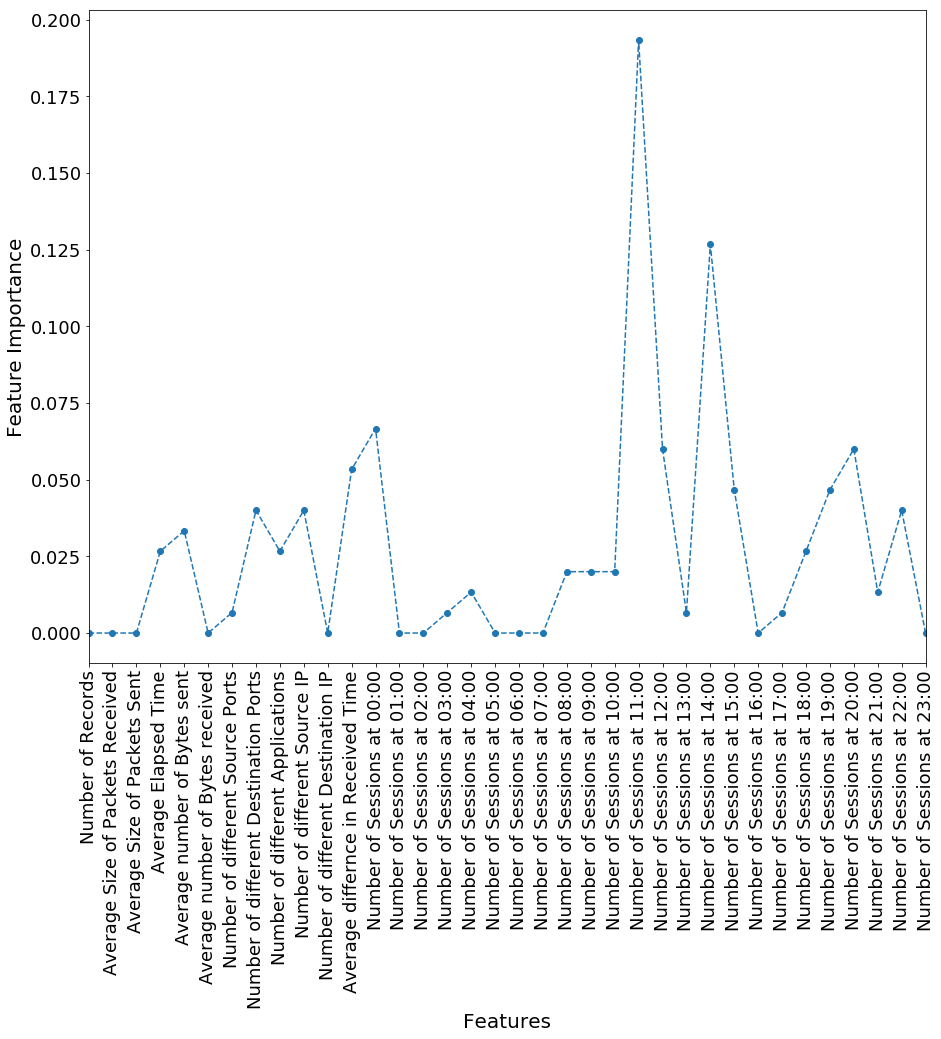

In [49]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [50]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.818181818182

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          17   4       21
1           4  19       23
__all__    21  23       44

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          2  3        5
__all__    9  3       12

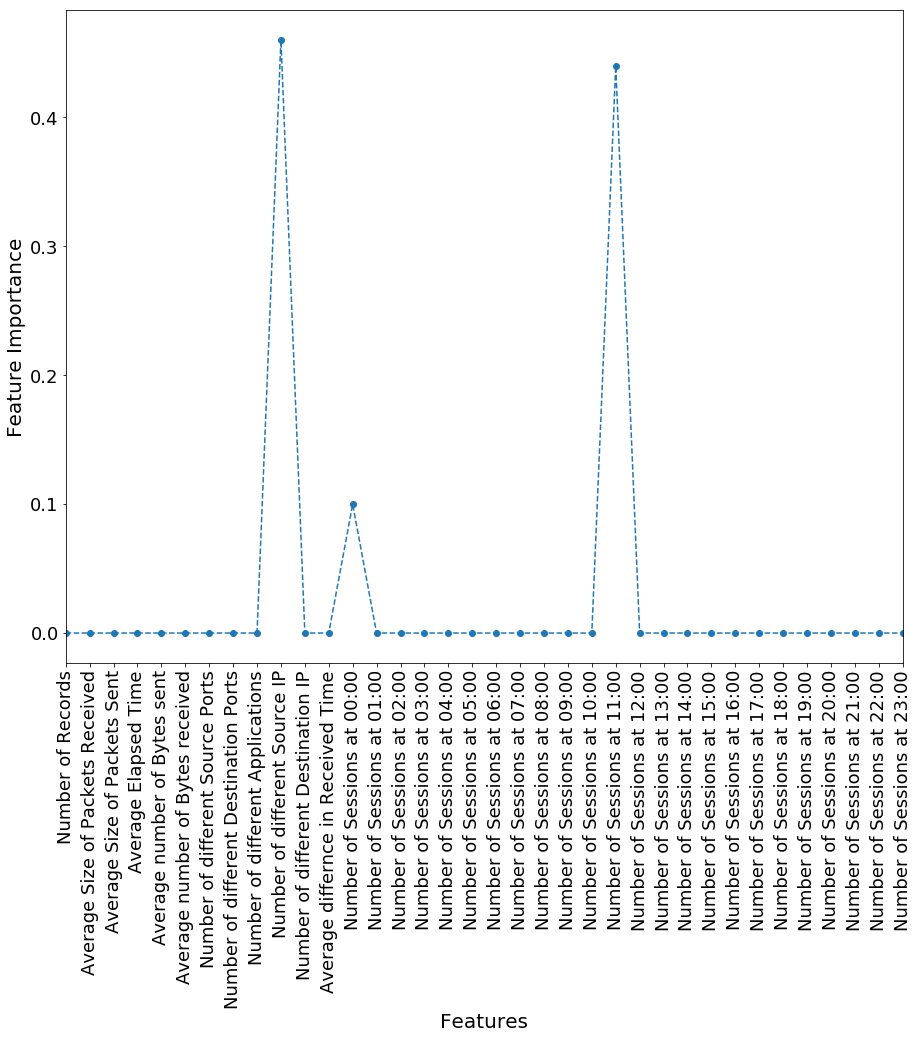

In [51]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [52]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.772727272727

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          14   7       21
1           3  20       23
__all__    17  27       44

Accuracy of the  Extra Decision Tree  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          1  4        5
__all__    6  6       12

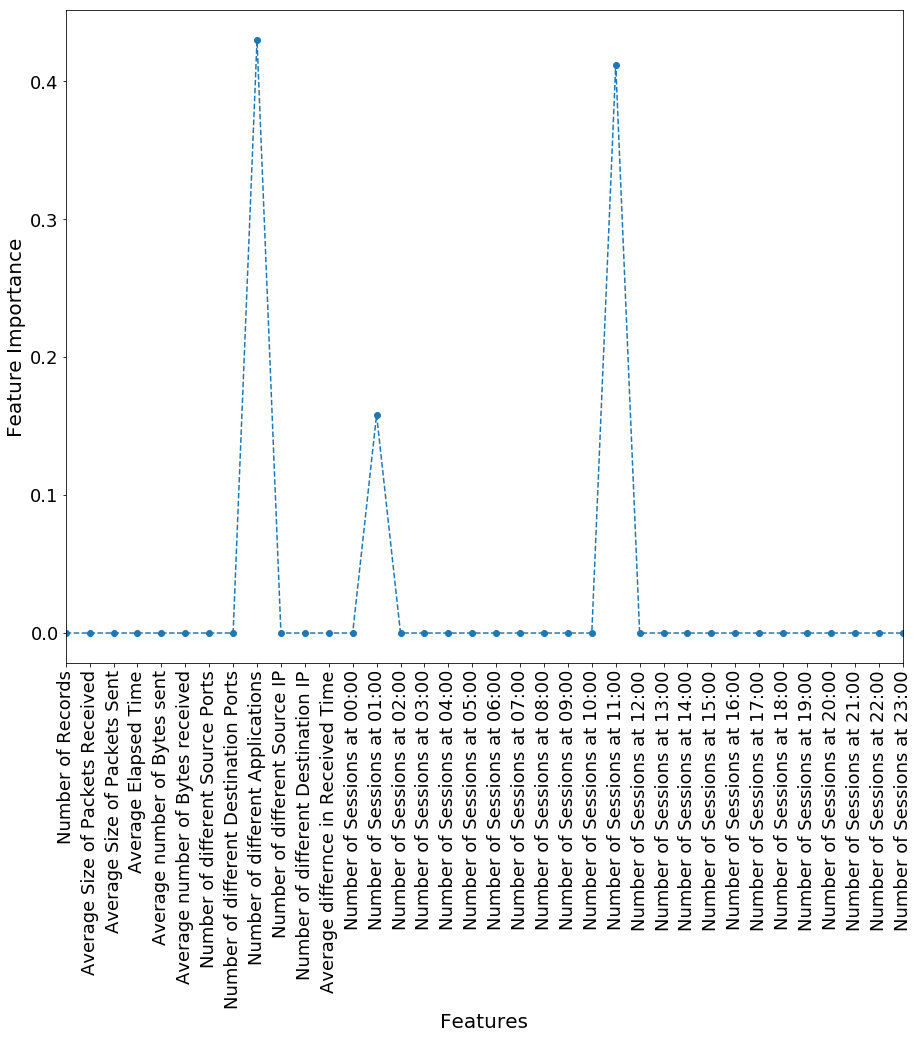

In [53]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [54]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.863636363636

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          17   4       21
1           2  21       23
__all__    19  25       44

Accuracy of the  Bagging  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          1  4        5
__all__    7  5       12

In [55]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [56]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.863636363636


Predicted   0   1  __all__
Actual                    
0          17   4       21
1           2  21       23
__all__    19  25       44

The test accuracy is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          1  4        5
__all__    7  5       12

In [57]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [58]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.954545449127


Predicted   0   1  __all__
Actual                    
0          19   2       21
1           0  23       23
__all__    19  25       44

The accuracy of the model on test data is: 0.75


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          2  3        5
__all__    8  4       12

In [59]:
table_80_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [60]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   18.9s finished


The accuracy of the model on training data is: 0.772727272727


In [61]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          15   6       21
1           4  19       23
__all__    19  25       44

The accuracy of the model on test data is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          1  4        5
__all__    7  5       12

In [62]:
table_80_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [63]:
table_80_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test.set_index(['index'],drop=True,inplace=True)
table_80_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [64]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train)

Comparision Table for Training Accuracies:


accuracy    TP    TN   FP   FN       FPR       FNR
index                                                                         
KNeighborsClassifier        0.681818  15.0  15.0  6.0  8.0  0.347826  0.285714
LogisticRegression          0.772727  19.0  15.0  6.0  4.0  0.173913  0.285714
RandomForestClassifier      0.931818  23.0  18.0  3.0  0.0  0.000000  0.142857
AdaBoostClassifier          1.000000  23.0  21.0  0.0  0.0  0.000000  0.000000
GradientBoostingClassifier  0.818182  19.0  17.0  4.0  4.0  0.173913  0.190476
ExtraTreeClassifier         0.772727  20.0  14.0  7.0  3.0  0.130435  0.333333
BaggingClassifier           0.863636  21.0  17.0  4.0  2.0  0.086957  0.190476
VotingClassifier            0.863636  21.0  17.0  4.0  2.0  0.086957  0.190476
Neural Network-1            0.954545  23.0  19.0  2.0  0.0  0.000000  0.095238
Neural-Network-2            0.772727  19.0  15.0  6.0  4.0  0.173913  0.285714

In [65]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN  FPR       FNR
index                                                                  
KNeighborsClassifier        0.833333  4.0  6.0  1.0  1.0  0.2  0.142857
LogisticRegression          0.750000  3.0  6.0  1.0  2.0  0.4  0.142857
RandomForestClassifier      0.750000  4.0  5.0  2.0  1.0  0.2  0.285714
AdaBoostClassifier          0.666667  4.0  4.0  3.0  1.0  0.2  0.428571
GradientBoostingClassifier  0.833333  3.0  7.0  0.0  2.0  0.4  0.000000
ExtraTreeClassifier         0.750000  4.0  5.0  2.0  1.0  0.2  0.285714
BaggingClassifier           0.833333  4.0  6.0  1.0  1.0  0.2  0.142857
VotingClassifier            0.833333  4.0  6.0  1.0  1.0  0.2  0.142857
Neural Network-1            0.750000  3.0  6.0  1.0  2.0  0.4  0.142857
Neural-Network-2            0.833333  4.0  6.0  1.0  1.0  0.2  0.142857

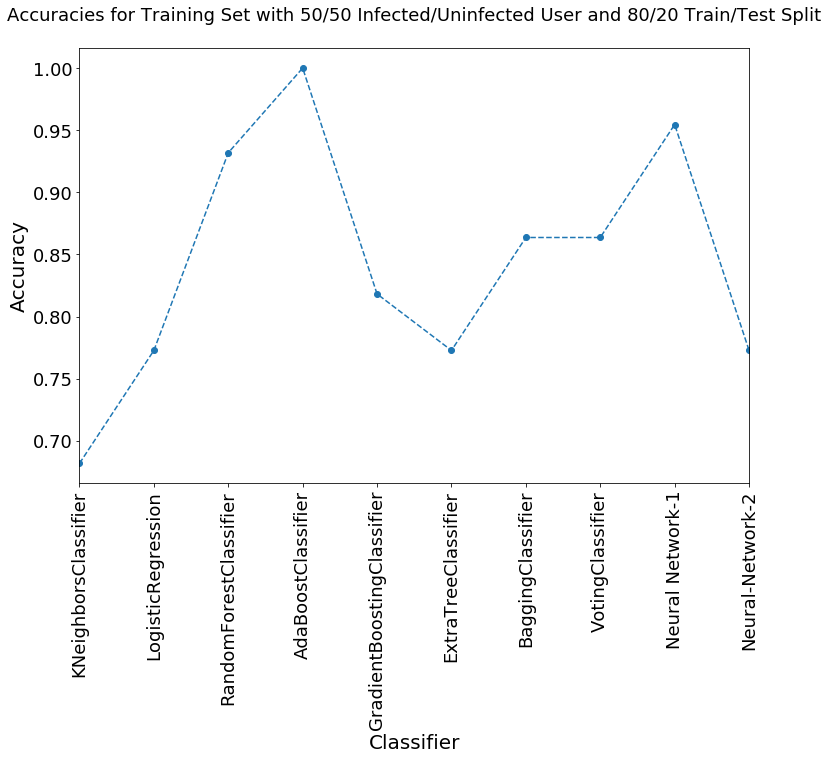

In [66]:
get_accuracy_plot(table_80_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

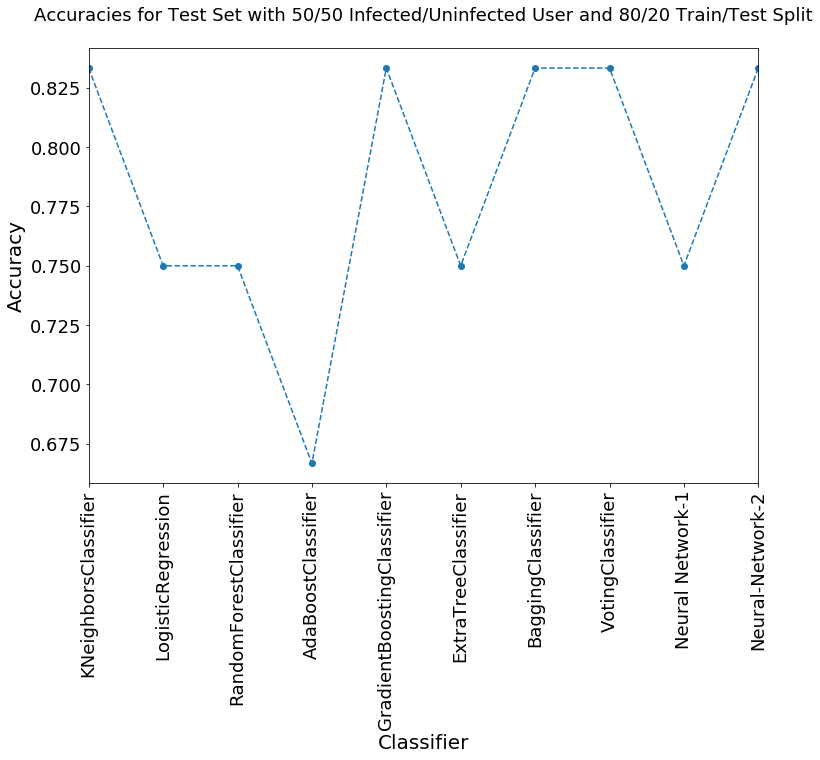

In [67]:
get_accuracy_plot(table_80_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='1.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [70]:
### With the PCA
pca=PCA(n_components=10,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 10 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 10 components is: 0.91311200777
The train/test split ratio is 80:20


In [71]:
table_80_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  manhattan           30  uniform


Accuracy of the  KNN  model for training data is: 0.681818181818

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          18   3       21
1          11  12       23
__all__    29  15       44

Accuracy of the  KNN  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           7  0        7
1           3  2        5
__all__    10  2       12

In [73]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [74]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.7       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.75

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          14   7       21
1           4  19       23
__all__    18  26       44

Accuracy of the  Logistic  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           7  0        7
1           3  2        5
__all__    10  2       12

In [75]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [76]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.840909090909


Predicted   0   1  __all__
Actual                    
0          15   6       21
1           1  22       23
__all__    16  28       44

Accuracy of Random Forest Model on test data is: 0.75


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          2  3        5
__all__    8  4       12

In [77]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)

cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

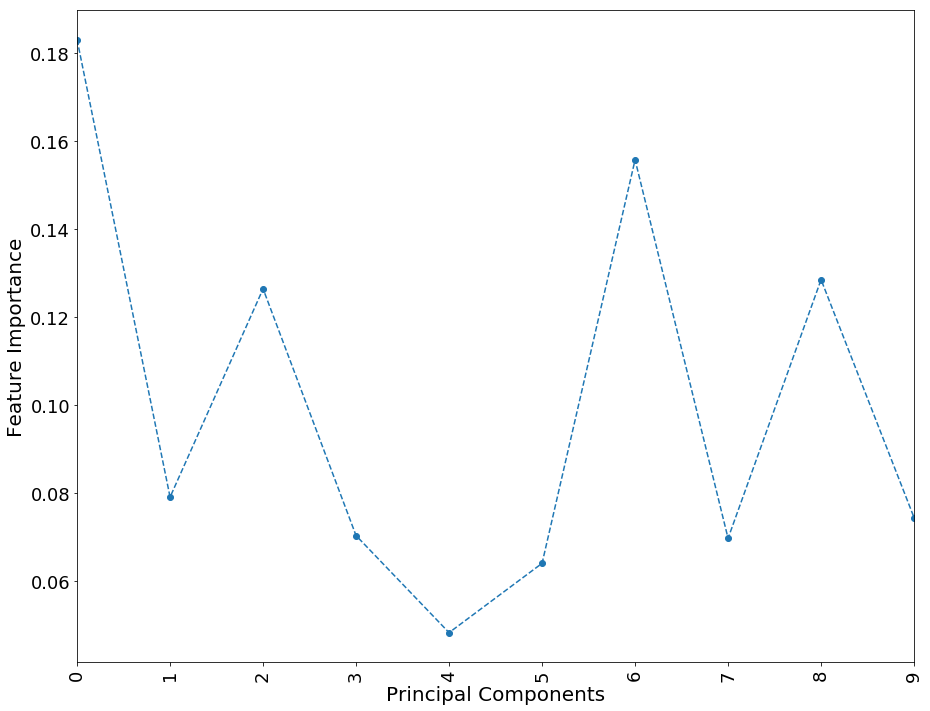

In [79]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [80]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          21   0       21
1           0  23       23
__all__    21  23       44

Accuracy of the  AdaBoostClassifier  model for test data is: 0.583333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  3        7
1          2  3        5
__all__    6  6       12

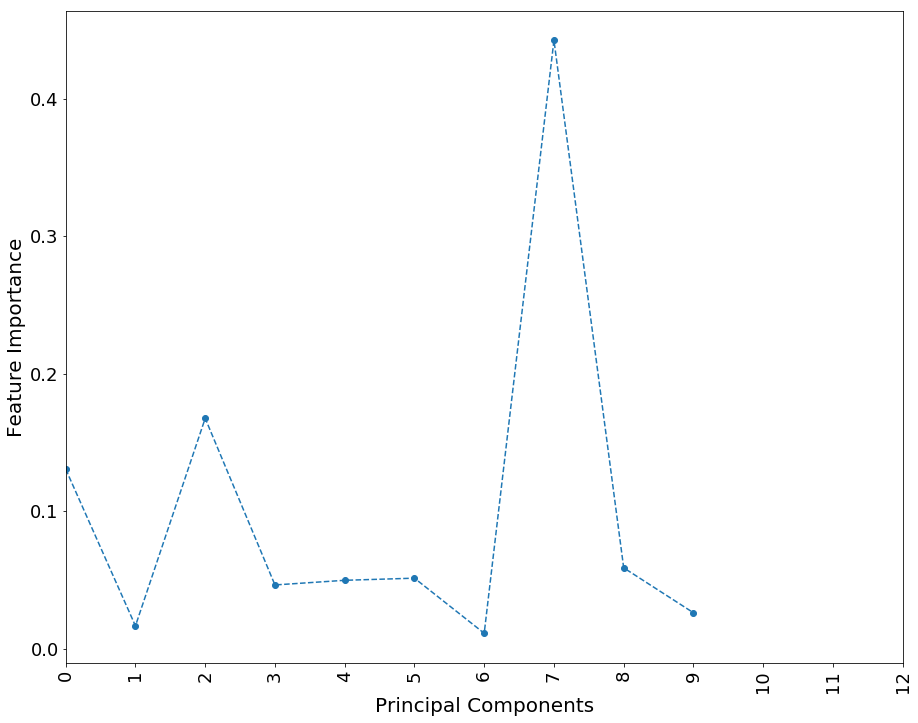

In [81]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 12])
plt.xticks(np.arange(13),np.arange(13),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [82]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.818181818182

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          16   5       21
1           3  20       23
__all__    19  25       44

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.916666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          0  5        5
__all__    6  6       12

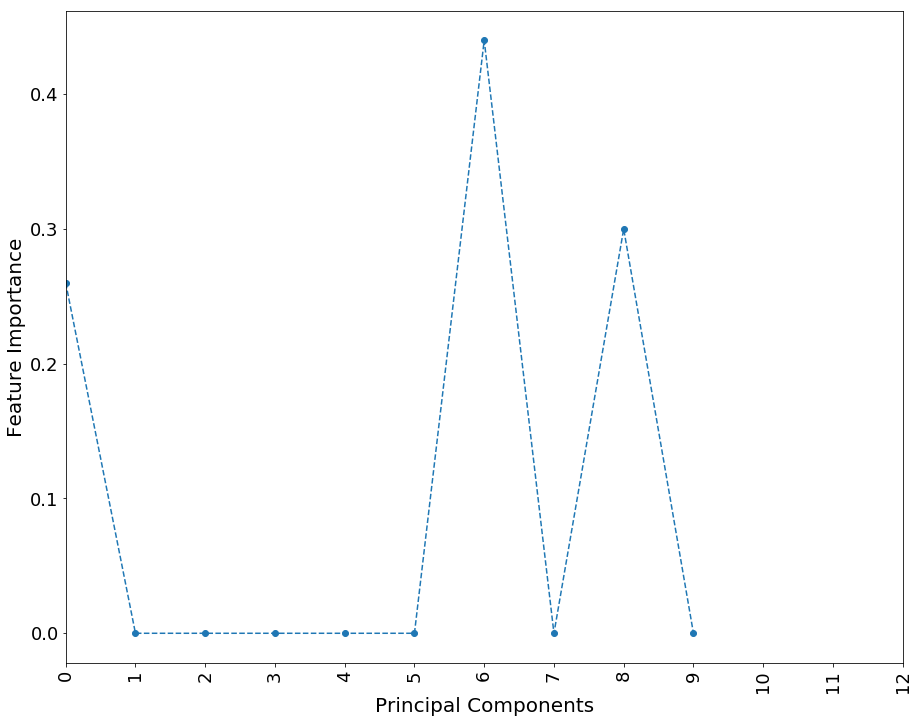

In [83]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [84]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.704545454545

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          11  10       21
1           3  20       23
__all__    14  30       44

Accuracy of the  Extra Decision Tree  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          1  4        5
__all__    6  6       12

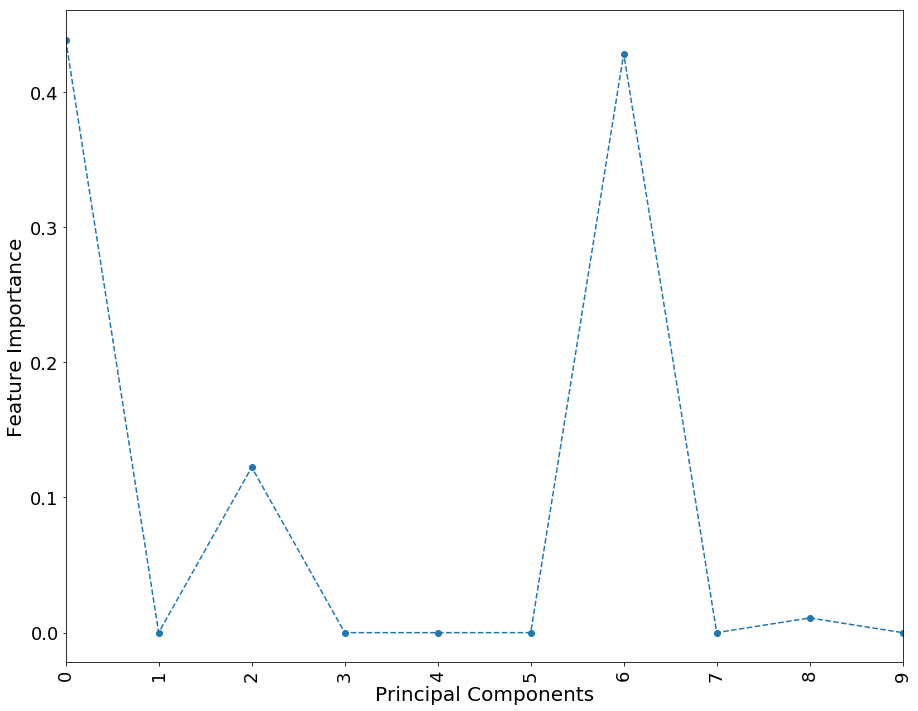

In [86]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [87]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.886363636364

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          18   3       21
1           2  21       23
__all__    20  24       44

Accuracy of the  Bagging  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          2  3        5
__all__    7  5       12

In [88]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [89]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.863636363636


Predicted   0   1  __all__
Actual                    
0          17   4       21
1           2  21       23
__all__    19  25       44

The test accuracy is: 0.75


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          2  3        5
__all__    8  4       12

In [90]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [97]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.863636363636


Predicted   0   1  __all__
Actual                    
0          16   5       21
1           1  22       23
__all__    17  27       44

The accuracy of the model on test data is: 0.666666666667


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          2  3        5
__all__    7  5       12

In [98]:
table_80_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [99]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   32.0s finished


The accuracy of the model on training data is: 0.727272727273


In [100]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          14   7       21
1           5  18       23
__all__    19  25       44

The accuracy of the model on test data is: 0.75


Predicted   0  1  __all__
Actual                   
0           7  0        7
1           3  2        5
__all__    10  2       12

In [101]:
table_80_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [102]:
table_80_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [103]:
print("Comparision Table for Training Accuracies:")
display(table_80_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy    TP    TN    FP    FN       FPR  \
index                                                                    
KNeighborsClassifier        0.681818  12.0  18.0   3.0  11.0  0.478261   
LogisticRegression          0.750000  19.0  14.0   7.0   4.0  0.173913   
RandomForestClassifier      0.840909  22.0  15.0   6.0   1.0  0.043478   
AdaBoostClassifier          1.000000  23.0  21.0   0.0   0.0  0.000000   
GradientBoostingClassifier  0.818182  20.0  16.0   5.0   3.0  0.130435   
ExtraTreeClassifier         0.704545  20.0  11.0  10.0   3.0  0.130435   
BaggingClassifier           0.886364  21.0  18.0   3.0   2.0  0.086957   
VotingClassifier            0.863636  21.0  17.0   4.0   2.0  0.086957   
Neural Network-1            0.863636  22.0  16.0   5.0   1.0  0.043478   
Neural-Network-2            0.727273  18.0  14.0   7.0   5.0  0.217391   

                                 FNR  
index                                 
KNeighborsClassifier        0.142857  
LogisticRegression          0.333333  
RandomForestClassifier      0.285714  
AdaBoostClassifier          0.000000  
GradientBoostingClassifier  0.238095  
ExtraTreeClassifier         0.476190  
BaggingClassifier           0.142857  
VotingClassifier            0.190476  
Neural Network-1            0.238095  
Neural-Network-2            0.333333

In [104]:
print("Comparision Table for Test Accuracies:")
display(table_80_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN  FPR       FNR
index                                                                  
KNeighborsClassifier        0.750000  2.0  7.0  0.0  3.0  0.6  0.000000
LogisticRegression          0.750000  2.0  7.0  0.0  3.0  0.6  0.000000
RandomForestClassifier      0.750000  3.0  6.0  1.0  2.0  0.4  0.142857
AdaBoostClassifier          0.583333  3.0  4.0  3.0  2.0  0.4  0.428571
GradientBoostingClassifier  0.916667  5.0  6.0  1.0  0.0  0.0  0.142857
ExtraTreeClassifier         0.750000  4.0  5.0  2.0  1.0  0.2  0.285714
BaggingClassifier           0.666667  3.0  5.0  2.0  2.0  0.4  0.285714
VotingClassifier            0.750000  3.0  6.0  1.0  2.0  0.4  0.142857
Neural Network-1            0.666667  3.0  5.0  2.0  2.0  0.4  0.285714
Neural-Network-2            0.750000  2.0  7.0  0.0  3.0  0.6  0.000000

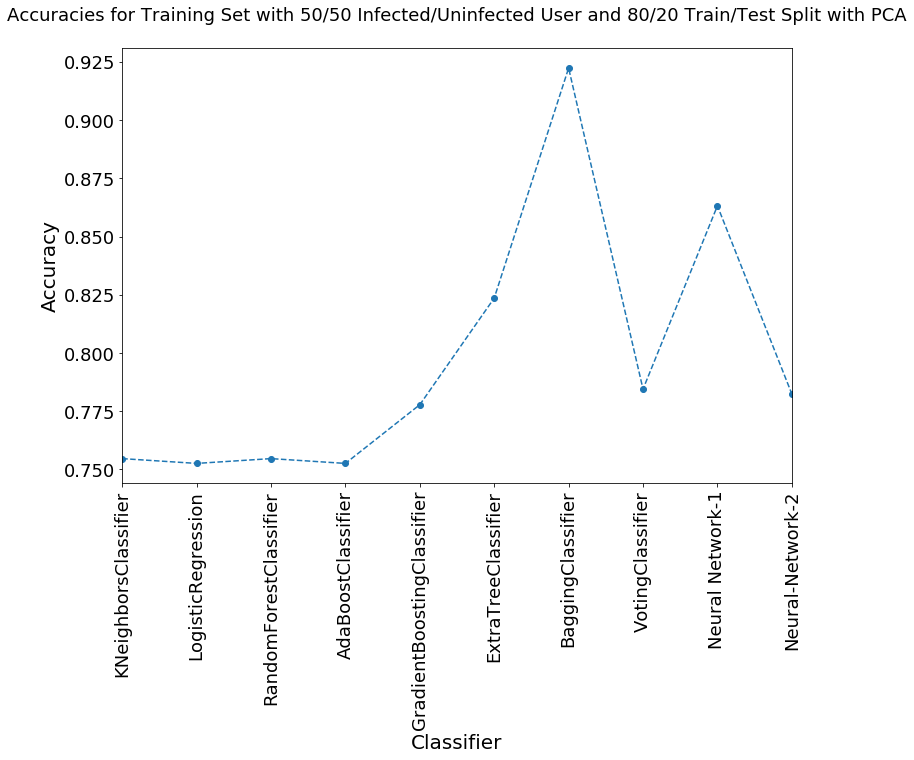

In [144]:
get_accuracy_plot(table_80_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

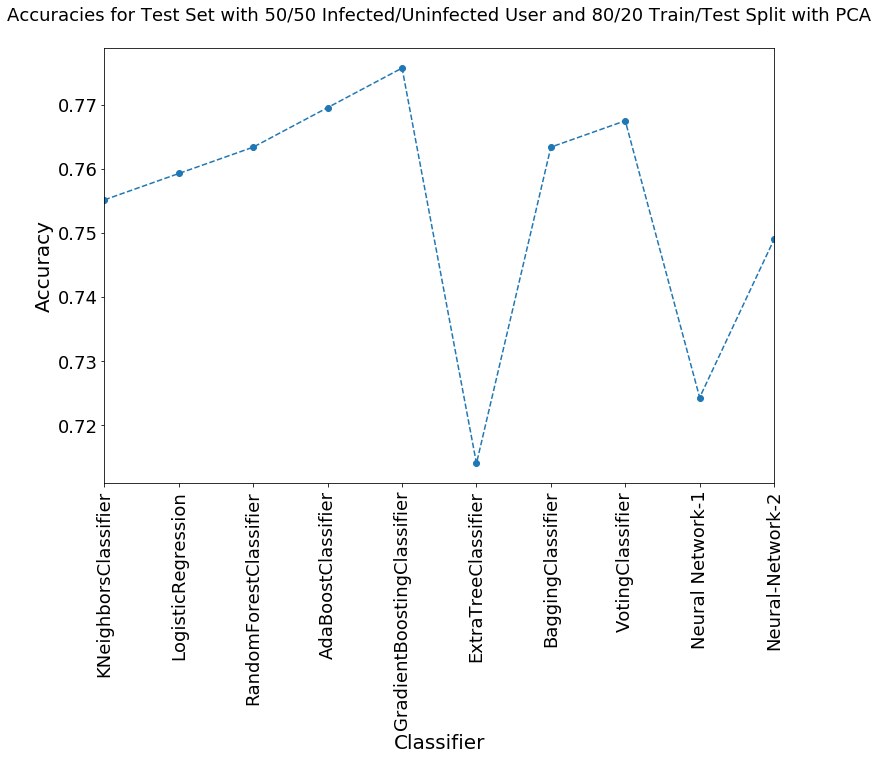

In [145]:
get_accuracy_plot(table_80_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

<a id='1.C' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split</h3.</a>

In [105]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [106]:
table_70_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           20  uniform


Accuracy of the  KNN  model for training data is: 0.74358974359

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          16   3       19
1           7  13       20
__all__    23  16       39

Accuracy of the  KNN  model for test data is: 0.823529411765

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           8  1        9
1           2  6        8
__all__    10  7       17

In [108]:
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [109]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.794871794872

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          14   5       19
1           3  17       20
__all__    17  22       39

Accuracy of the  Logistic  model for test data is: 0.705882352941

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           8  1        9
1           4  4        8
__all__    12  5       17

In [110]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=False,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [111]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.923076923077


Predicted   0   1  __all__
Actual                    
0          17   2       19
1           1  19       20
__all__    18  21       39

Accuracy of Random Forest Model on test data is: 0.705882352941


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          2  6        8
__all__    8  9       17

In [112]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

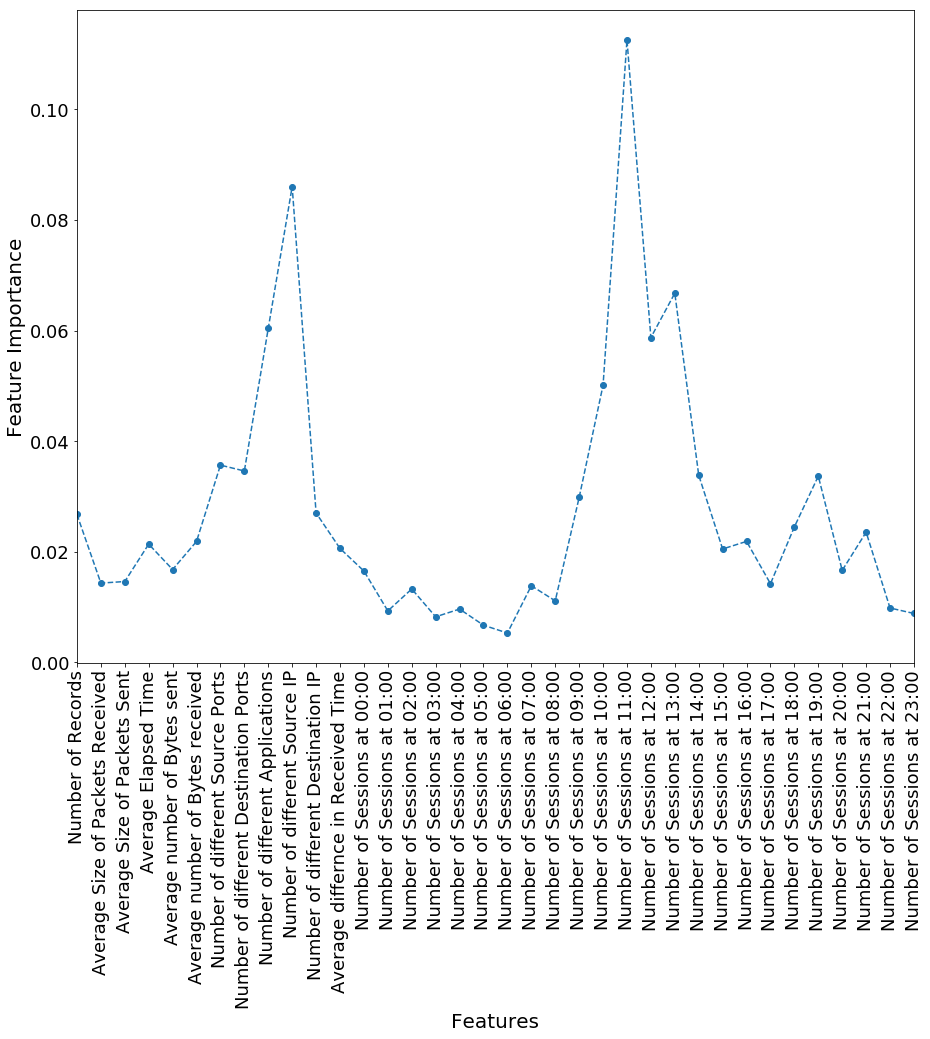

In [113]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [115]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          19   0       19
1           0  20       20
__all__    19  20       39

Accuracy of the  AdaBoostClassifier  model for test data is: 0.588235294118

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           6  3        9
1           4  4        8
__all__    10  7       17

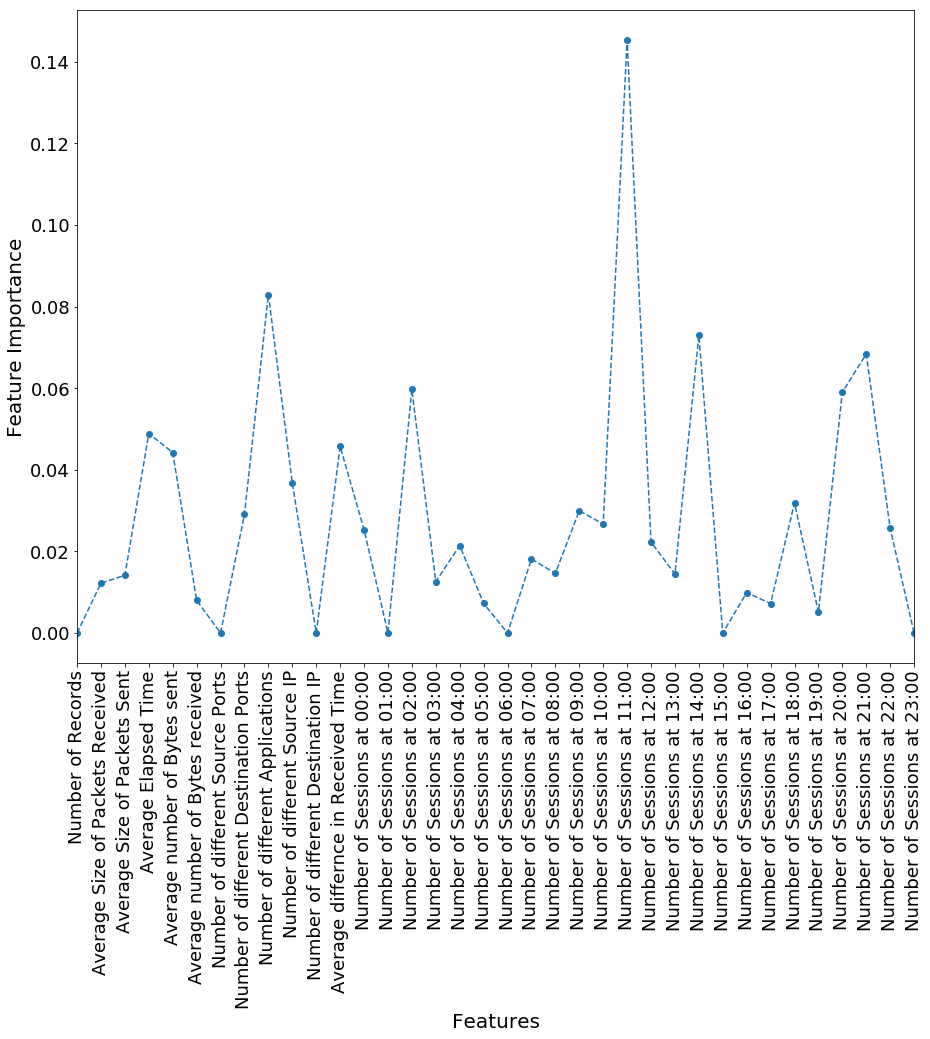

In [116]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [117]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.820512820513

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          15   4       19
1           3  17       20
__all__    18  21       39

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.705882352941

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          2  6        8
__all__    8  9       17

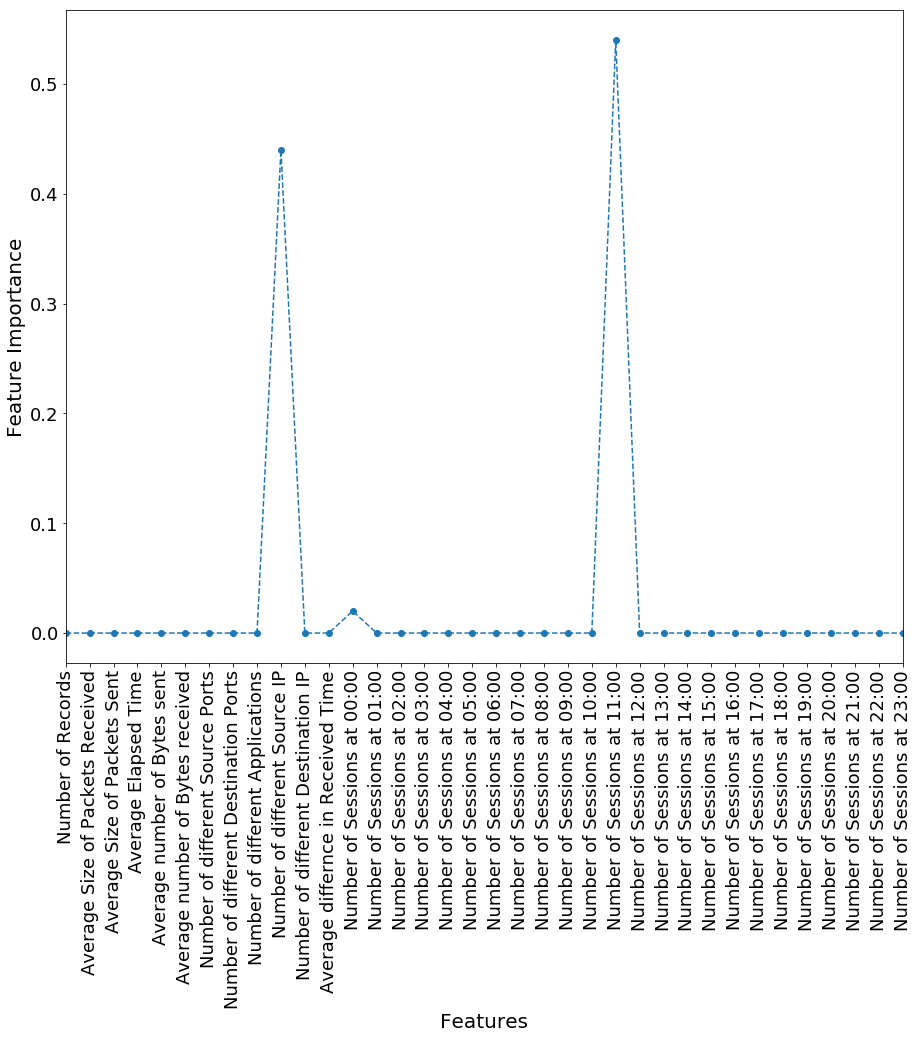

In [118]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [119]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.794871794872

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          13   6       19
1           2  18       20
__all__    15  24       39

Accuracy of the  Extra Decision Tree  model for test data is: 0.705882352941

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          2  6        8
__all__    8  9       17

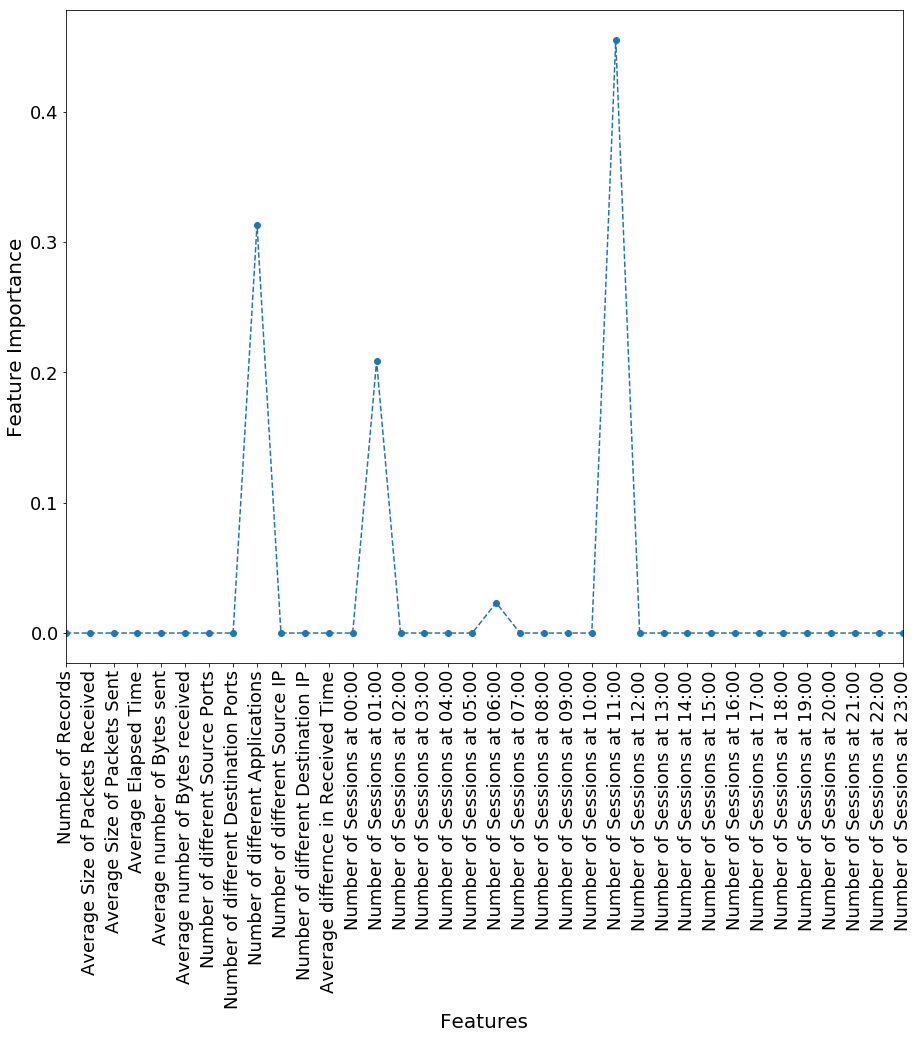

In [120]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [121]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.846153846154

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          15   4       19
1           2  18       20
__all__    17  22       39

Accuracy of the  Bagging  model for test data is: 0.764705882353

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

In [122]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [123]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.846153846154


Predicted   0   1  __all__
Actual                    
0          15   4       19
1           2  18       20
__all__    17  22       39

The test accuracy is: 0.764705882353


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

In [124]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [125]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          19   0       19
1           0  20       20
__all__    19  20       39

The accuracy of the model on test data is: 0.705882352941


Predicted   0  1  __all__
Actual                   
0           8  1        9
1           4  4        8
__all__    12  5       17

In [126]:
table_70_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [127]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   44.0s finished


The accuracy of the model on training data is: 0.717948717949


In [128]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          15   4       19
1           7  13       20
__all__    22  17       39

The accuracy of the model on test data is: 0.764705882353


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

In [129]:
table_70_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [130]:
table_70_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_50_test.set_index(['index'],drop=True,inplace=True)
table_70_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.C.C' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [131]:
print("Comparision Table for Training Accuracies:")
display(table_70_50_train)

Comparision Table for Training Accuracies:


accuracy    TP    TN   FP   FN   FPR       FNR
index                                                                     
KNeighborsClassifier        0.743590  13.0  16.0  3.0  7.0  0.35  0.157895
LogisticRegression          0.769231  17.0  13.0  6.0  3.0  0.15  0.315789
RandomForestClassifier      0.923077  19.0  17.0  2.0  1.0  0.05  0.105263
AdaBoostClassifier          1.000000  20.0  19.0  0.0  0.0  0.00  0.000000
GradientBoostingClassifier  0.820513  17.0  15.0  4.0  3.0  0.15  0.210526
ExtraTreeClassifier         0.794872  18.0  13.0  6.0  2.0  0.10  0.315789
BaggingClassifier           0.846154  18.0  15.0  4.0  2.0  0.10  0.210526
VotingClassifier            0.846154  18.0  15.0  4.0  2.0  0.10  0.210526
Neural Network-1            1.000000  20.0  19.0  0.0  0.0  0.00  0.000000
Neural-Network-2            0.717949  13.0  15.0  4.0  7.0  0.35  0.210526

In [132]:
print("Comparision Table for Test Accuracies:")
display(table_70_50_test)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN   FPR       FNR
index                                                                   
KNeighborsClassifier        0.823529  6.0  8.0  1.0  2.0  0.25  0.111111
LogisticRegression          0.705882  4.0  8.0  1.0  4.0  0.50  0.111111
RandomForestClassifier      0.705882  6.0  6.0  3.0  2.0  0.25  0.333333
AdaBoostClassifier          0.588235  4.0  6.0  3.0  4.0  0.50  0.333333
GradientBoostingClassifier  0.705882  6.0  6.0  3.0  2.0  0.25  0.333333
ExtraTreeClassifier         0.705882  6.0  6.0  3.0  2.0  0.25  0.333333
BaggingClassifier           0.764706  6.0  7.0  2.0  2.0  0.25  0.222222
VotingClassifier            0.764706  6.0  7.0  2.0  2.0  0.25  0.222222
Neural Network-1            0.705882  4.0  8.0  1.0  4.0  0.50  0.111111
Neural-Network-2            0.764706  6.0  7.0  2.0  2.0  0.25  0.222222

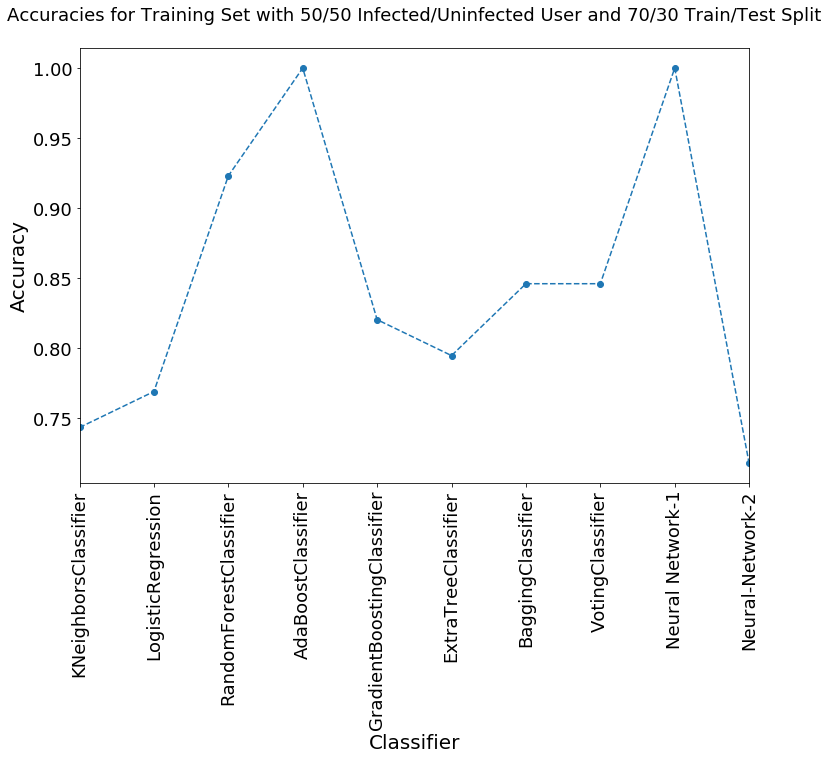

In [133]:
get_accuracy_plot(table_70_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split')

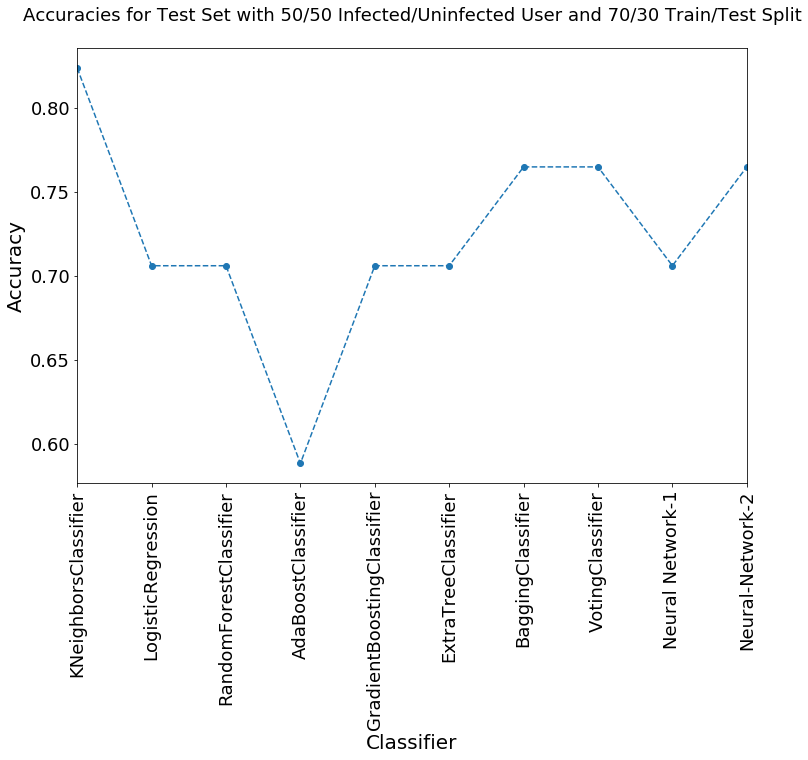

In [134]:
get_accuracy_plot(table_70_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split')

<a id='1.D' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split with PCA</h3.</a>

In [138]:
### With the PCA
pca=PCA(n_components=10,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 10 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

Variance explained using 10 components is: 0.91311200777
The train/test split ratio is 70:30


In [139]:
table_70_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  manhattan           20  distance


Accuracy of the  KNN  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          19   0       19
1           0  20       20
__all__    19  20       39

Accuracy of the  KNN  model for test data is: 0.588235294118

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           8  1        9
1           6  2        8
__all__    14  3       17

In [141]:
knn=KNeighborsClassifier(n_neighbors=20,weights='distance',leaf_size=2,metric='manhattan',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [142]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.769230769231

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          14   5       19
1           4  16       20
__all__    18  21       39

Accuracy of the  Logistic  model for test data is: 0.588235294118

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           8  1        9
1           6  2        8
__all__    14  3       17

In [168]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=1e-1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [144]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.923076923077


Predicted   0   1  __all__
Actual                    
0          17   2       19
1           1  19       20
__all__    18  21       39

Accuracy of Random Forest Model on test data is: 0.764705882353


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

In [145]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

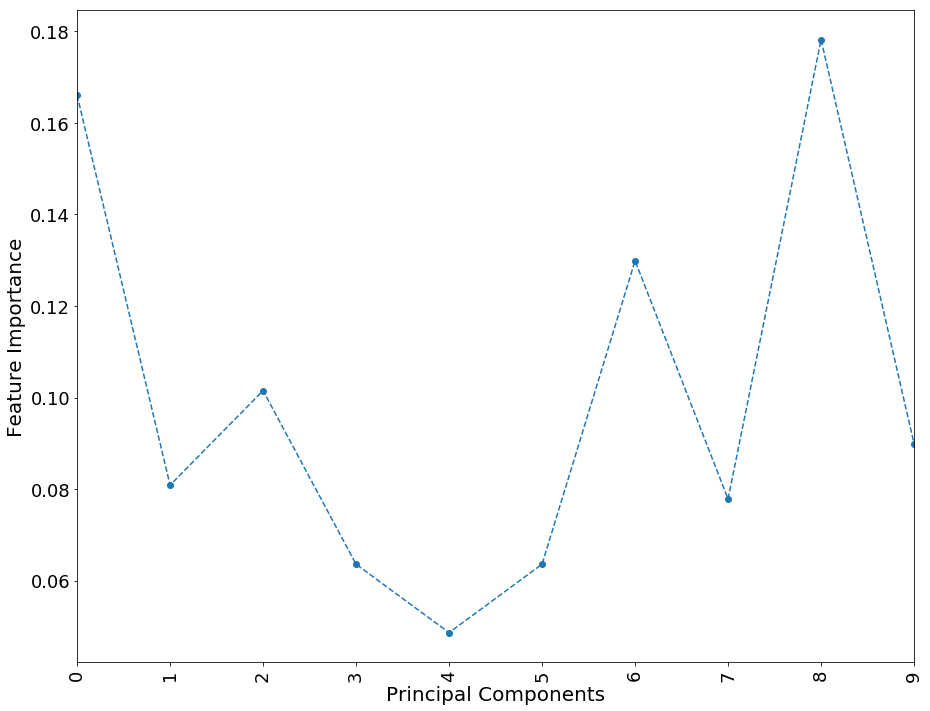

In [146]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [147]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R              1            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          19   0       19
1           0  20       20
__all__    19  20       39

Accuracy of the  AdaBoostClassifier  model for test data is: 0.764705882353

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

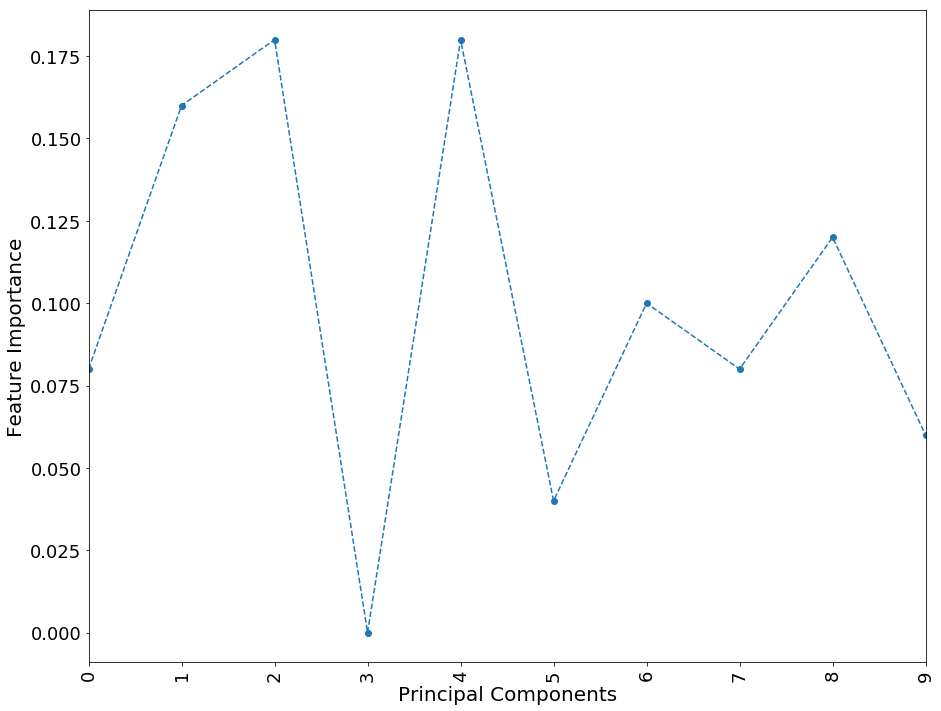

In [149]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [150]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.769230769231

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          15   4       19
1           5  15       20
__all__    20  19       39

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.647058823529

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           7  2        9
1           4  4        8
__all__    11  6       17

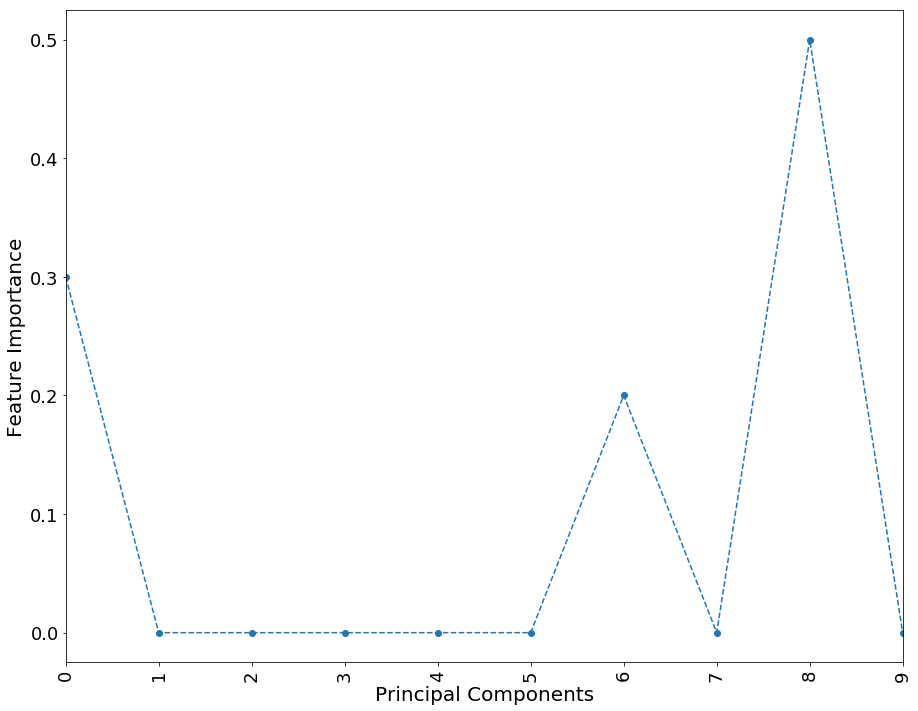

In [151]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [152]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.692307692308

Confusion Matrix for Training data is:


Predicted  0   1  __all__
Actual                   
0          8  11       19
1          1  19       20
__all__    9  30       39

Accuracy of the  Extra Decision Tree  model for test data is: 0.647058823529

Confusion Matrix for test data is:


Predicted  0   1  __all__
Actual                   
0          4   5        9
1          1   7        8
__all__    5  12       17

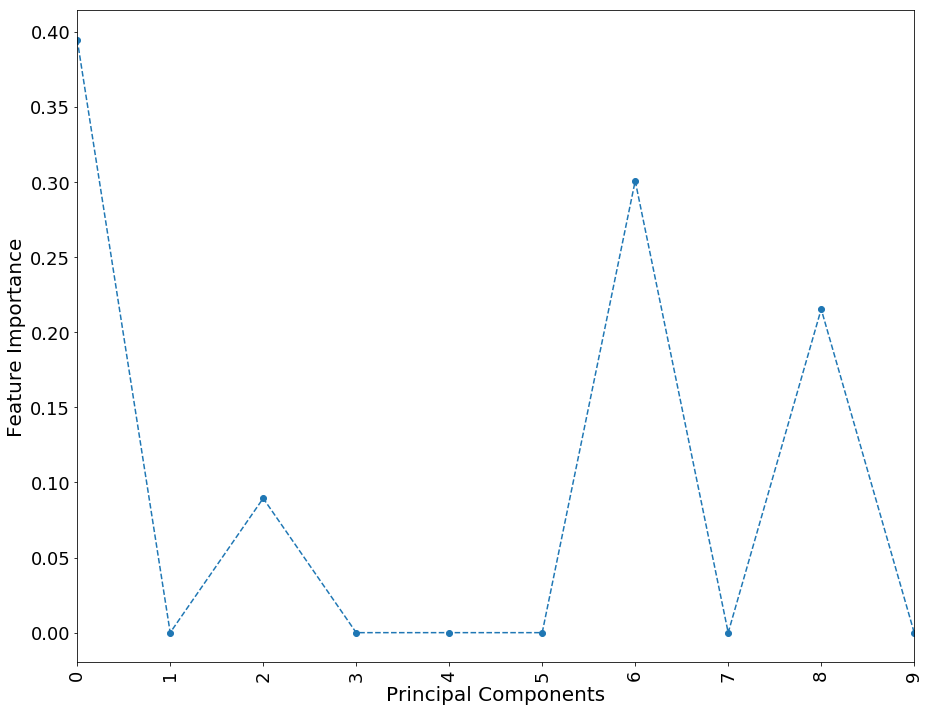

In [153]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [154]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.974358974359

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          19   0       19
1           1  19       20
__all__    20  19       39

Accuracy of the  Bagging  model for test data is: 0.647058823529

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          3  5        8
__all__    9  8       17

In [155]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [156]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.948717948718


Predicted   0   1  __all__
Actual                    
0          18   1       19
1           1  19       20
__all__    19  20       39

The test accuracy is: 0.764705882353


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          2  6        8
__all__    9  8       17

In [157]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [158]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.948717948718


Predicted   0   1  __all__
Actual                    
0          18   1       19
1           1  19       20
__all__    19  20       39

The accuracy of the model on test data is: 0.647058823529


Predicted   0  1  __all__
Actual                   
0           7  2        9
1           4  4        8
__all__    11  6       17

In [159]:
table_70_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [160]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   56.4s finished


The accuracy of the model on training data is: 0.769230769231


In [161]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          12   7       19
1           2  18       20
__all__    14  25       39

The accuracy of the model on test data is: 0.705882352941


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          2  6        8
__all__    8  9       17

In [162]:
table_70_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [172]:
# table_70_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
#                            'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
#                             'Neural Network-1','Neural-Network-2']
# table_70_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
#                            'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
#                             'Neural Network-1','Neural-Network-2']

# table_70_50_test_PCA.set_index(['index'],drop=True,inplace=True)
# table_70_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [170]:
print("Comparision Table for Training Accuracies:")
display(table_70_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy    TP    TN    FP   FN   FPR       FNR
index                                                                      
KNeighborsClassifier        1.000000  20.0  19.0   0.0  0.0  0.00  0.000000
LogisticRegression          0.743590  18.0  11.0   8.0  2.0  0.10  0.421053
RandomForestClassifier      0.923077  19.0  17.0   2.0  1.0  0.05  0.105263
AdaBoostClassifier          1.000000  20.0  19.0   0.0  0.0  0.00  0.000000
GradientBoostingClassifier  0.769231  15.0  15.0   4.0  5.0  0.25  0.210526
ExtraTreeClassifier         0.692308  19.0   8.0  11.0  1.0  0.05  0.578947
BaggingClassifier           0.974359  19.0  19.0   0.0  1.0  0.05  0.000000
VotingClassifier            0.948718  19.0  18.0   1.0  1.0  0.05  0.052632
Neural Network-1            0.948718  19.0  18.0   1.0  1.0  0.05  0.052632
Neural-Network-2            0.769231  18.0  12.0   7.0  2.0  0.10  0.368421
1                           0.769231  16.0  14.0   5.0  4.0  0.20  0.263158

In [171]:
print("Comparision Table for Test Accuracies:")
display(table_70_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN    FPR       FNR
index                                                                    
KNeighborsClassifier        0.588235  2.0  8.0  1.0  6.0  0.750  0.111111
LogisticRegression          0.705882  6.0  6.0  3.0  2.0  0.250  0.333333
RandomForestClassifier      0.764706  6.0  7.0  2.0  2.0  0.250  0.222222
AdaBoostClassifier          0.764706  6.0  7.0  2.0  2.0  0.250  0.222222
GradientBoostingClassifier  0.647059  4.0  7.0  2.0  4.0  0.500  0.222222
ExtraTreeClassifier         0.647059  7.0  4.0  5.0  1.0  0.125  0.555556
BaggingClassifier           0.647059  5.0  6.0  3.0  3.0  0.375  0.333333
VotingClassifier            0.764706  6.0  7.0  2.0  2.0  0.250  0.222222
Neural Network-1            0.647059  4.0  7.0  2.0  4.0  0.500  0.222222
Neural-Network-2            0.705882  6.0  6.0  3.0  2.0  0.250  0.333333
1                           0.764706  5.0  8.0  1.0  3.0  0.375  0.111111

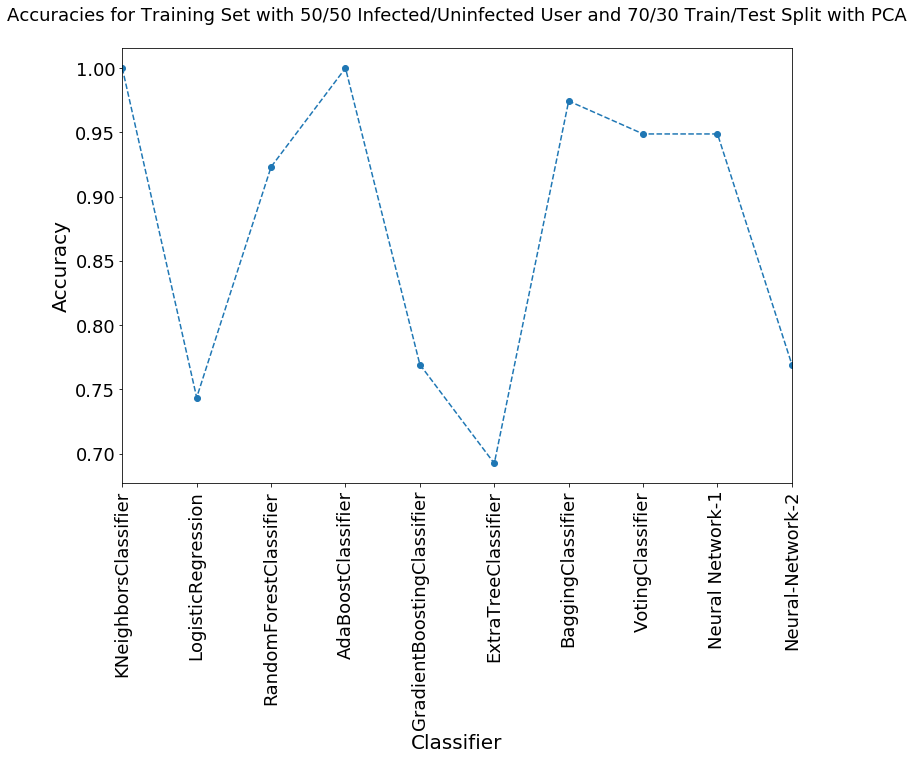

In [166]:
get_accuracy_plot(table_70_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

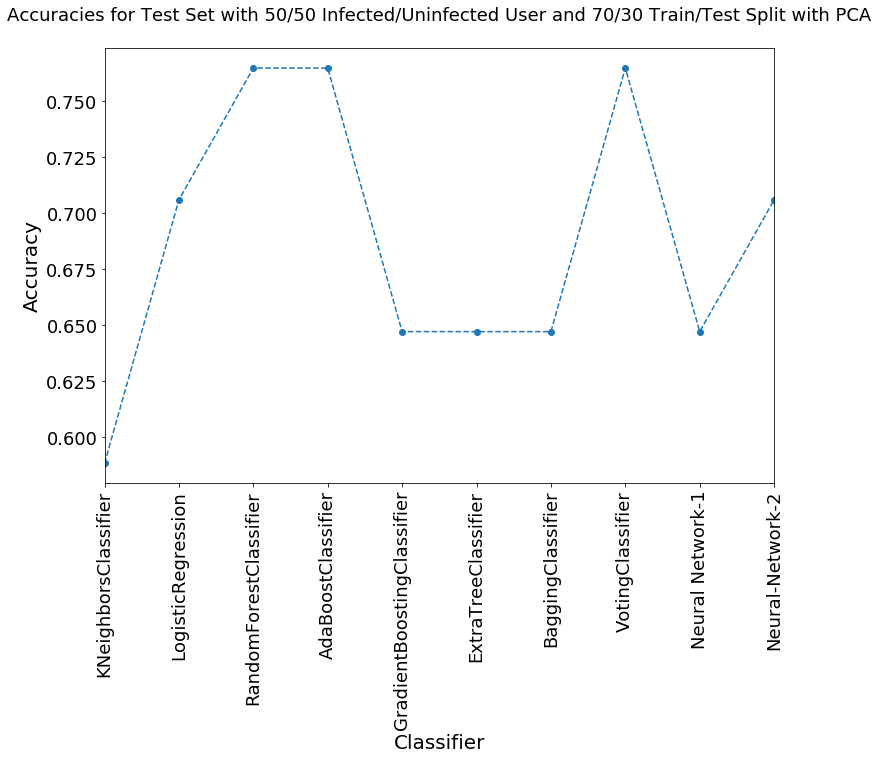

In [167]:
get_accuracy_plot(table_70_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

<a id='1.E' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split</h3.</a>

In [190]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.1)

The train/test split ratio is 90:10


In [191]:
table_90_50_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_50_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [192]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           30  uniform


Accuracy of the  KNN  model for training data is: 0.68

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          18   5       23
1          11  16       27
__all__    29  21       50

Accuracy of the  KNN  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [193]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_50_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_50_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [194]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.76

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          17   6       23
1           6  21       27
__all__    23  27       50

Accuracy of the  Logistic  model for test data is: 1.0

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  0        5
1          0  1        1
__all__    5  1        6

In [195]:
logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_50_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_50_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [196]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.92


Predicted   0   1  __all__
Actual                    
0          21   2       23
1           2  25       27
__all__    23  27       50

Accuracy of Random Forest Model on test data is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [197]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_50_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_50_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

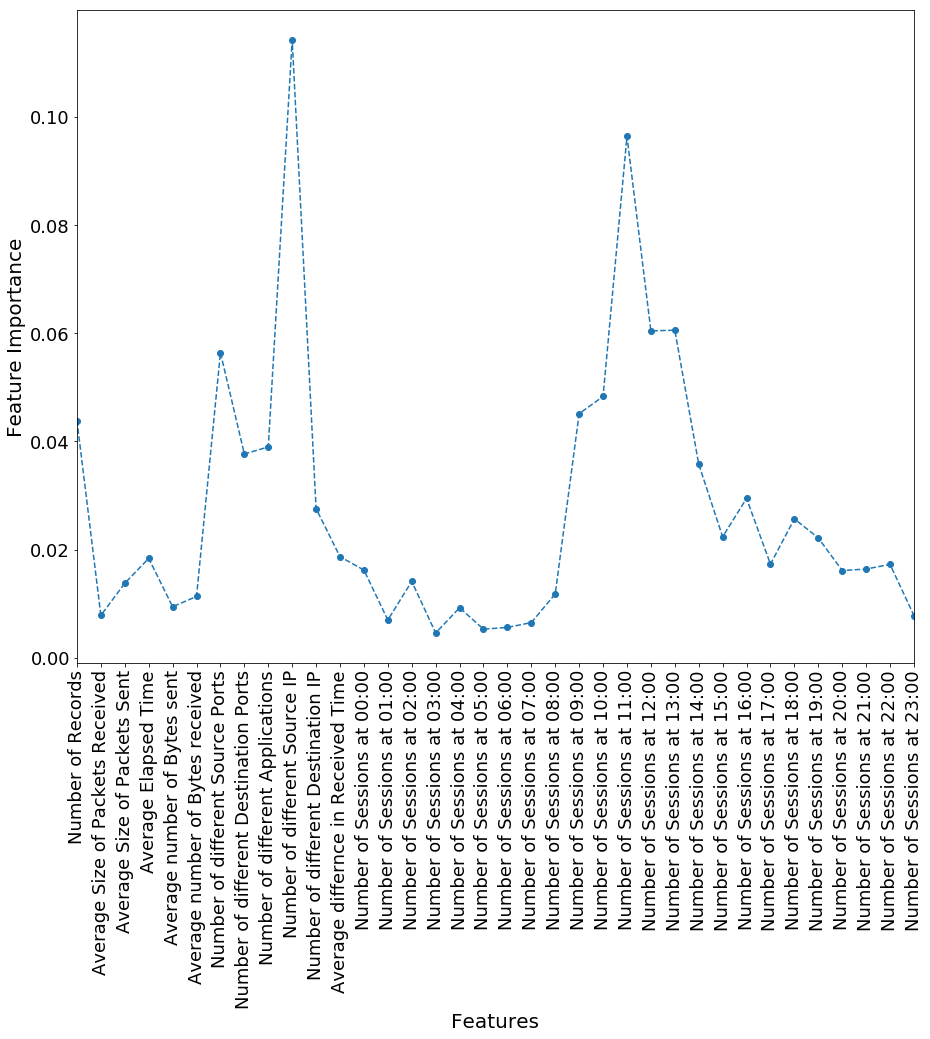

In [198]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [199]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          23   0       23
1           0  27       27
__all__    23  27       50

Accuracy of the  AdaBoostClassifier  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  0        5
1          1  0        1
__all__    6  0        6

In [200]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1.5,n_estimators=100,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

In [201]:
table_90_50_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_50_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

5
0
0
5
1
0
0
1
0.0
1.0
1.0
0.0


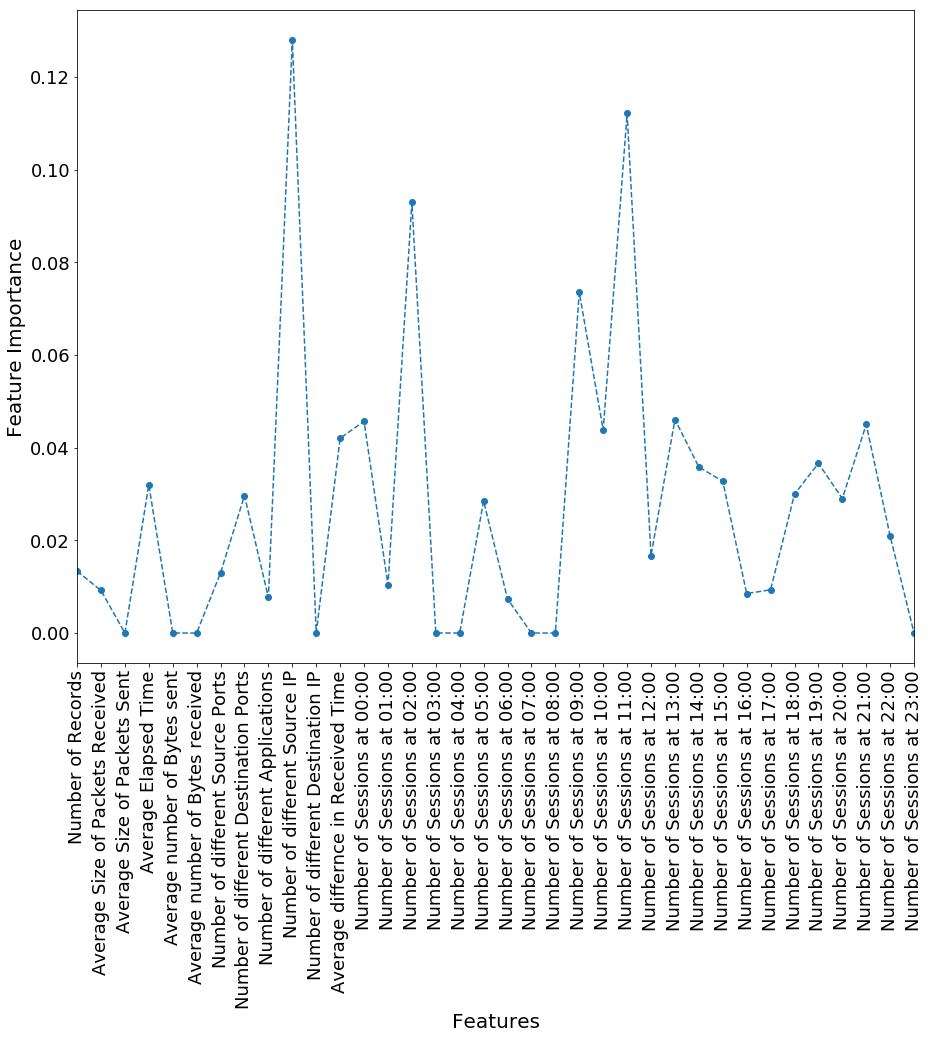

In [202]:
fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [203]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.84

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          18   5       23
1           3  24       27
__all__    21  29       50

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          1  0        1
__all__    5  1        6

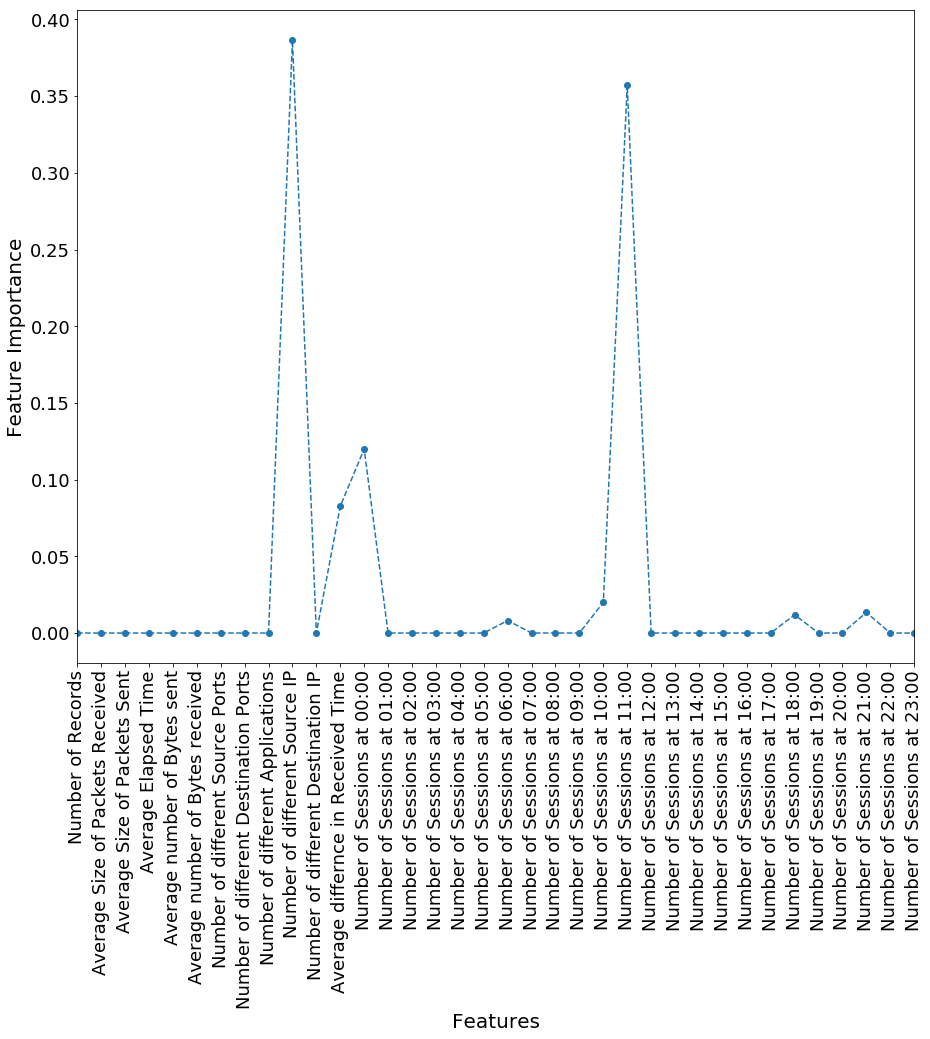

In [205]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_50_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_50_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [206]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.74

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          10  13       23
1           0  27       27
__all__    10  40       50

Accuracy of the  Extra Decision Tree  model for test data is: 0.5

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          2  3        5
1          0  1        1
__all__    2  4        6

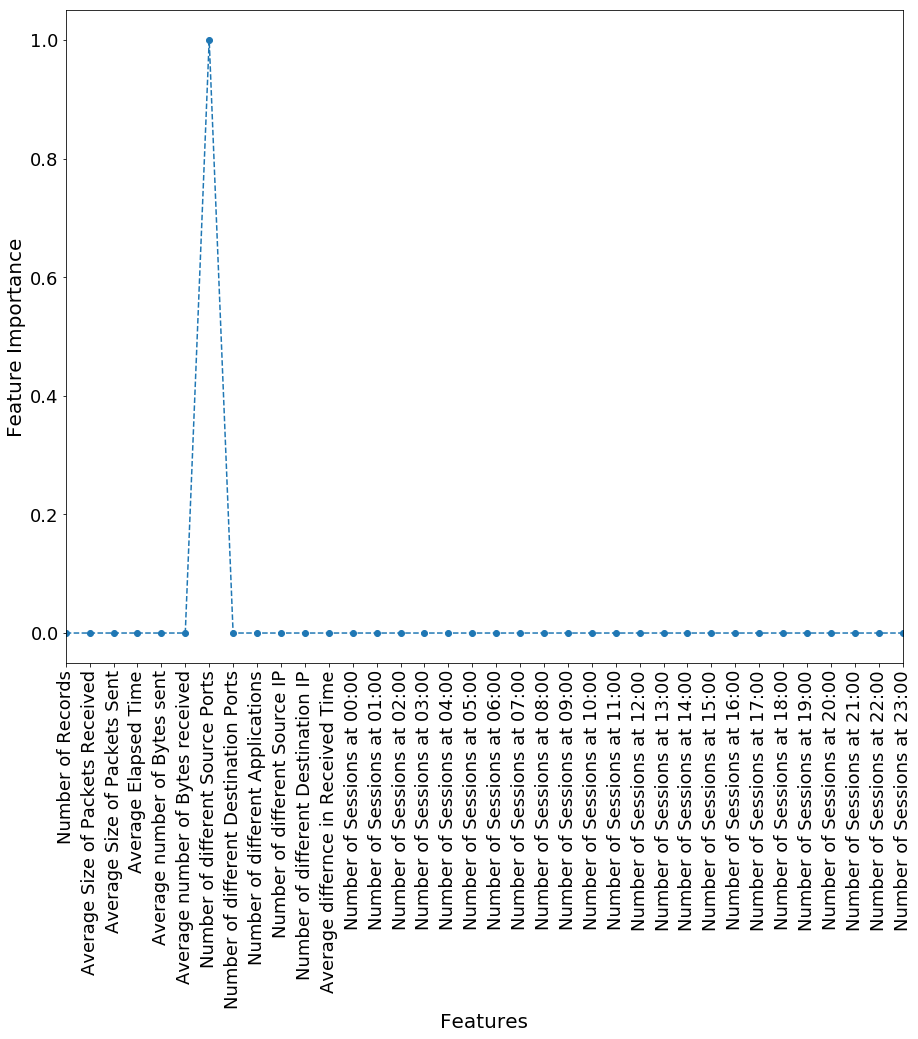

In [207]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_50_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_50_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [208]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.84

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          17   6       23
1           2  25       27
__all__    19  31       50

Accuracy of the  Bagging  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [209]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_50_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_50_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [210]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.88


Predicted   0   1  __all__
Actual                    
0          19   4       23
1           2  25       27
__all__    21  29       50

The test accuracy is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [211]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_50_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                        cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_50_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [212]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          23   0       23
1           0  27       27
__all__    23  27       50

The accuracy of the model on test data is: 1.0


Predicted  0  1  __all__
Actual                  
0          5  0        5
1          0  1        1
__all__    5  1        6

In [213]:
table_90_50_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_50_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [214]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


The accuracy of the model on training data is: 0.78


In [215]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          17   6       23
1           5  22       27
__all__    22  28       50

The accuracy of the model on test data is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [216]:
table_90_50_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_50_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [217]:
table_90_50_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_50_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_50_test.set_index(['index'],drop=True,inplace=True)
table_90_50_train.set_index(['index'],drop=True,inplace=True)

<a id='1.E.E' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [218]:
print("Comparision Table for Training Accuracies:")
display(table_90_50_train)

Comparision Table for Training Accuracies:


accuracy    TP    TN    FP    FN       FPR  \
index                                                                    
KNeighborsClassifier            0.68  16.0  18.0   5.0  11.0  0.407407   
LogisticRegression              0.74  21.0  16.0   7.0   6.0  0.222222   
RandomForestClassifier          0.92  25.0  21.0   2.0   2.0  0.074074   
AdaBoostClassifier              1.00  27.0  23.0   0.0   0.0  0.000000   
GradientBoostingClassifier      0.84  24.0  18.0   5.0   3.0  0.111111   
ExtraTreeClassifier             0.74  27.0  10.0  13.0   0.0  0.000000   
BaggingClassifier               0.84  25.0  17.0   6.0   2.0  0.074074   
VotingClassifier                0.88  25.0  19.0   4.0   2.0  0.074074   
Neural Network-1                1.00  27.0  23.0   0.0   0.0  0.000000   
Neural-Network-2                0.78  22.0  17.0   6.0   5.0  0.185185   

                                 FNR  
index                                 
KNeighborsClassifier        0.217391  
LogisticRegression          0.304348  
RandomForestClassifier      0.086957  
AdaBoostClassifier          0.000000  
GradientBoostingClassifier  0.217391  
ExtraTreeClassifier         0.565217  
BaggingClassifier           0.260870  
VotingClassifier            0.173913  
Neural Network-1            0.000000  
Neural-Network-2            0.260870

In [219]:
print("Comparision Table for Test Accuracies:")
display(table_90_50_test)

Comparision Table for Test Accuracies:


accuracy        TP        TN        FP        FN  \
index                                                                          
KNeighborsClassifier        0.833333  1.000000  4.000000  1.000000  0.000000   
LogisticRegression          1.000000  1.000000  5.000000  0.000000  0.000000   
RandomForestClassifier      0.833333  1.000000  4.000000  1.000000  0.000000   
AdaBoostClassifier          0.833333  4.166667  0.833333  0.833333  0.166667   
GradientBoostingClassifier  0.666667  0.000000  4.000000  1.000000  1.000000   
ExtraTreeClassifier         0.500000  1.000000  2.000000  3.000000  0.000000   
BaggingClassifier           0.833333  1.000000  4.000000  1.000000  0.000000   
VotingClassifier            0.833333  1.000000  4.000000  1.000000  0.000000   
Neural Network-1            1.000000  1.000000  5.000000  0.000000  0.000000   
Neural-Network-2            0.833333  1.000000  4.000000  1.000000  0.000000   

                                 FPR       FNR  
index                                           
KNeighborsClassifier        0.000000  0.200000  
LogisticRegression          0.000000  0.000000  
RandomForestClassifier      0.000000  0.200000  
AdaBoostClassifier          0.166667  0.833333  
GradientBoostingClassifier  1.000000  0.200000  
ExtraTreeClassifier         0.000000  0.600000  
BaggingClassifier           0.000000  0.200000  
VotingClassifier            0.000000  0.200000  
Neural Network-1            0.000000  0.000000  
Neural-Network-2            0.000000  0.200000

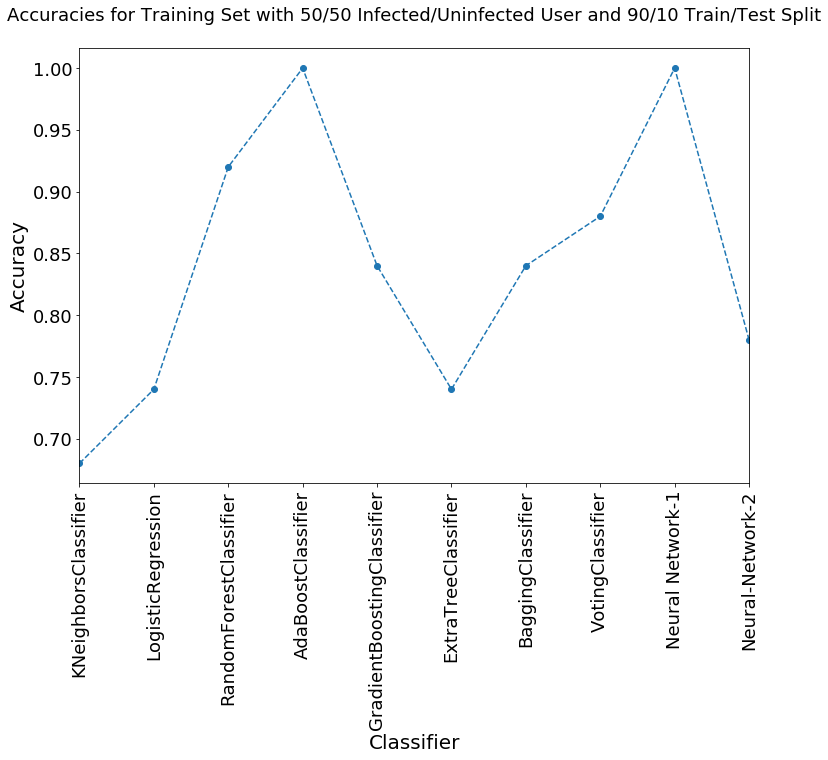

In [220]:
get_accuracy_plot(table_90_50_train,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split')

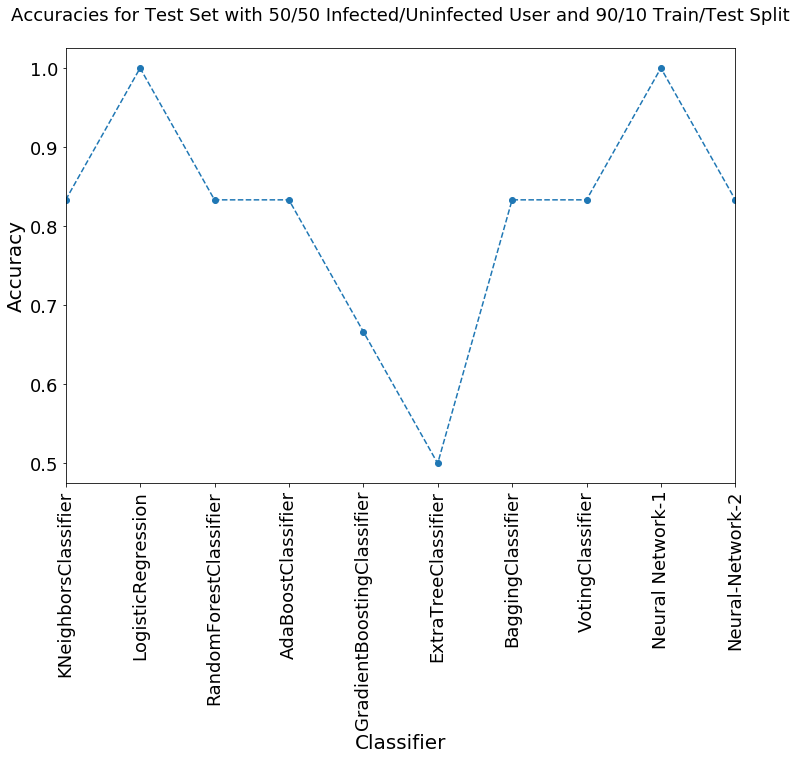

In [221]:
get_accuracy_plot(table_90_50_test,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split')

<a id='1.F' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split with PCA</h3.</a>

In [222]:
### With the PCA
pca=PCA(n_components=10,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 10 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.1)

Variance explained using 10 components is: 0.91311200777
The train/test split ratio is 90:10


In [223]:
table_90_50_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_50_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  chebyshev           30  uniform


Accuracy of the  KNN  model for training data is: 0.56

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          22  1       23
1          21  6       27
__all__    43  7       50

Accuracy of the  KNN  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          1  0        1
__all__    5  1        6

In [225]:
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='chebyshev',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_50_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_50_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [226]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7        50          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.76

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          16   7       23
1           5  22       27
__all__    21  29       50

Accuracy of the  Logistic  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          5  0        5
1          1  0        1
__all__    6  0        6

In [227]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=False,intercept_scaling=0.7,max_iter=50,multi_class='ovr',penalty='l2',solver='sag',tol=1e-1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_50_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_50_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


5
0
0
5
1
0
0
1
0.0
1.0
1.0
0.0


#### Random Forest

In [228]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.88


Predicted   0   1  __all__
Actual                    
0          18   5       23
1           1  26       27
__all__    19  31       50

Accuracy of Random Forest Model on test data is: 0.666666666667


Predicted  0  1  __all__
Actual                  
0          3  2        5
1          0  1        1
__all__    3  3        6

In [229]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_50_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_50_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

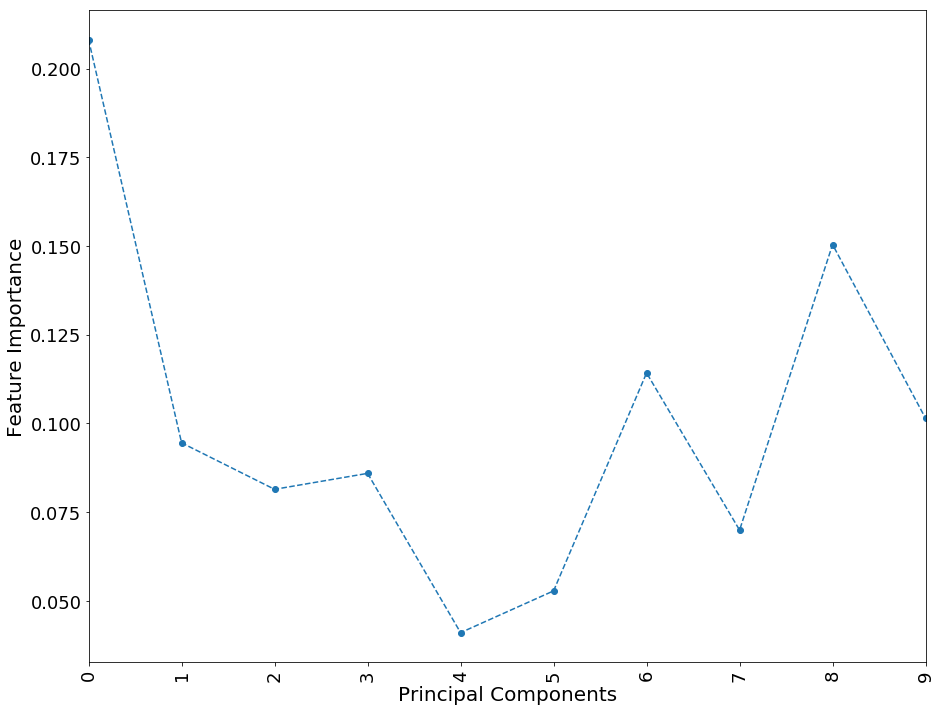

In [230]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [231]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            0.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          23   0       23
1           0  27       27
__all__    23  27       50

Accuracy of the  AdaBoostClassifier  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          3  2        5
1          0  1        1
__all__    3  3        6

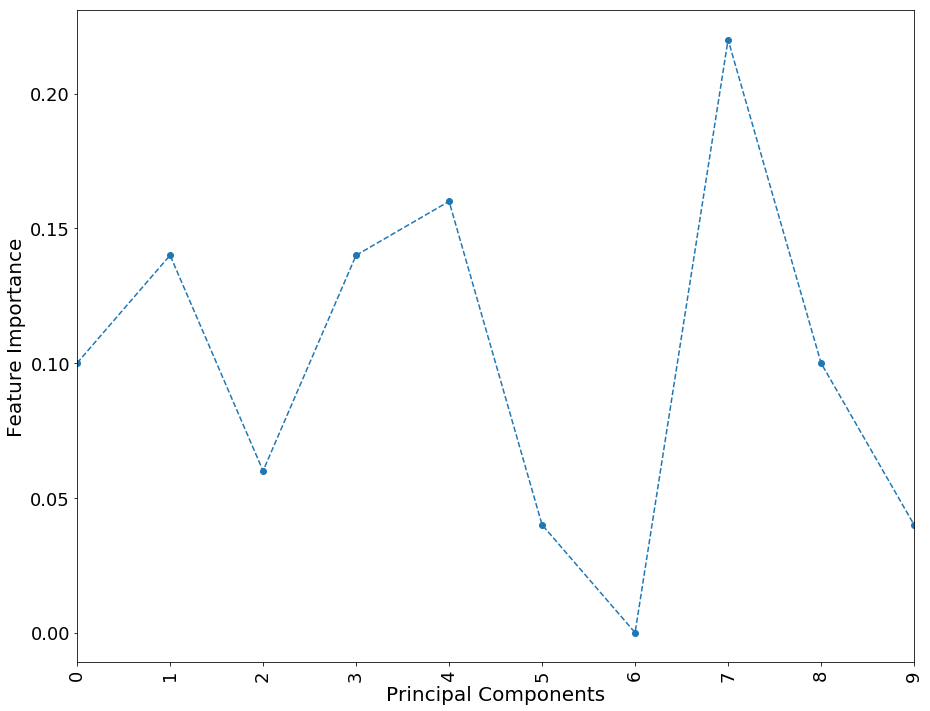

In [232]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_50_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_50_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [233]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.82

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          16   7       23
1           2  25       27
__all__    18  32       50

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          3  2        5
1          0  1        1
__all__    3  3        6

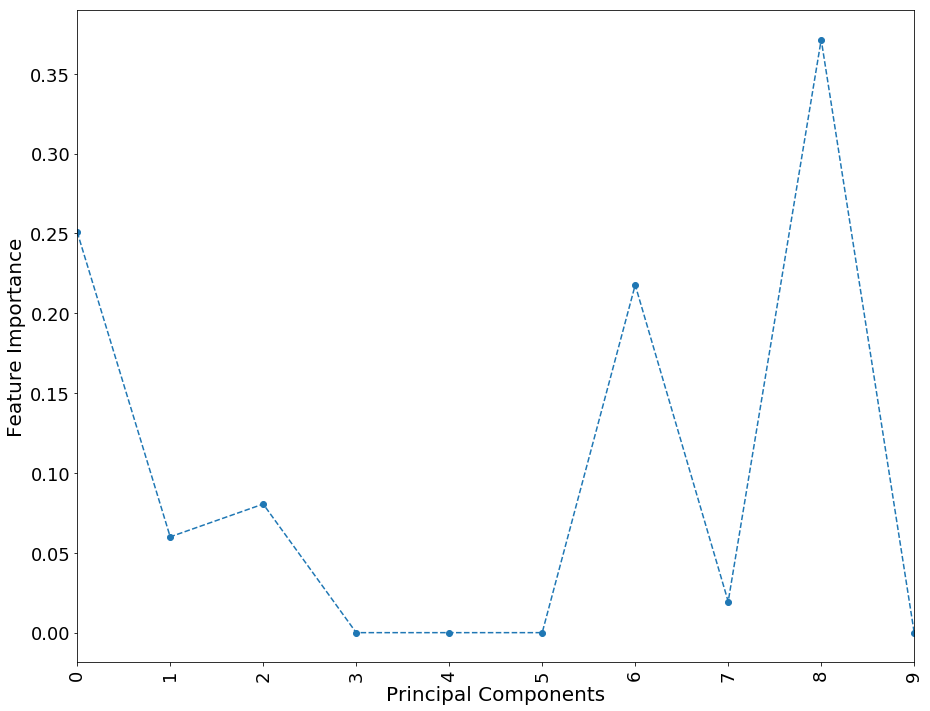

In [234]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_50_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_50_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [235]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     3                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.72

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          16   7       23
1           7  20       27
__all__    23  27       50

Accuracy of the  Extra Decision Tree  model for test data is: 0.833333333333

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

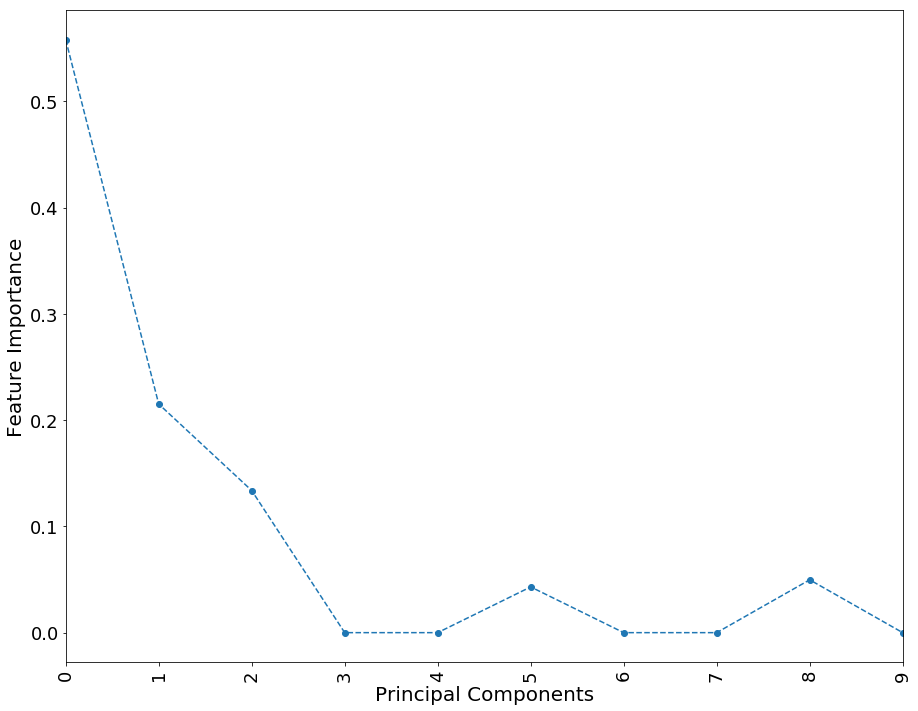

In [237]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=3,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_50_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_50_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 9])
plt.xticks(np.arange(10),np.arange(10),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [238]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.4          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.96

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          22   1       23
1           1  26       27
__all__    23  27       50

Accuracy of the  Bagging  model for test data is: 0.666666666667

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          3  2        5
1          0  1        1
__all__    3  3        6

In [240]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_50_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_50_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [241]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.92


Predicted   0   1  __all__
Actual                    
0          20   3       23
1           1  26       27
__all__    21  29       50

The test accuracy is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [242]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_50_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_50_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [243]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 0.98


Predicted   0   1  __all__
Actual                    
0          23   0       23
1           1  26       27
__all__    24  26       50

The accuracy of the model on test data is: 0.5


Predicted  0  1  __all__
Actual                  
0          3  2        5
1          1  0        1
__all__    4  2        6

In [244]:
table_90_50_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_50_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [245]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=10))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.3min finished


The accuracy of the model on training data is: 0.8


In [246]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          17   6       23
1           4  23       27
__all__    21  29       50

The accuracy of the model on test data is: 0.833333333333


Predicted  0  1  __all__
Actual                  
0          4  1        5
1          0  1        1
__all__    4  2        6

In [247]:
table_90_50_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_50_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [248]:
table_90_50_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_50_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_50_test_PCA.set_index(['index'],drop=True,inplace=True)
table_90_50_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='1.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [249]:
print("Comparision Table for Training Accuracies:")
display(table_90_50_train_PCA)

Comparision Table for Training Accuracies:


accuracy    TP    TN   FP    FN       FPR  \
index                                                                   
KNeighborsClassifier            0.56   6.0  22.0  1.0  21.0  0.777778   
LogisticRegression              0.78  22.0  17.0  6.0   5.0  0.185185   
RandomForestClassifier          0.88  26.0  18.0  5.0   1.0  0.037037   
AdaBoostClassifier              1.00  27.0  23.0  0.0   0.0  0.000000   
GradientBoostingClassifier      0.82  25.0  16.0  7.0   2.0  0.074074   
ExtraTreeClassifier             0.72  20.0  16.0  7.0   7.0  0.259259   
BaggingClassifier               0.96  26.0  22.0  1.0   1.0  0.037037   
VotingClassifier                0.92  26.0  20.0  3.0   1.0  0.037037   
Neural Network-1                0.98  26.0  23.0  0.0   1.0  0.037037   
Neural-Network-2                0.80  23.0  17.0  6.0   4.0  0.148148   

                                 FNR  
index                                 
KNeighborsClassifier        0.043478  
LogisticRegression          0.260870  
RandomForestClassifier      0.217391  
AdaBoostClassifier          0.000000  
GradientBoostingClassifier  0.304348  
ExtraTreeClassifier         0.304348  
BaggingClassifier           0.043478  
VotingClassifier            0.130435  
Neural Network-1            0.000000  
Neural-Network-2            0.260870

In [250]:
print("Comparision Table for Test Accuracies:")
display(table_90_50_test_PCA)

Comparision Table for Test Accuracies:


accuracy        TP        TN        FP        FN  \
index                                                                          
KNeighborsClassifier        0.666667  0.000000  4.000000  1.000000  1.000000   
LogisticRegression          0.833333  4.166667  0.833333  0.833333  0.166667   
RandomForestClassifier      0.666667  1.000000  3.000000  2.000000  0.000000   
AdaBoostClassifier          0.666667  1.000000  3.000000  2.000000  0.000000   
GradientBoostingClassifier  0.666667  1.000000  3.000000  2.000000  0.000000   
ExtraTreeClassifier         0.833333  1.000000  4.000000  1.000000  0.000000   
BaggingClassifier           0.666667  1.000000  3.000000  2.000000  0.000000   
VotingClassifier            0.833333  1.000000  4.000000  1.000000  0.000000   
Neural Network-1            0.500000  0.000000  3.000000  2.000000  1.000000   
Neural-Network-2            0.833333  1.000000  4.000000  1.000000  0.000000   

                                 FPR       FNR  
index                                           
KNeighborsClassifier        1.000000  0.200000  
LogisticRegression          0.166667  0.833333  
RandomForestClassifier      0.000000  0.400000  
AdaBoostClassifier          0.000000  0.400000  
GradientBoostingClassifier  0.000000  0.400000  
ExtraTreeClassifier         0.000000  0.200000  
BaggingClassifier           0.000000  0.400000  
VotingClassifier            0.000000  0.200000  
Neural Network-1            1.000000  0.400000  
Neural-Network-2            0.000000  0.200000

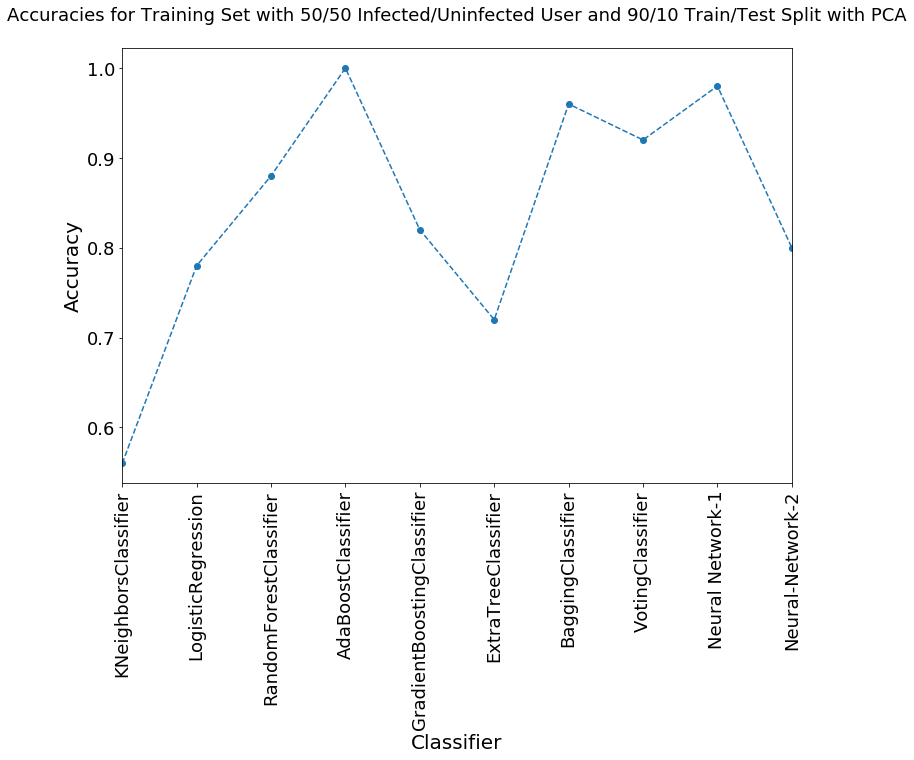

In [251]:
get_accuracy_plot(table_90_50_train_PCA,'Accuracies for Training Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

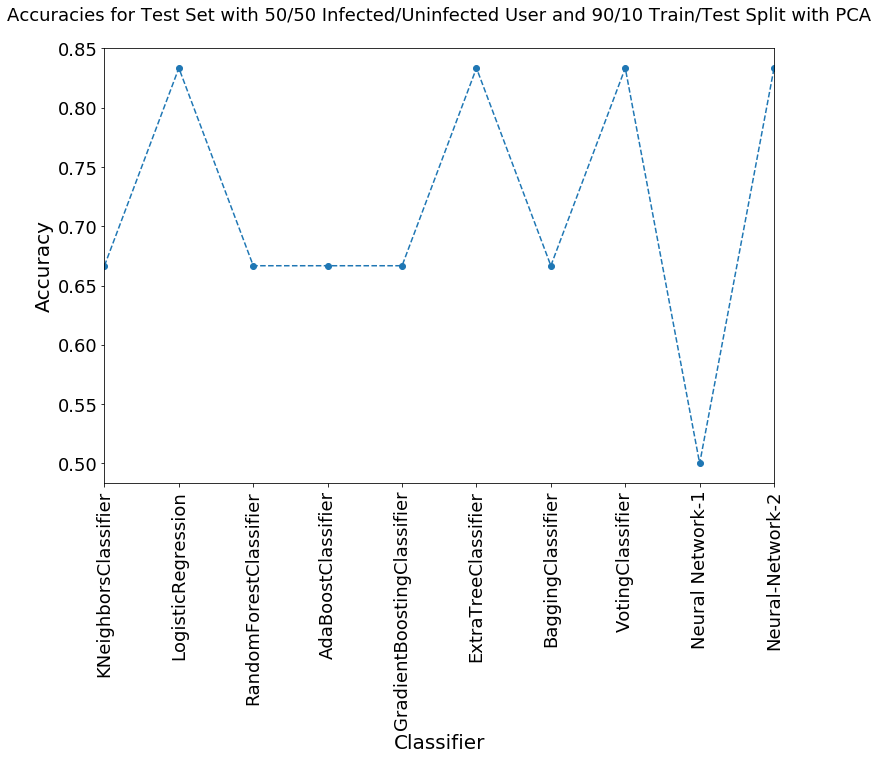

In [252]:
get_accuracy_plot(table_90_50_test_PCA,'Accuracies for Test Set with 50/50 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

<a id='2' style="text-decoration : none; color : #000000;"><h3>2. 30:70 Infected/Uninfected Users</h3.</a>

In [284]:
z=pd.read_csv('Feature_with_Hour_Class_70_30.csv')
z.set_index(['Source_User'],drop=True,inplace=True)

In [285]:
z.columns=['Number of Records','Average Size of Packets Received','Average Size of Packets Sent','Average Elapsed Time',
           'Average number of Bytes sent', 'Average number of Bytes received','Number of different Source Ports',
           'Number of different Destination Ports', 'Number of different Applications','Number of different Source IP',
           'Number of different Destination IP','Target','Average differnce in Received Time',
          'Number of Sessions at 00:00','Number of Sessions at 01:00','Number of Sessions at 02:00','Number of Sessions at 03:00',
          'Number of Sessions at 04:00','Number of Sessions at 05:00','Number of Sessions at 06:00',
          'Number of Sessions at 07:00','Number of Sessions at 08:00','Number of Sessions at 09:00',
          'Number of Sessions at 10:00','Number of Sessions at 11:00','Number of Sessions at 12:00',
          'Number of Sessions at 13:00','Number of Sessions at 14:00','Number of Sessions at 15:00',
          'Number of Sessions at 16:00','Number of Sessions at 17:00','Number of Sessions at 18:00',
          'Number of Sessions at 19:00','Number of Sessions at 20:00','Number of Sessions at 21:00',
          'Number of Sessions at 22:00','Number of Sessions at 23:00']

In [289]:
no_med_user=pd.read_csv('Source_User_No_Medium_Severity.csv')
no_med_user.drop(['Unnamed: 0'],axis=1,inplace=True)
no_med=no_med_user.Source_User
z.reset_index(inplace=True)
x=z[(z.Target==1)&(z.Source_User.isin(no_med))]
y=z[(z.Target==0)]
y=y.sample(n=65)
z=(x.append(y))
z.set_index(['Source_User'],drop=True,inplace=True)
# z.drop(['index'],inplace=True,axis=0)

In [290]:
z.Target.value_counts()

0    65
1    28
Name: Target, dtype: int64

In [291]:
print("The feature vector for infected users and sample of uninfected users")

The feature vector for infected users and sample of uninfected users


In [292]:
z=z.sample(frac=1)
X=z.iloc[:,z.columns!='Target']
display(X.head(2))
X=X.values

Number of Records  \
Source_User                                                             
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                 12   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                 45   

                                                    Average Size of Packets Received  \
Source_User                                                                            
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                         15.666667   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                         94.555556   

                                                    Average Size of Packets Sent  \
Source_User                                                                        
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                      7.000000   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                     64.533333   

                                                    Average Elapsed Time  \
Source_User                                                                
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...             62.833333   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...             86.311111   

                                                    Average number of Bytes sent  \
Source_User                                                                        
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                    588.333333   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                   8754.400000   

                                                    Average number of Bytes received  \
Source_User                                                                            
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                      17169.583333   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                      32578.600000   

                                                    Number of different Source Ports  \
Source_User                                                                            
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                              12.0   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                              45.0   

                                                    Number of different Destination Ports  \
Source_User                                                                                 
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                                    2.0   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                                    5.0   

                                                    Number of different Applications  \
Source_User                                                                            
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                                 3   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                                 8   

                                                    Number of different Source IP  \
Source_User                                                                         
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                              1   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                             12   

                                                    Number of different Destination IP  \
Source_User                                                                              
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                                   5   
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed...                                  25   

                                                    Average differnce in Received Time  \
Source_User                                                                              
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789b...                            4.000000   
fefc2ec35b4c9cfd50a0d0d

In [293]:
print("1 -> Infected\n0 -> Uninfected")
Y=z.Target
display(Y.head(10))
Y=Y.values

1 -> Infected
0 -> Uninfected


Source_User
d41769af967b34bbab86f95e892b7a977c7f3c6bec0789bfde909a784a308934    0
fefc2ec35b4c9cfd50a0d0db710c19e3c24860b40ee43ed6a0c8c6dd1e38c8d0    0
38b411ea8e2eddf258d18a1d0a3d0088cb07f52fe83f05487adc2e50afbe649f    0
1510909c55f8994397a5aced5728fca609aff1b6bab31080e919795aeb2db97d    1
ac0fa42e900157158c1ccabd14d61ff8a5a00f672918473296ba0249974e2bca    0
a905175974a71113bb8794ec07b0e03add816a329c9e971c833710d4bdd52abf    1
775b9d0c9c4d33c6aa0e0e8daf58e304421f6e1930913445076193d5d4c43afc    0
68c74bb3347fb72bd2b7daf9dcdfa212098f2c559cb1cbe3bd8d56cb0423d4a6    0
120eb1d749e90fed75a0743c6106431035b81d344849348126c50caa61568630    0
f52846069af3ef50f230f86ac40cdfe41e461a5e749951f112cd0f7c8e605a9e    1
Name: Target, dtype: int64

<a id='2.A' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split</h3.</a>

In [294]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.2)

The train/test split ratio is 80:20


In [295]:
table_80_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [296]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           20  uniform


Accuracy of the  KNN  model for training data is: 0.77027027027

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          50  1       51
1          16  7       23
__all__    66  8       74

Accuracy of the  KNN  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           4  1        5
__all__    17  2       19

In [297]:
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [298]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.810810810811

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          46   5       51
1           9  14       23
__all__    55  19       74

Accuracy of the  Logistic  model for test data is: 0.684210526316

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          12  2       14
1           4  1        5
__all__    16  3       19

In [299]:
logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [300]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.824324324324


Predicted   0   1  __all__
Actual                    
0          47   4       51
1           9  14       23
__all__    56  18       74

Accuracy of Random Forest Model on test data is: 0.789473684211


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           3  2        5
__all__    16  3       19

In [301]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

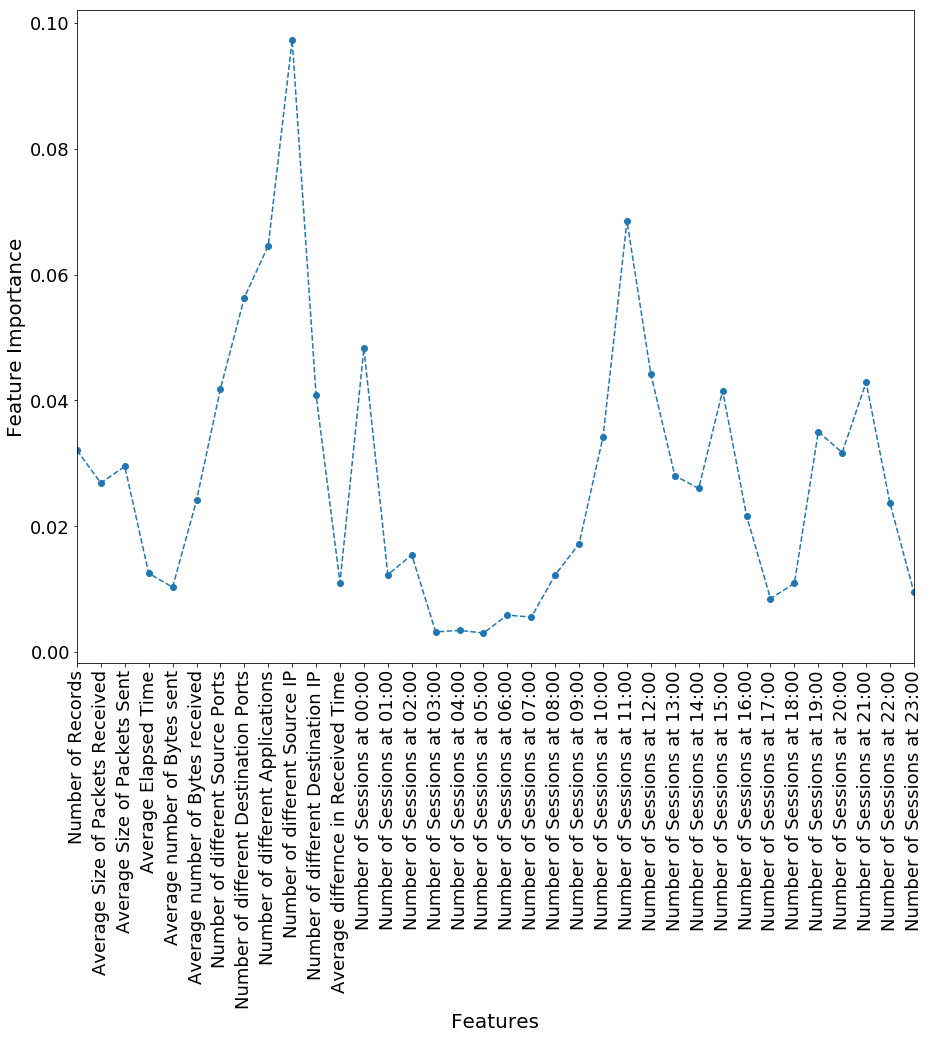

In [302]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [303]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R              1           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           0  23       23
__all__    51  23       74

Accuracy of the  AdaBoostClassifier  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          12  2       14
1           3  2        5
__all__    15  4       19

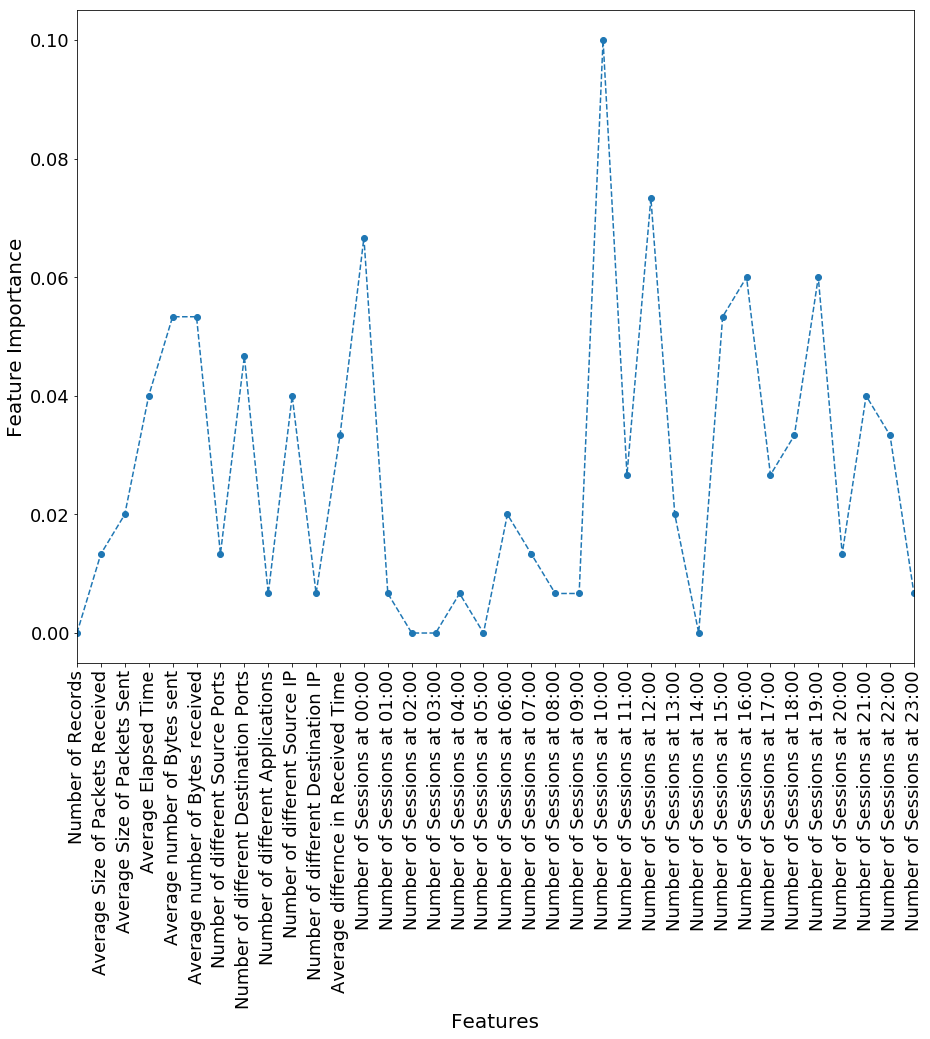

In [304]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [305]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                10   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.918918918919

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          50   1       51
1           5  18       23
__all__    55  19       74

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           4  1        5
__all__    17  2       19

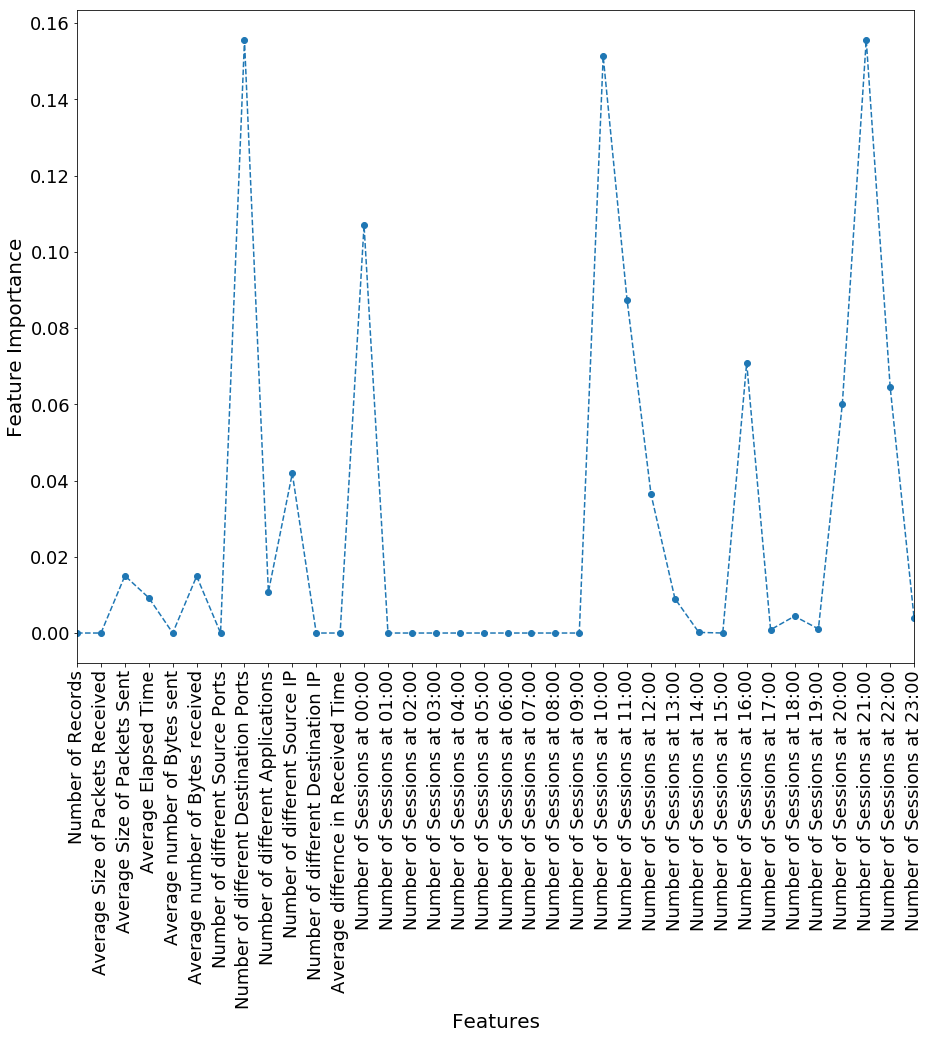

In [307]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=10,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [308]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.783783783784

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          45   6       51
1          10  13       23
__all__    55  19       74

Accuracy of the  Extra Decision Tree  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          12  2       14
1           3  2        5
__all__    15  4       19

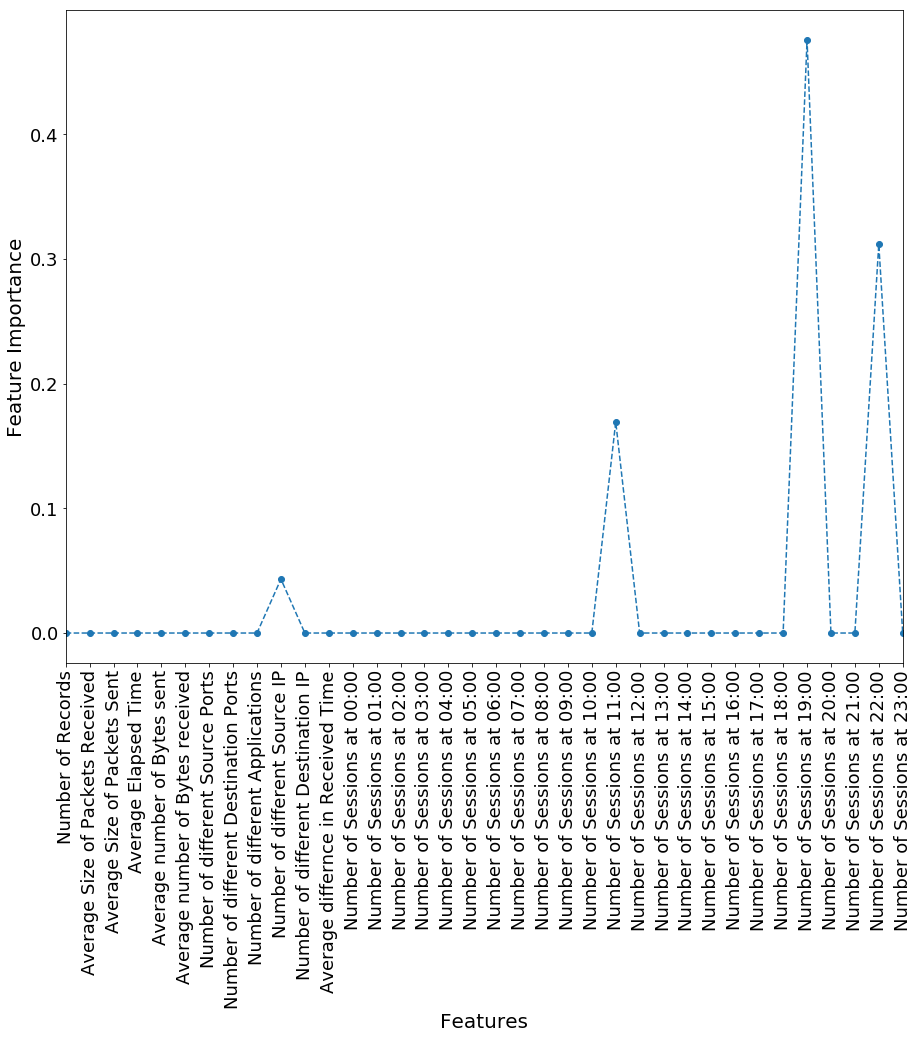

In [309]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [310]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.891891891892

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           8  15       23
__all__    59  15       74

Accuracy of the  Bagging  model for test data is: 0.789473684211

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           3  2        5
__all__    16  3       19

In [311]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [312]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.905405405405


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           7  16       23
__all__    58  16       74

The test accuracy is: 0.789473684211


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           3  2        5
__all__    16  3       19

In [313]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [314]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           0  23       23
__all__    51  23       74

The accuracy of the model on test data is: 0.631578947368


Predicted   0  1  __all__
Actual                   
0          11  3       14
1           4  1        5
__all__    15  4       19

In [315]:
table_80_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [316]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


The accuracy of the model on training data is: 0.864864864865


In [317]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          49   2       51
1           8  15       23
__all__    57  17       74

The accuracy of the model on test data is: 0.684210526316


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           5  0        5
__all__    18  1       19

In [318]:
table_80_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [319]:
table_80_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test.set_index(['index'],drop=True,inplace=True)
table_80_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.A.A' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [320]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train)

Comparision Table for Training Accuracies:


accuracy    TP    TN   FP    FN       FPR  \
index                                                                   
KNeighborsClassifier        0.770270   7.0  50.0  1.0  16.0  0.695652   
LogisticRegression          0.783784  15.0  43.0  8.0   8.0  0.347826   
RandomForestClassifier      0.824324  14.0  47.0  4.0   9.0  0.391304   
AdaBoostClassifier          1.000000  23.0  51.0  0.0   0.0  0.000000   
GradientBoostingClassifier  0.918919  18.0  50.0  1.0   5.0  0.217391   
ExtraTreeClassifier         0.783784  13.0  45.0  6.0  10.0  0.434783   
BaggingClassifier           0.891892  15.0  51.0  0.0   8.0  0.347826   
VotingClassifier            0.905405  16.0  51.0  0.0   7.0  0.304348   
Neural Network-1            1.000000  23.0  51.0  0.0   0.0  0.000000   
Neural-Network-2            0.864865  15.0  49.0  2.0   8.0  0.347826   

                                 FNR  
index                                 
KNeighborsClassifier        0.019608  
LogisticRegression          0.156863  
RandomForestClassifier      0.078431  
AdaBoostClassifier          0.000000  
GradientBoostingClassifier  0.019608  
ExtraTreeClassifier         0.117647  
BaggingClassifier           0.000000  
VotingClassifier            0.000000  
Neural Network-1            0.000000  
Neural-Network-2            0.039216

In [321]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test)

Comparision Table for Test Accuracies:


accuracy   TP    TN   FP   FN  FPR       FNR
index                                                                   
KNeighborsClassifier        0.736842  1.0  13.0  1.0  4.0  0.8  0.071429
LogisticRegression          0.789474  2.0  13.0  1.0  3.0  0.6  0.071429
RandomForestClassifier      0.789474  2.0  13.0  1.0  3.0  0.6  0.071429
AdaBoostClassifier          0.736842  2.0  12.0  2.0  3.0  0.6  0.142857
GradientBoostingClassifier  0.736842  1.0  13.0  1.0  4.0  0.8  0.071429
ExtraTreeClassifier         0.736842  2.0  12.0  2.0  3.0  0.6  0.142857
BaggingClassifier           0.789474  2.0  13.0  1.0  3.0  0.6  0.071429
VotingClassifier            0.789474  2.0  13.0  1.0  3.0  0.6  0.071429
Neural Network-1            0.631579  1.0  11.0  3.0  4.0  0.8  0.214286
Neural-Network-2            0.684211  0.0  13.0  1.0  5.0  1.0  0.071429

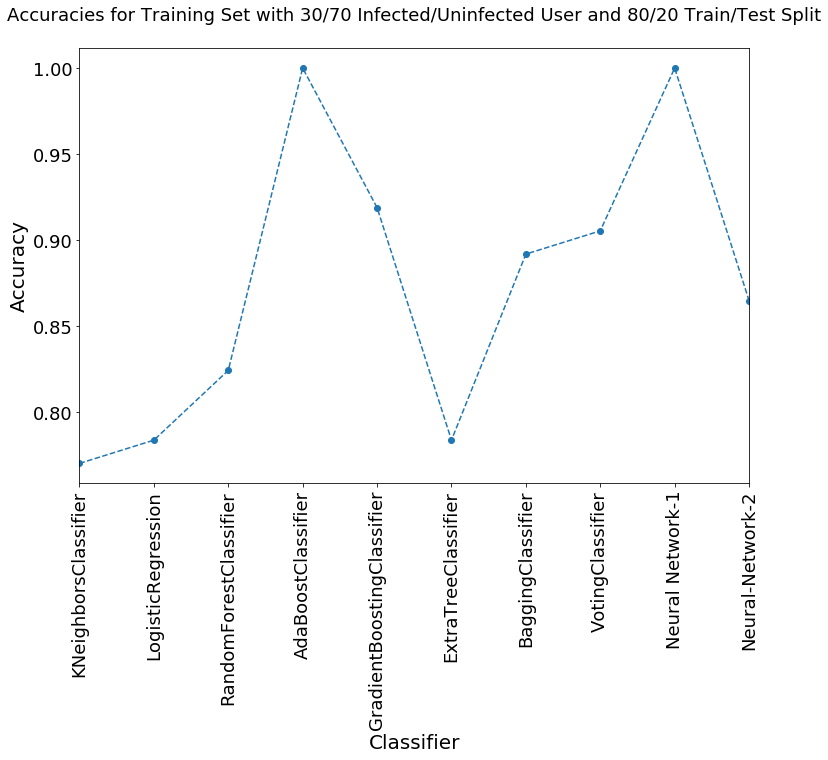

In [322]:
get_accuracy_plot(table_80_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

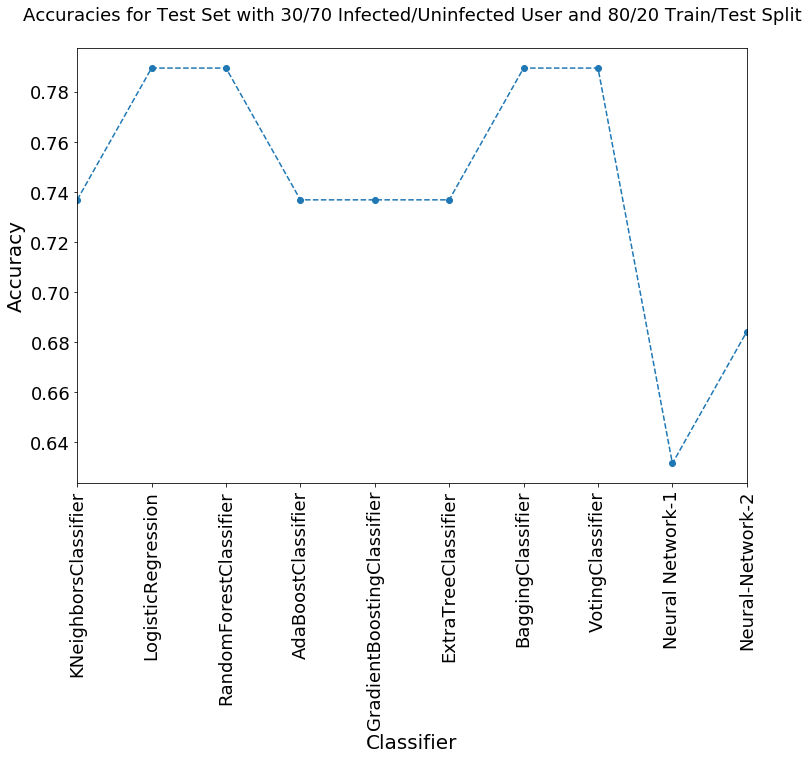

In [323]:
get_accuracy_plot(table_80_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split')

<a id='2.B' style="text-decoration : none; color : #000000;"><h3>80:20 Train/Test Split with PCA</h3.</a>

In [330]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 80:20")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.2)

Variance explained using 15 components is: 0.946789345141
The train/test split ratio is 80:20


In [331]:
table_80_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_80_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [332]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           20  uniform


Accuracy of the  KNN  model for training data is: 0.689189189189

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          51  0       51
1          23  0       23
__all__    74  0       74

Accuracy of the  KNN  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [356]:
%%capture
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_80_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_80_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [335]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.7  False           True                0.5       100  multinomial   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.783783783784

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          45   6       51
1          10  13       23
__all__    55  19       74

Accuracy of the  Logistic  model for test data is: 0.684210526316

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           5  0        5
__all__    18  1       19

In [336]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='multinomial',penalty='l2',solver='sag',tol=1e-1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_80_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_80_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [337]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.851351351351


Predicted   0   1  __all__
Actual                    
0          51   0       51
1          11  12       23
__all__    62  12       74

Accuracy of Random Forest Model on test data is: 0.736842105263


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [357]:
%%capture
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_80_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_80_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

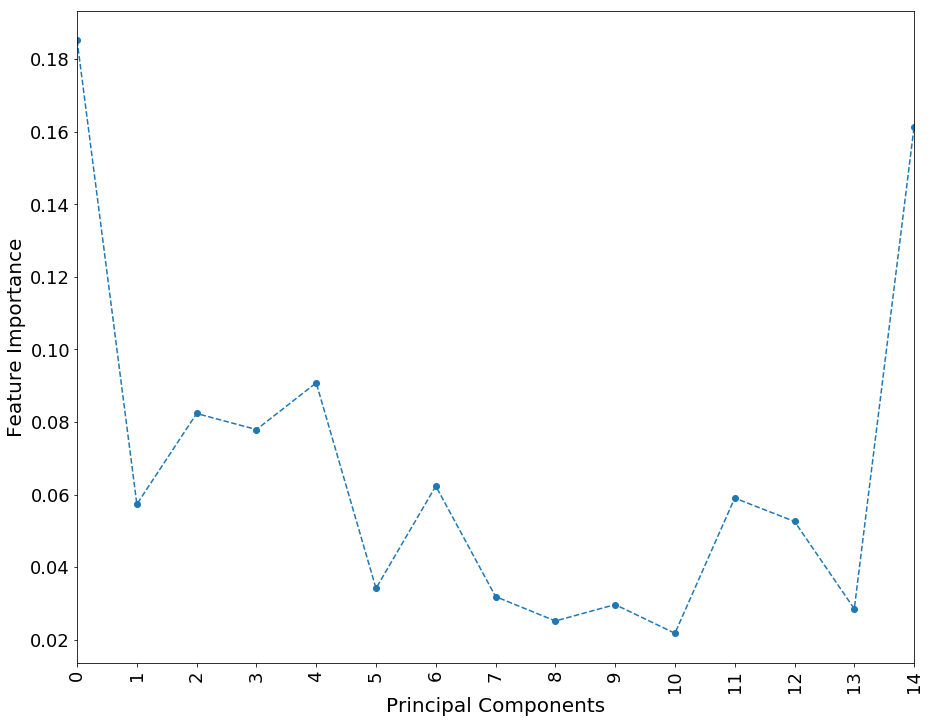

In [339]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [340]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            1.5            50             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           0  23       23
__all__    51  23       74

Accuracy of the  AdaBoostClassifier  model for test data is: 0.631578947368

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          11  3       14
1           4  1        5
__all__    15  4       19

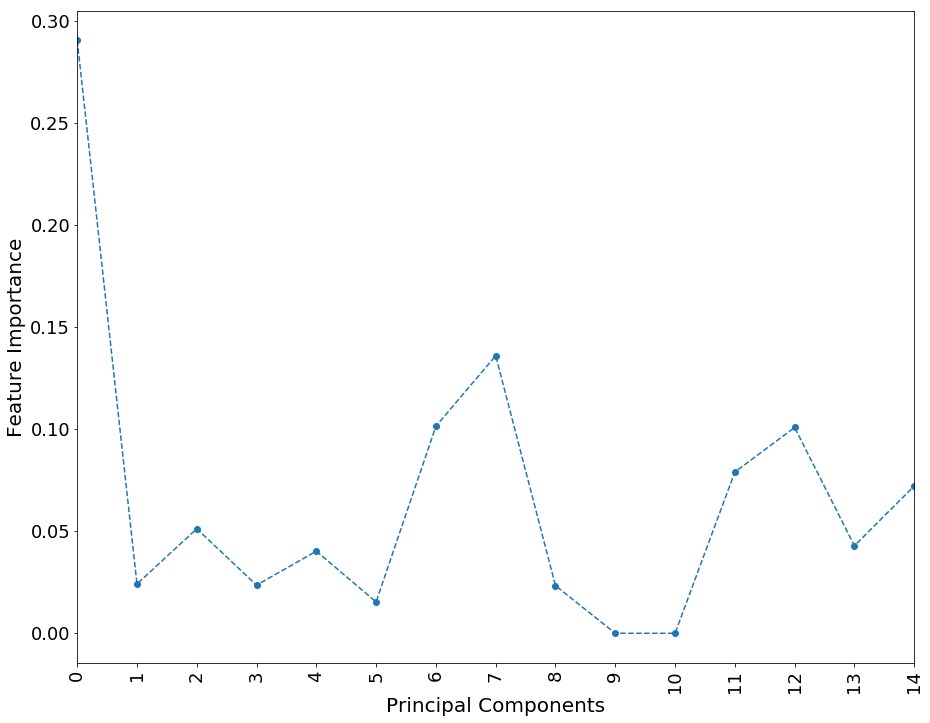

In [348]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_80_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_80_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [349]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.837837837838

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          49   2       51
1          10  13       23
__all__    59  15       74

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [354]:
%%capture
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_80_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_80_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

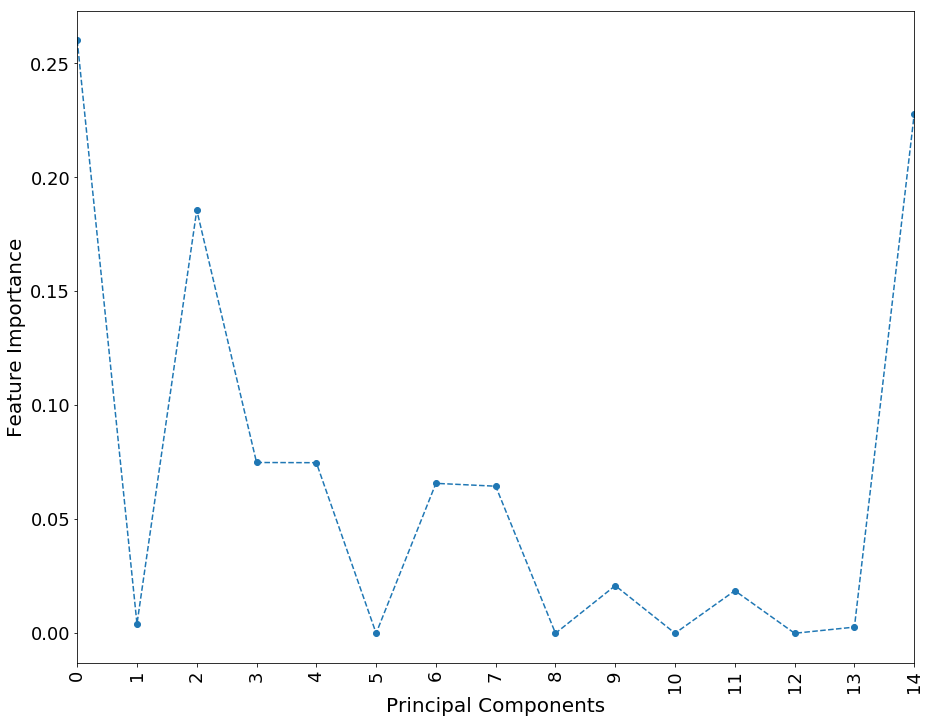

In [355]:
fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [351]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     5                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.864864864865

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          49   2       51
1           8  15       23
__all__    57  17       74

Accuracy of the  Extra Decision Tree  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [358]:
%%capture
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=5,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_80_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_80_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])

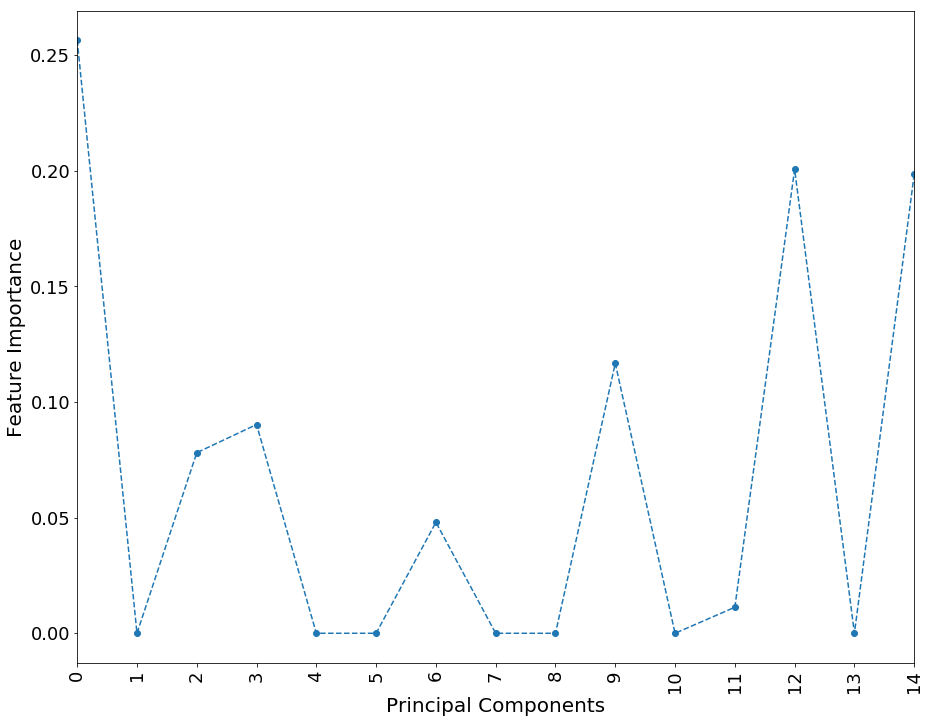

In [359]:
fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [353]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.932432432432

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           5  18       23
__all__    56  18       74

Accuracy of the  Bagging  model for test data is: 0.736842105263

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [361]:
%%capture
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.4,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_80_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_80_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [362]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.891891891892


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           8  15       23
__all__    59  15       74

The test accuracy is: 0.736842105263


Predicted   0  1  __all__
Actual                   
0          14  0       14
1           5  0        5
__all__    19  0       19

In [363]:
%%capture
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_80_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_80_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [364]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          51   0       51
1           0  23       23
__all__    51  23       74

The accuracy of the model on test data is: 0.526315789474


Predicted   0  1  __all__
Actual                   
0           9  5       14
1           4  1        5
__all__    13  6       19

In [365]:
table_80_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_80_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [367]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.8min finished


The accuracy of the model on training data is: 0.878378378378


In [368]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          48   3       51
1           6  17       23
__all__    54  20       74

The accuracy of the model on test data is: 0.684210526316


Predicted   0  1  __all__
Actual                   
0          13  1       14
1           5  0        5
__all__    18  1       19

In [369]:
table_80_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_80_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [370]:
table_80_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_80_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_80_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_80_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.B.B' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [371]:
print("Comparision Table for Training Accuracies:")
display(table_80_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy         TP         TN         FP  \
index                                                                   
KNeighborsClassifier        0.689189  35.148649  15.851351  15.851351   
LogisticRegression          0.770270  12.000000  45.000000   6.000000   
RandomForestClassifier      0.851351  12.000000  51.000000   0.000000   
AdaBoostClassifier          0.972973  21.000000  51.000000   0.000000   
GradientBoostingClassifier  0.837838  13.000000  49.000000   2.000000   
ExtraTreeClassifier         0.864865  15.000000  49.000000   2.000000   
BaggingClassifier           0.959459  20.000000  51.000000   0.000000   
VotingClassifier            0.891892  15.000000  51.000000   0.000000   
Neural Network-1            1.000000  23.000000  51.000000   0.000000   
Neural-Network-2            0.878378  17.000000  48.000000   3.000000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier         7.148649  0.310811  0.689189  
LogisticRegression          11.000000  0.478261  0.117647  
RandomForestClassifier      11.000000  0.478261  0.000000  
AdaBoostClassifier           2.000000  0.086957  0.000000  
GradientBoostingClassifier  10.000000  0.434783  0.039216  
ExtraTreeClassifier          8.000000  0.347826  0.039216  
BaggingClassifier            3.000000  0.130435  0.000000  
VotingClassifier             8.000000  0.347826  0.000000  
Neural Network-1             0.000000  0.000000  0.000000  
Neural-Network-2             6.000000  0.260870  0.058824

In [372]:
print("Comparision Table for Test Accuracies:")
display(table_80_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy         TP         TN        FP  \
index                                                                  
KNeighborsClassifier        0.736842  10.315789   3.684211  3.684211   
LogisticRegression          0.684211   0.000000  13.000000  1.000000   
RandomForestClassifier      0.736842  10.315789   3.684211  3.684211   
AdaBoostClassifier          0.684211   0.000000  13.000000  1.000000   
GradientBoostingClassifier  0.736842  10.315789   3.684211  3.684211   
ExtraTreeClassifier         0.736842  10.315789   3.684211  3.684211   
BaggingClassifier           0.736842  10.315789   3.684211  3.684211   
VotingClassifier            0.736842  10.315789   3.684211  3.684211   
Neural Network-1            0.526316   1.000000   9.000000  5.000000   
Neural-Network-2            0.684211   0.000000  13.000000  1.000000   

                                  FN       FPR       FNR  
index                                                     
KNeighborsClassifier        1.315789  0.263158  0.736842  
LogisticRegression          5.000000  1.000000  0.071429  
RandomForestClassifier      1.315789  0.263158  0.736842  
AdaBoostClassifier          5.000000  1.000000  0.071429  
GradientBoostingClassifier  1.315789  0.263158  0.736842  
ExtraTreeClassifier         1.315789  0.263158  0.736842  
BaggingClassifier           1.315789  0.263158  0.736842  
VotingClassifier            1.315789  0.263158  0.736842  
Neural Network-1            4.000000  0.800000  0.357143  
Neural-Network-2            5.000000  1.000000  0.071429

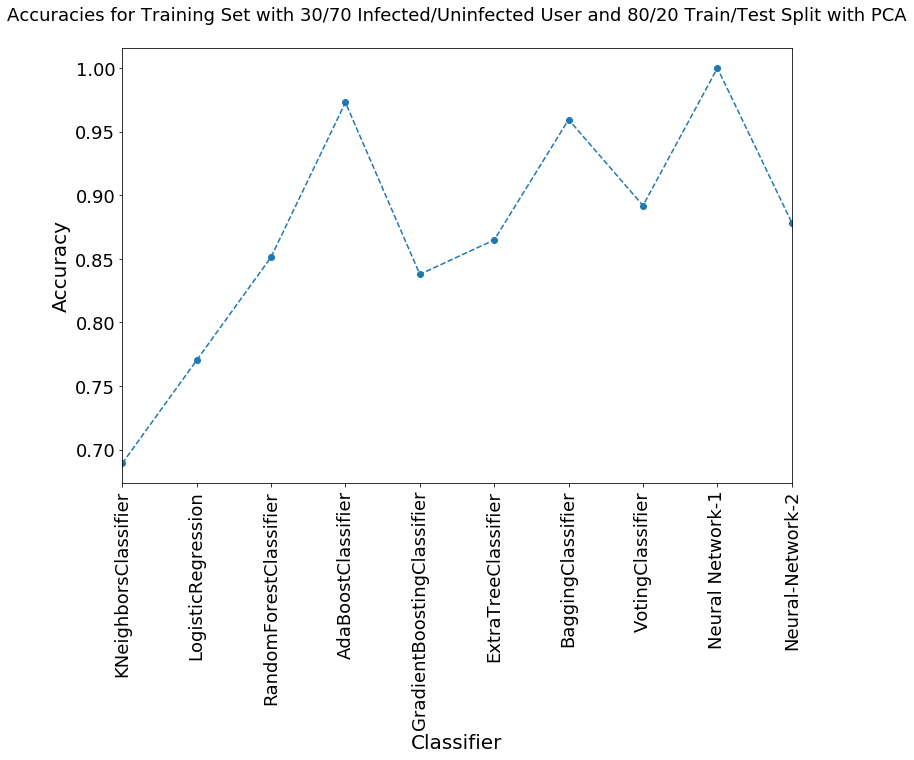

In [373]:
get_accuracy_plot(table_80_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

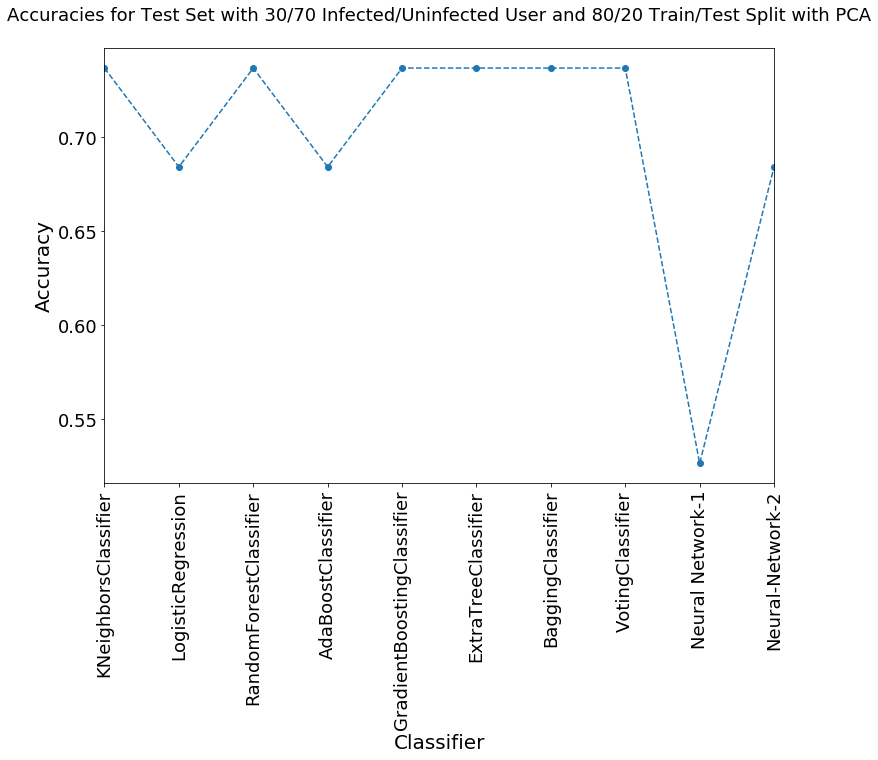

In [374]:
get_accuracy_plot(table_80_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 80/20 Train/Test Split with PCA')

<a id='2.C' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split</h3.</a>

In [375]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=0,test_size=0.3)

The train/test split ratio is 70:30


In [376]:
table_70_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [377]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           30  uniform


Accuracy of the  KNN  model for training data is: 0.676923076923

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          44  0       44
1          21  0       21
__all__    65  0       65

Accuracy of the  KNN  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [379]:
%%capture
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [380]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False          False                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.753846153846

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          33  11       44
1           5  16       21
__all__    38  27       65

Accuracy of the  Logistic  model for test data is: 0.642857142857

Confusion Matrix for test data is:


Predicted   0   1  __all__
Actual                    
0          14   7       21
1           3   4        7
__all__    17  11       28

In [381]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=False,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [382]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.861538461538


Predicted   0   1  __all__
Actual                    
0          42   2       44
1           7  14       21
__all__    49  16       65

Accuracy of Random Forest Model on test data is: 0.821428571429


Predicted   0  1  __all__
Actual                   
0          19  2       21
1           3  4        7
__all__    22  6       28

In [383]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

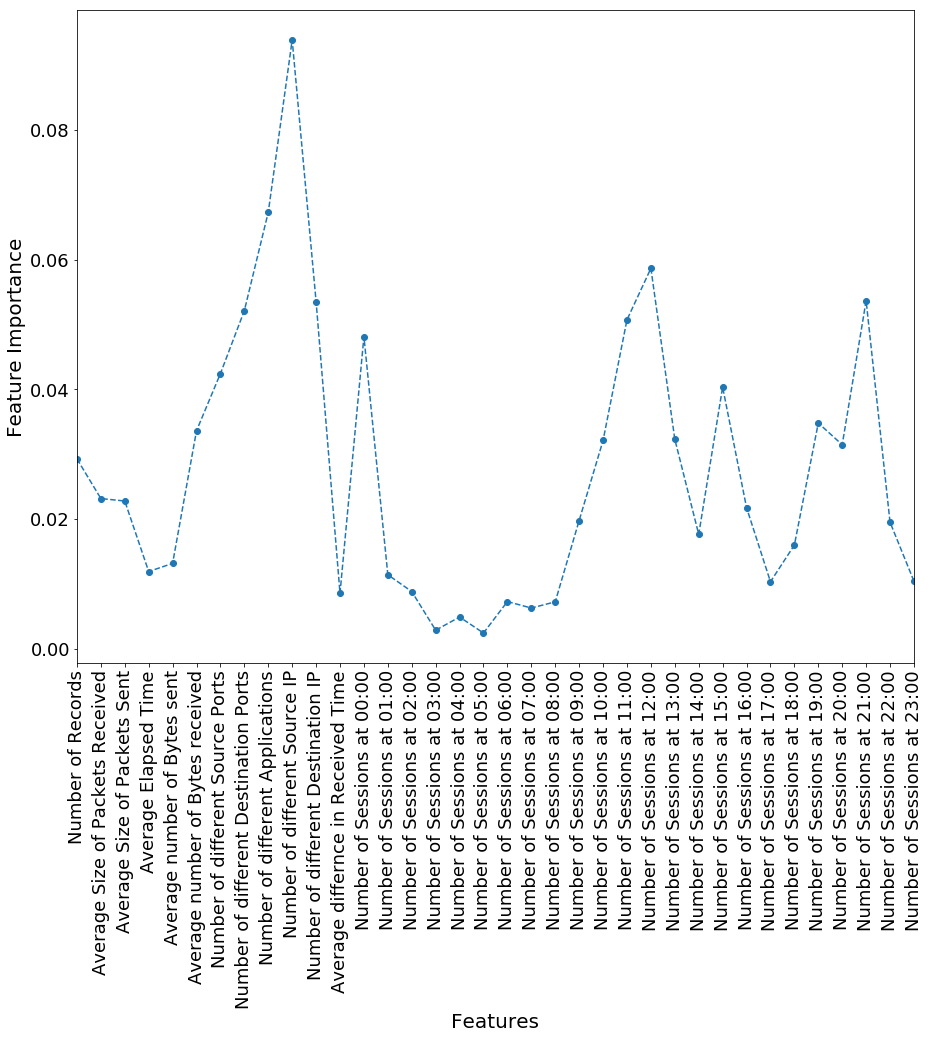

In [384]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [385]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME            0.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           0  21       21
__all__    44  21       65

Accuracy of the  AdaBoostClassifier  model for test data is: 0.678571428571

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          16  5       21
1           4  3        7
__all__    20  8       28

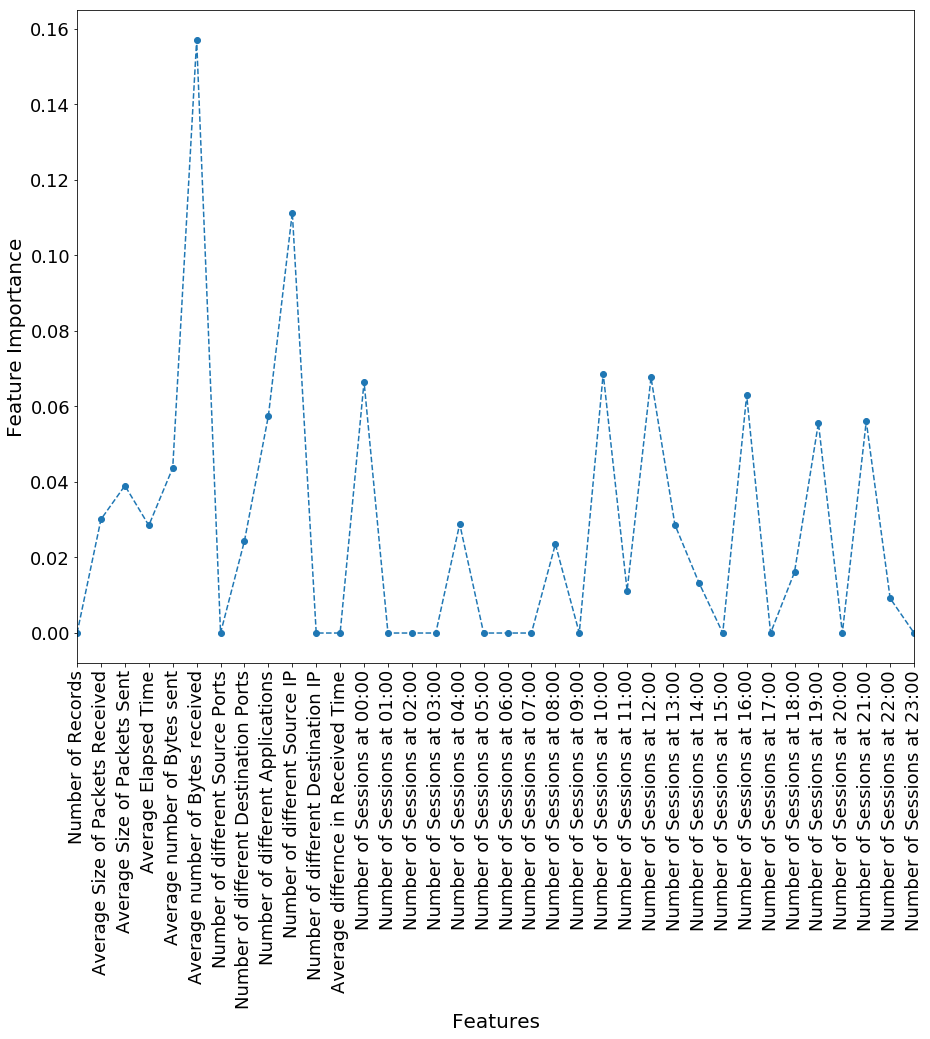

In [386]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5,n_estimators=100,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [387]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.846153846154

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          42   2       44
1           8  13       21
__all__    50  15       65

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          17  4       21
1           3  4        7
__all__    20  8       28

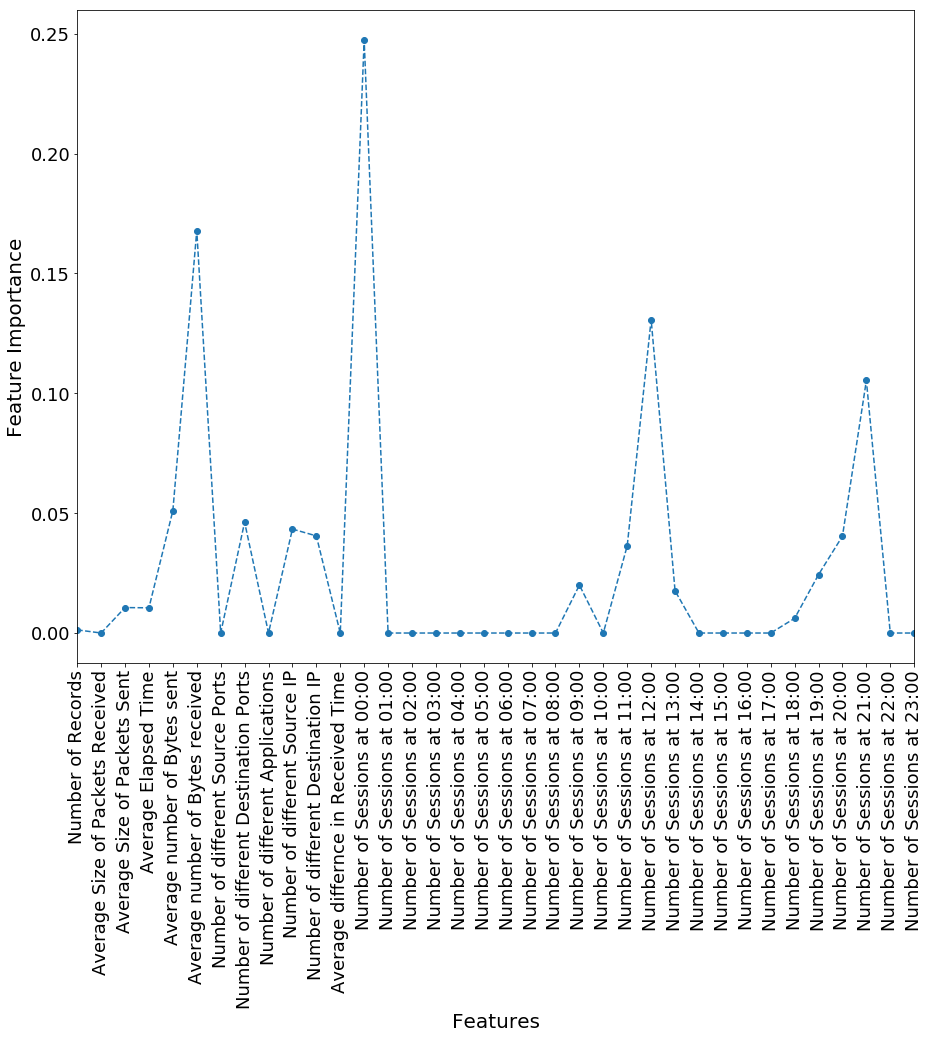

In [388]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [389]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0    random


Accuracy of the  Extra Decision Tree  model for training data is: 0.676923076923

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          44  0       44
1          21  0       21
__all__    65  0       65

Accuracy of the  Extra Decision Tree  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [393]:
%%capture
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='random')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_70_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])

#### Bagging

In [395]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.4          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.876923076923

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          43   1       44
1           7  14       21
__all__    50  15       65

Accuracy of the  Bagging  model for test data is: 0.857142857143

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          20  1       21
1           3  4        7
__all__    23  5       28

In [396]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.4,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_70_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [397]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.876923076923


Predicted   0   1  __all__
Actual                    
0          43   1       44
1           7  14       21
__all__    50  15       65

The test accuracy is: 0.821428571429


Predicted   0  1  __all__
Actual                   
0          19  2       21
1           3  4        7
__all__    22  6       28

In [398]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [399]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           0  21       21
__all__    44  21       65

The accuracy of the model on test data is: 0.571428571429


Predicted   0  1  __all__
Actual                   
0          16  5       21
1           7  0        7
__all__    23  5       28

In [400]:
table_70_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [401]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished


The accuracy of the model on training data is: 0.846153846154


In [402]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          43   1       44
1           9  12       21
__all__    52  13       65

The accuracy of the model on test data is: 0.678571428571


Predicted   0  1  __all__
Actual                   
0          19  2       21
1           7  0        7
__all__    26  2       28

In [403]:
table_70_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [404]:
table_70_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_75_test.set_index(['index'],drop=True,inplace=True)
table_70_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.C.C' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [405]:
print("Comparision Table for Training Accuracies:")
display(table_70_75_train)

Comparision Table for Training Accuracies:


accuracy         TP         TN         FP  \
index                                                                   
KNeighborsClassifier        0.676923  29.784615  14.215385  14.215385   
LogisticRegression          0.769231  15.000000  35.000000   9.000000   
RandomForestClassifier      0.861538  14.000000  42.000000   2.000000   
AdaBoostClassifier          1.000000  21.000000  44.000000   0.000000   
GradientBoostingClassifier  0.846154  13.000000  42.000000   2.000000   
ExtraTreeClassifier         0.676923  29.784615  14.215385  14.215385   
BaggingClassifier           0.876923  14.000000  43.000000   1.000000   
VotingClassifier            0.876923  14.000000  43.000000   1.000000   
Neural Network-1            1.000000  21.000000  44.000000   0.000000   
Neural-Network-2            0.846154  12.000000  43.000000   1.000000   

                                  FN       FPR       FNR  
index                                                     
KNeighborsClassifier        6.784615  0.323077  0.676923  
LogisticRegression          6.000000  0.285714  0.204545  
RandomForestClassifier      7.000000  0.333333  0.045455  
AdaBoostClassifier          0.000000  0.000000  0.000000  
GradientBoostingClassifier  8.000000  0.380952  0.045455  
ExtraTreeClassifier         6.784615  0.323077  0.676923  
BaggingClassifier           7.000000  0.333333  0.022727  
VotingClassifier            7.000000  0.333333  0.022727  
Neural Network-1            0.000000  0.000000  0.000000  
Neural-Network-2            9.000000  0.428571  0.022727

In [406]:
print("Comparision Table for Test Accuracies:")
display(table_70_75_test)

Comparision Table for Test Accuracies:


accuracy     TP     TN    FP    FN       FPR  \
index                                                                      
KNeighborsClassifier        0.750000  15.75   5.25  5.25  1.75  0.250000   
LogisticRegression          0.607143   3.00  14.00  7.00  4.00  0.571429   
RandomForestClassifier      0.821429   4.00  19.00  2.00  3.00  0.428571   
AdaBoostClassifier          0.678571   3.00  16.00  5.00  4.00  0.571429   
GradientBoostingClassifier  0.750000   4.00  17.00  4.00  3.00  0.428571   
ExtraTreeClassifier         0.750000  15.75   5.25  5.25  1.75  0.250000   
BaggingClassifier           0.857143   4.00  20.00  1.00  3.00  0.428571   
VotingClassifier            0.821429   4.00  19.00  2.00  3.00  0.428571   
Neural Network-1            0.571429   0.00  16.00  5.00  7.00  1.000000   
Neural-Network-2            0.678571   0.00  19.00  2.00  7.00  1.000000   

                                 FNR  
index                                 
KNeighborsClassifier        0.750000  
LogisticRegression          0.333333  
RandomForestClassifier      0.095238  
AdaBoostClassifier          0.238095  
GradientBoostingClassifier  0.190476  
ExtraTreeClassifier         0.750000  
BaggingClassifier           0.047619  
VotingClassifier            0.095238  
Neural Network-1            0.238095  
Neural-Network-2            0.095238

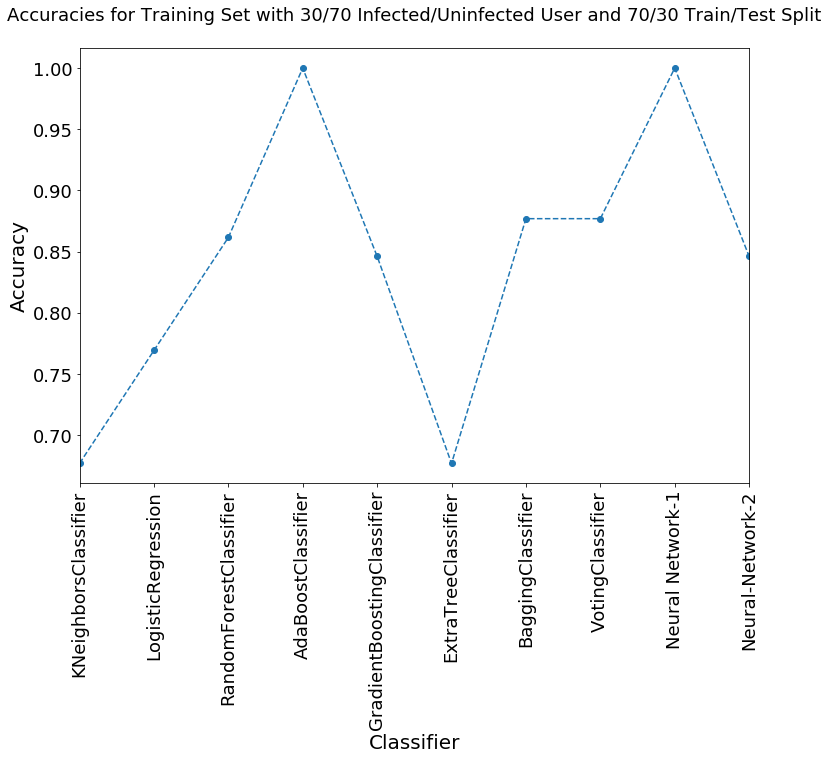

In [407]:
get_accuracy_plot(table_70_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split')

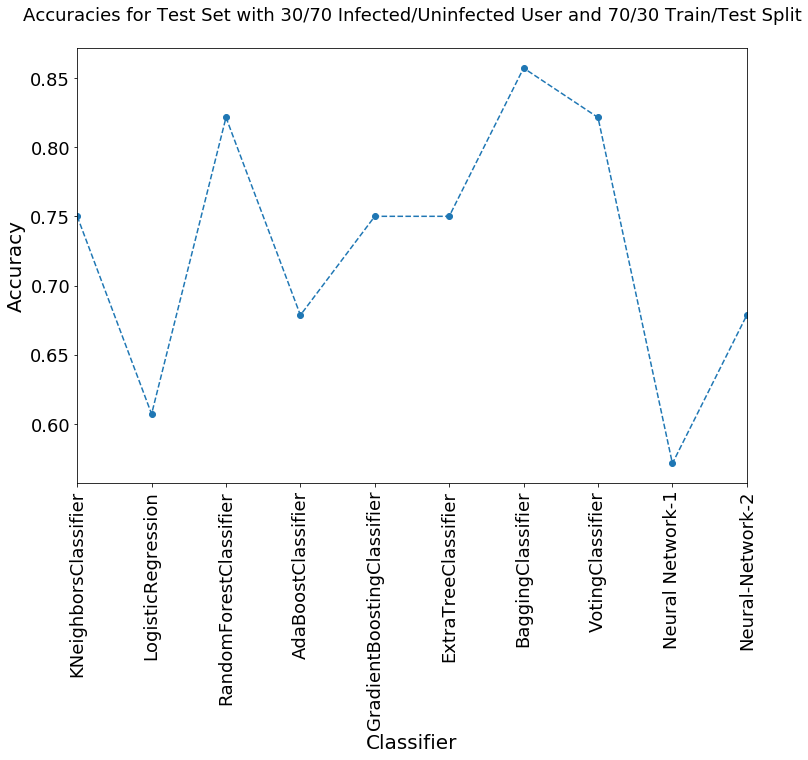

In [408]:
get_accuracy_plot(table_70_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split')

<a id='2.D' style="text-decoration : none; color : #000000;"><h3>70:30 Train/Test Split with PCA</h3.</a>

In [409]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 70:30")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.3)

Variance explained using 15 components is: 0.946789345141
The train/test split ratio is 70:30


In [410]:
table_70_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_70_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [411]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           20  uniform


Accuracy of the  KNN  model for training data is: 0.676923076923

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          44  0       44
1          21  0       21
__all__    65  0       65

Accuracy of the  KNN  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [413]:
%%capture
knn=KNeighborsClassifier(n_neighbors=20,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_70_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_70_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [414]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5        50          ovr   

             6          7      8  
index  penalty     solver    tol  
0           l2  newton-cg  1e-05


Accuracy of the  Logistic  model for training data is: 0.769230769231

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          39   5       44
1          10  11       21
__all__    49  16       65

Accuracy of the  Logistic  model for test data is: 0.642857142857

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          18  3       21
1           7  0        7
__all__    25  3       28

In [415]:
logistic=LogisticRegression(C=0.3,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=50,multi_class='ovr',penalty='l2',solver='newton-cg',tol=1e-5)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_70_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_70_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [416]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.861538461538


Predicted   0   1  __all__
Actual                    
0          43   1       44
1           8  13       21
__all__    51  14       65

Accuracy of Random Forest Model on test data is: 0.75


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [418]:
%%capture
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_70_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_70_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

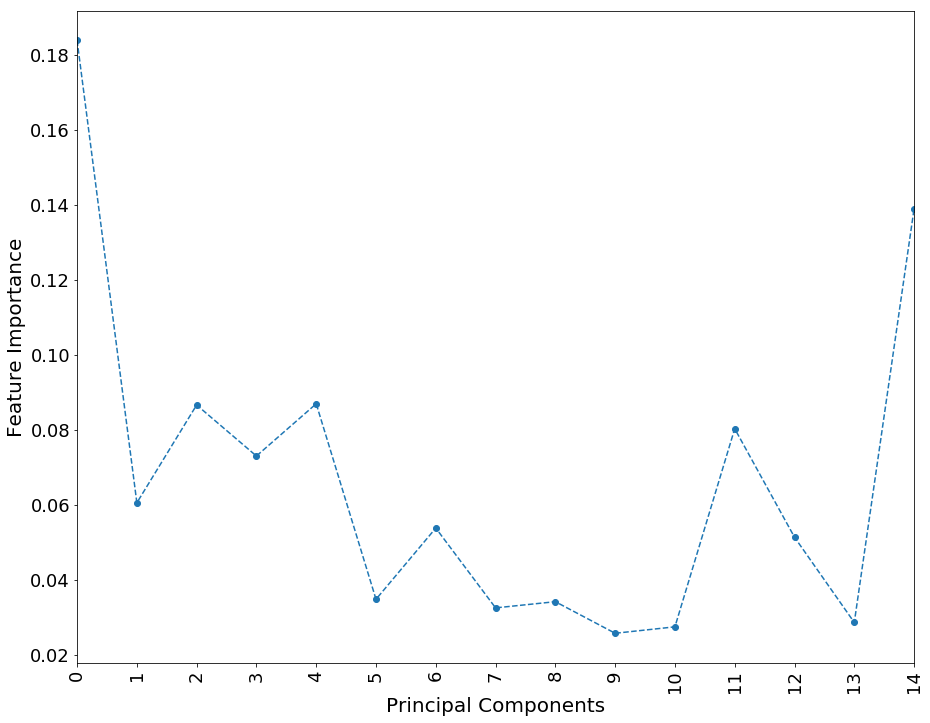

In [419]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [420]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            1.5           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           0  21       21
__all__    44  21       65

Accuracy of the  AdaBoostClassifier  model for test data is: 0.607142857143

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          16  5       21
1           6  1        7
__all__    22  6       28

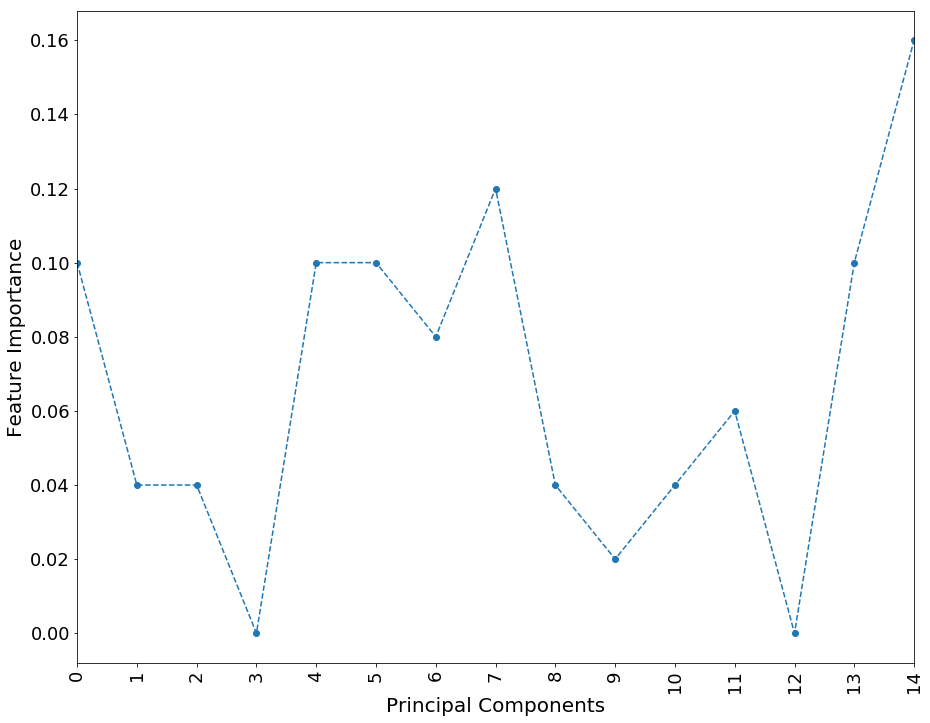

In [421]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=0.5,n_estimators=50,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_70_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_70_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [422]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1            2                 3  \
index  criterion  learning_rate         loss  min_samples_leaf   
0            mse           0.03  exponential                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.846153846154

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          44   0       44
1          10  11       21
__all__    54  11       65

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.785714285714

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           6  1        7
__all__    27  1       28

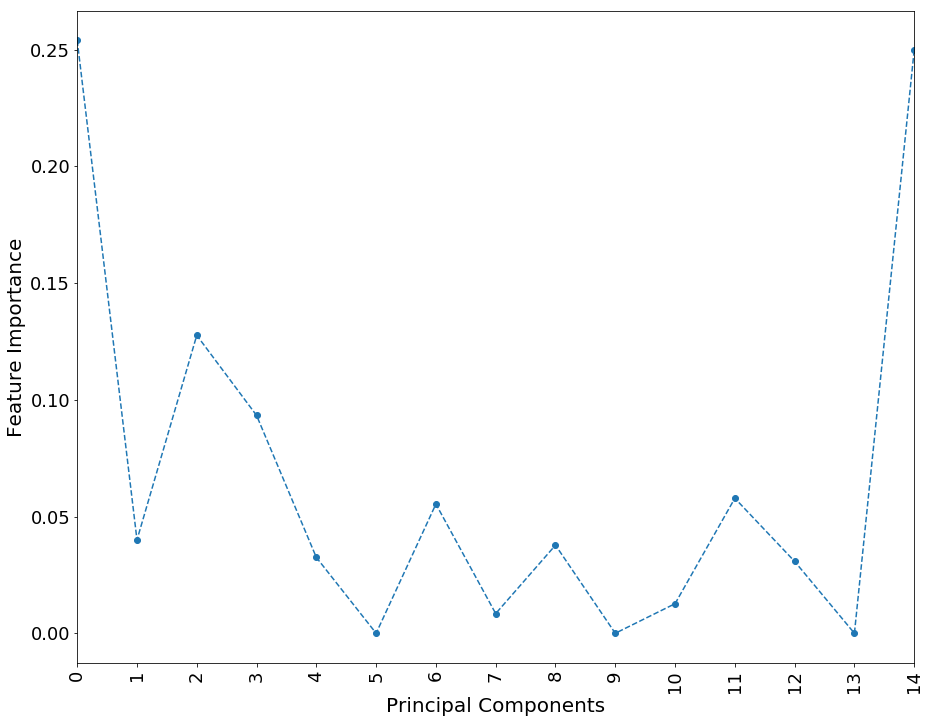

In [424]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='exponential',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_70_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_70_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [425]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.676923076923

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          44  0       44
1          21  0       21
__all__    65  0       65

Accuracy of the  Extra Decision Tree  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [429]:

ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

In [430]:
%%capture
table_70_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_70_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])

#### Bagging

In [432]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.923076923077

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           5  16       21
__all__    49  16       65

Accuracy of the  Bagging  model for test data is: 0.75

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [435]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))

In [436]:
%%capture
table_70_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_70_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])

#### Weighted Voting Classifier

In [437]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.907692307692


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           6  15       21
__all__    50  15       65

The test accuracy is: 0.75


Predicted   0  1  __all__
Actual                   
0          21  0       21
1           7  0        7
__all__    28  0       28

In [440]:
%%capture
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_70_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_70_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [441]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          44   0       44
1           0  21       21
__all__    44  21       65

The accuracy of the model on test data is: 0.535714285714


Predicted   0  1  __all__
Actual                   
0          14  7       21
1           6  1        7
__all__    20  8       28

In [442]:
table_70_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_70_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [443]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.2min finished


The accuracy of the model on training data is: 0.876923076923


In [444]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          40   4       44
1           4  17       21
__all__    44  21       65

The accuracy of the model on test data is: 0.642857142857


Predicted   0  1  __all__
Actual                   
0          18  3       21
1           7  0        7
__all__    25  3       28

In [445]:
table_70_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_70_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [446]:
table_70_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_70_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_70_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_70_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.D.D' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [447]:
print("Comparision Table for Training Accuracies:")
display(table_70_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy         TP         TN         FP  \
index                                                                   
KNeighborsClassifier        0.676923  29.784615  14.215385  14.215385   
LogisticRegression          0.769231  11.000000  39.000000   5.000000   
RandomForestClassifier      0.861538  13.000000  43.000000   1.000000   
AdaBoostClassifier          1.000000  21.000000  44.000000   0.000000   
GradientBoostingClassifier  0.846154  11.000000  44.000000   0.000000   
ExtraTreeClassifier         0.676923  29.784615  14.215385  14.215385   
BaggingClassifier           0.923077  16.000000  44.000000   0.000000   
VotingClassifier            0.907692  15.000000  44.000000   0.000000   
Neural Network-1            1.000000  21.000000  44.000000   0.000000   
Neural-Network-2            0.876923  17.000000  40.000000   4.000000   

                                   FN       FPR       FNR  
index                                                      
KNeighborsClassifier         6.784615  0.323077  0.676923  
LogisticRegression          10.000000  0.476190  0.113636  
RandomForestClassifier       8.000000  0.380952  0.022727  
AdaBoostClassifier           0.000000  0.000000  0.000000  
GradientBoostingClassifier  10.000000  0.476190  0.000000  
ExtraTreeClassifier          6.784615  0.323077  0.676923  
BaggingClassifier            5.000000  0.238095  0.000000  
VotingClassifier             6.000000  0.285714  0.000000  
Neural Network-1             0.000000  0.000000  0.000000  
Neural-Network-2             4.000000  0.190476  0.090909

In [448]:
print("Comparision Table for Test Accuracies:")
display(table_70_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy     TP     TN    FP    FN       FPR  \
index                                                                      
KNeighborsClassifier        0.750000  15.75   5.25  5.25  1.75  0.250000   
LogisticRegression          0.642857   0.00  18.00  3.00  7.00  1.000000   
RandomForestClassifier      0.750000  15.75   5.25  5.25  1.75  0.250000   
AdaBoostClassifier          0.642857   1.00  17.00  4.00  6.00  0.857143   
GradientBoostingClassifier  0.785714   1.00  21.00  0.00  6.00  0.857143   
ExtraTreeClassifier         0.750000  15.75   5.25  5.25  1.75  0.250000   
BaggingClassifier           0.750000  15.75   5.25  5.25  1.75  0.250000   
VotingClassifier            0.750000  15.75   5.25  5.25  1.75  0.250000   
Neural Network-1            0.535714   1.00  14.00  7.00  6.00  0.857143   
Neural-Network-2            0.642857   0.00  18.00  3.00  7.00  1.000000   

                                 FNR  
index                                 
KNeighborsClassifier        0.750000  
LogisticRegression          0.142857  
RandomForestClassifier      0.750000  
AdaBoostClassifier          0.190476  
GradientBoostingClassifier  0.000000  
ExtraTreeClassifier         0.750000  
BaggingClassifier           0.750000  
VotingClassifier            0.750000  
Neural Network-1            0.333333  
Neural-Network-2            0.142857

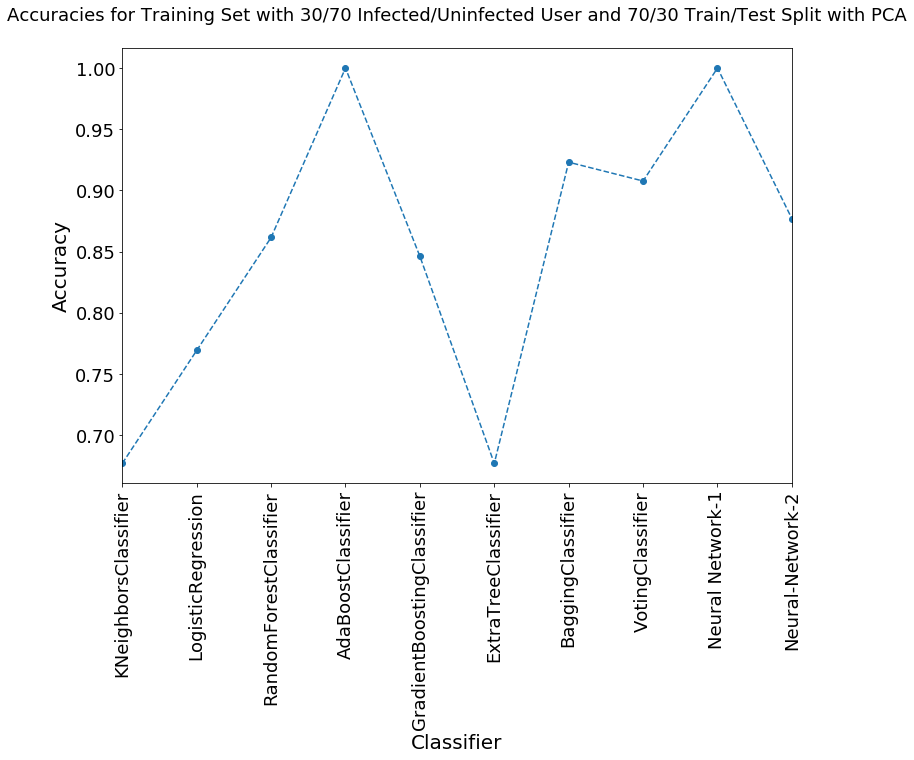

In [449]:
get_accuracy_plot(table_70_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

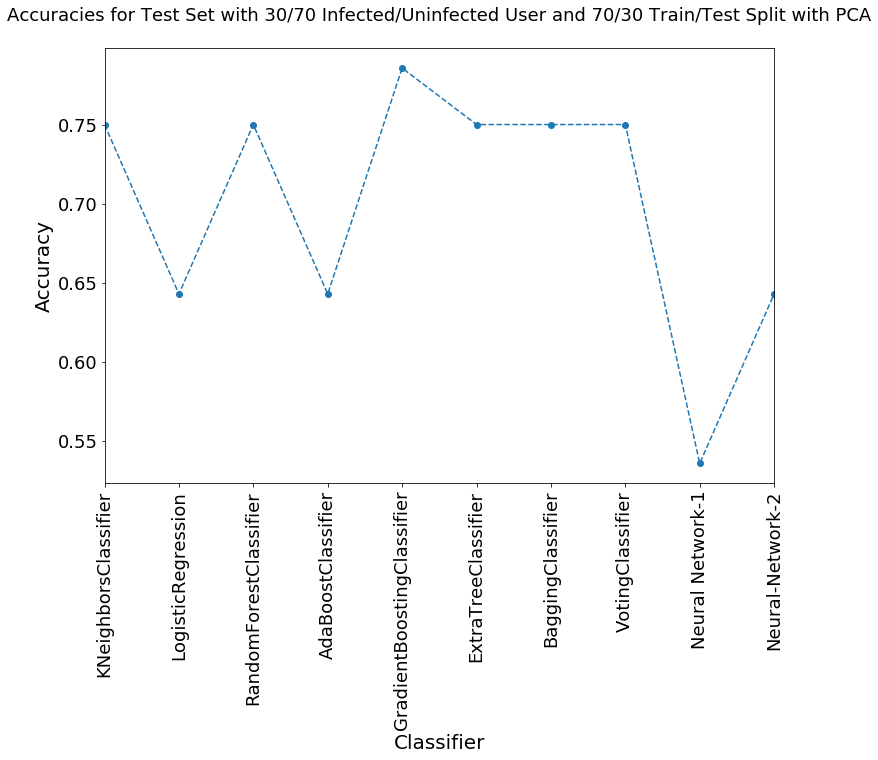

In [450]:
get_accuracy_plot(table_70_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 70/30 Train/Test Split with PCA')

<a id='2.E' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split</h3.</a>

In [457]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_X,Y,random_state=10,test_size=0.1)

The train/test split ratio is 90:10


In [458]:
table_90_75_train=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_75_test=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [459]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3        4
index  algorithm  leaf_size     metric  n_neighbors  weights
0           auto          2  euclidean           30  uniform


Accuracy of the  KNN  model for training data is: 0.698795180723

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          58  0       58
1          25  0       25
__all__    83  0       83

Accuracy of the  KNN  model for test data is: 0.7

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           7  0        7
1           3  0        3
__all__    10  0       10

In [461]:
%%capture
knn=KNeighborsClassifier(n_neighbors=30,weights='uniform',leaf_size=2,metric='euclidean',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_75_train.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_75_test.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [462]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.5  False           True                0.7       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.795180722892

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          53   5       58
1          12  13       25
__all__    65  18       83

Accuracy of the  Logistic  model for test data is: 0.9

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          0  3        3
__all__    6  4       10

In [463]:
logistic=LogisticRegression(C=0.5,dual=False,fit_intercept=True,intercept_scaling=0.7,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=0.1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_75_train.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_75_test.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [464]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.819277108434


Predicted   0   1  __all__
Actual                    
0          56   2       58
1          13  12       25
__all__    69  14       83

Accuracy of Random Forest Model on test data is: 0.8


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          2  1        3
__all__    9  1       10

In [465]:
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_75_train.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_75_test.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

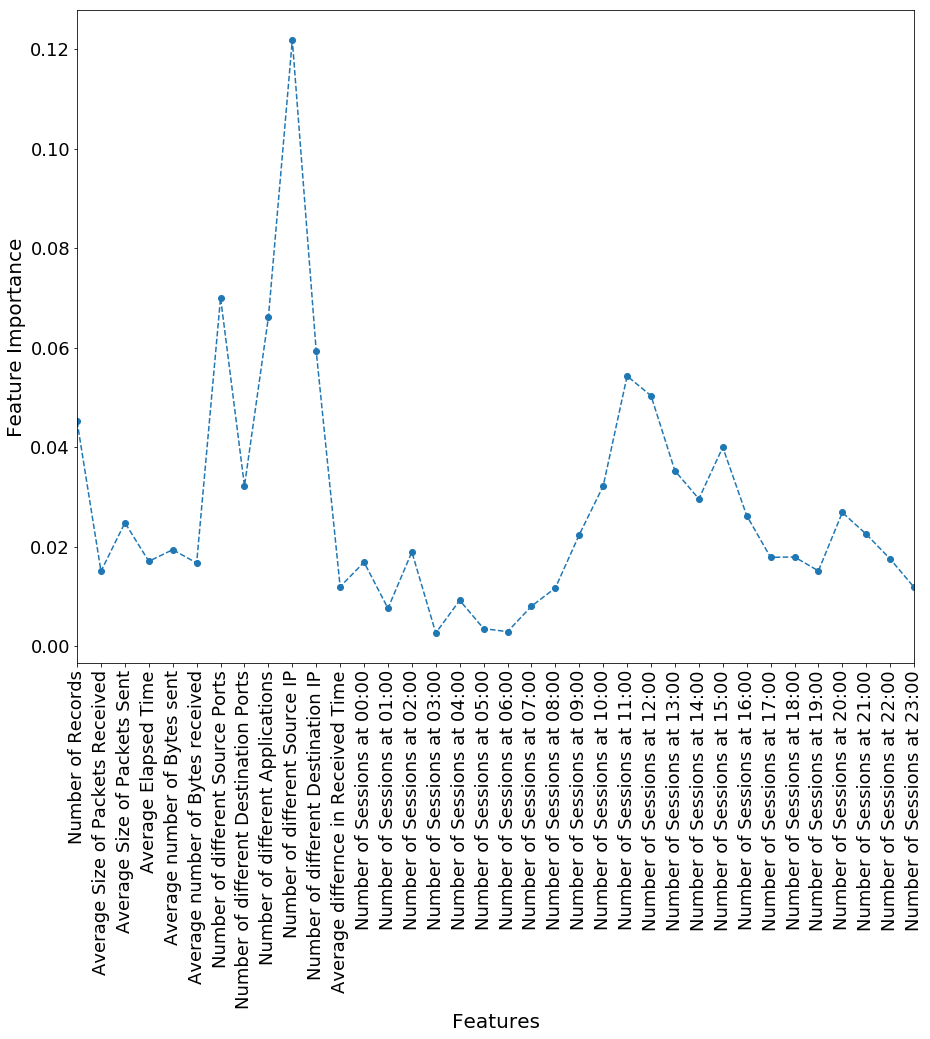

In [466]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [467]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0          SAMME              1           100             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          58   0       58
1           0  25       25
__all__    58  25       83

Accuracy of the  AdaBoostClassifier  model for test data is: 0.9

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          1  2        3
__all__    8  2       10

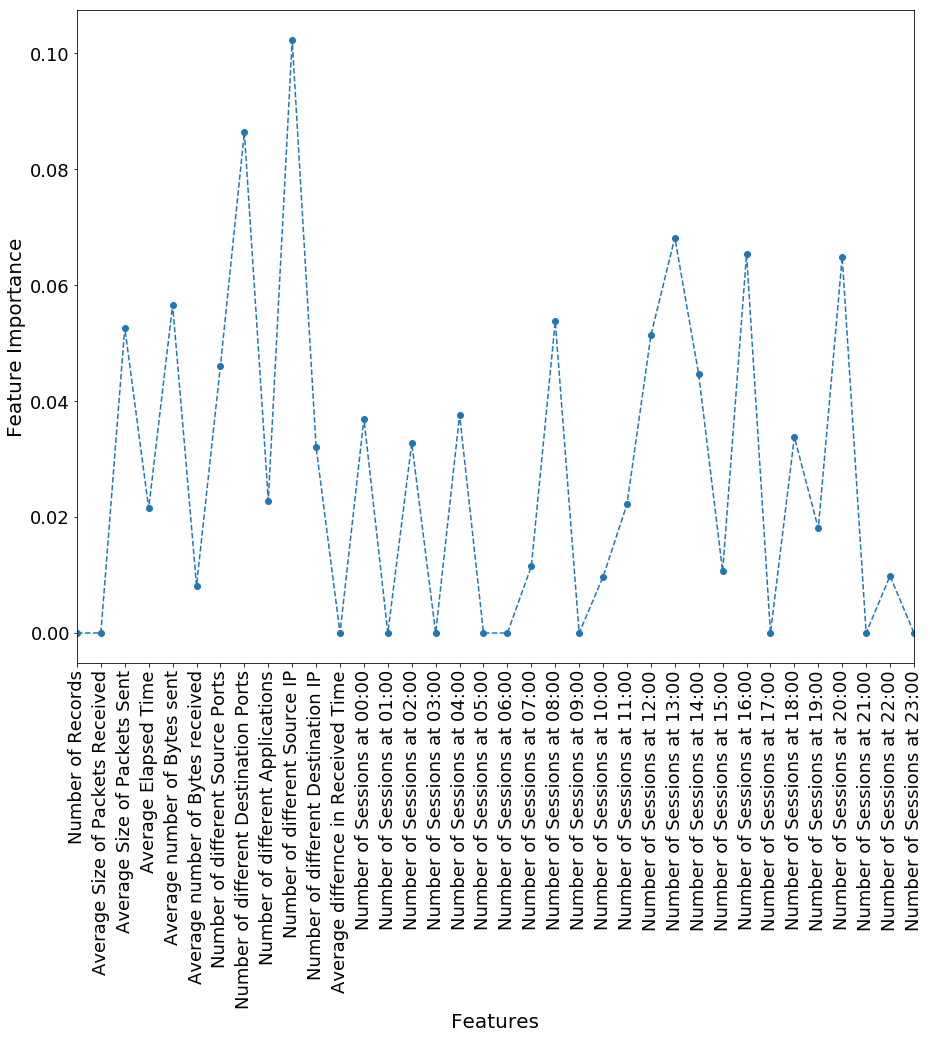

In [468]:
ada=AdaBoostClassifier(algorithm='SAMME',learning_rate=1,n_estimators=100,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_75_train.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_75_test.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [469]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1            50             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.927710843373

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          57   1       58
1           5  20       25
__all__    62  21       83

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.9

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          1  2        3
__all__    8  2       10

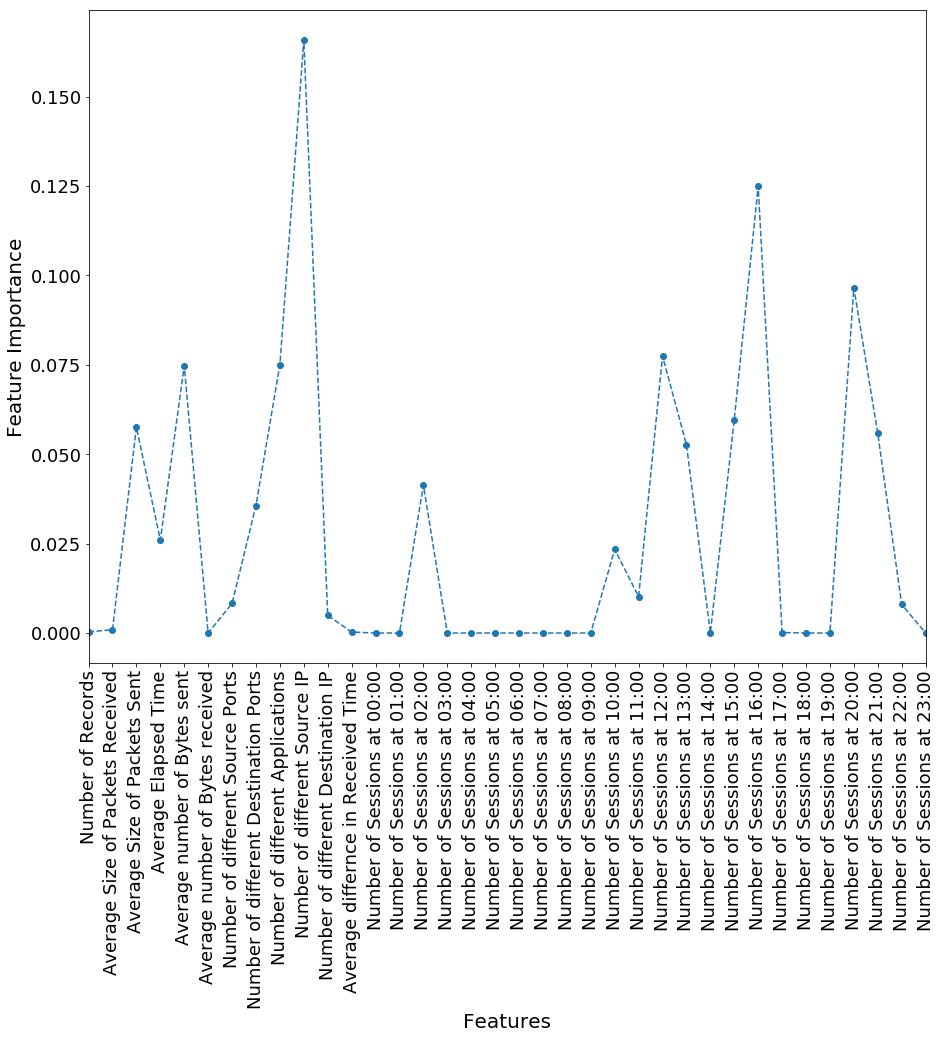

In [470]:
gbc=GradientBoostingClassifier(n_estimators=50,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_75_train.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_75_test.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 35])
plt.xticks(np.arange(36),a.columns.get_values(),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [471]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                    0.1   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  2             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.698795180723

Confusion Matrix for Training data is:


Predicted   0  1  __all__
Actual                   
0          58  0       58
1          25  0       25
__all__    83  0       83

Accuracy of the  Extra Decision Tree  model for test data is: 0.7

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           7  0        7
1           3  0        3
__all__    10  0       10

In [473]:
%%capture
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.1,min_samples_leaf=2,
                            min_samples_split=2,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_75_train.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_75_test.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])

#### Bagging

In [475]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.879518072289

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          58   0       58
1          10  15       25
__all__    68  15       83

Accuracy of the  Bagging  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          2  1        3
__all__    9  1       10

In [476]:
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_75_train.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_75_test.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [477]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.855421686747


Predicted   0   1  __all__
Actual                    
0          58   0       58
1          12  13       25
__all__    70  13       83

The test accuracy is: 0.8


Predicted  0  1  __all__
Actual                  
0          7  0        7
1          2  1        3
__all__    9  1       10

In [478]:
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_75_train.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_75_test.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [479]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          58   0       58
1           0  25       25
__all__    58  25       83

The accuracy of the model on test data is: 0.6


Predicted  0  1  __all__
Actual                  
0          5  2        7
1          2  1        3
__all__    7  3       10

In [480]:
table_90_75_train.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_75_test.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [481]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=36))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.4min finished


The accuracy of the model on training data is: 0.831325301205


In [482]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          56   2       58
1          12  13       25
__all__    68  15       83

The accuracy of the model on test data is: 0.7


Predicted  0  1  __all__
Actual                  
0          6  1        7
1          2  1        3
__all__    8  2       10

In [483]:
table_90_75_train.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_75_test.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [484]:
table_90_75_train['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_75_test['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_75_test.set_index(['index'],drop=True,inplace=True)
table_90_75_train.set_index(['index'],drop=True,inplace=True)

<a id='2.E.E' style="text-decoration : none; color : #000000;"><h3>Comparision Table and Graphs </h3></a>

In [485]:
print("Comparision Table for Training Accuracies:")
display(table_90_75_train)

Comparision Table for Training Accuracies:


accuracy        TP        TN        FP        FN  \
index                                                                          
KNeighborsClassifier        0.698795  40.53012  17.46988  17.46988   7.53012   
LogisticRegression          0.771084  13.00000  51.00000   7.00000  12.00000   
RandomForestClassifier      0.819277  12.00000  56.00000   2.00000  13.00000   
AdaBoostClassifier          1.000000  25.00000  58.00000   0.00000   0.00000   
GradientBoostingClassifier  0.927711  20.00000  57.00000   1.00000   5.00000   
ExtraTreeClassifier         0.698795  40.53012  17.46988  17.46988   7.53012   
BaggingClassifier           0.879518  15.00000  58.00000   0.00000  10.00000   
VotingClassifier            0.855422  13.00000  58.00000   0.00000  12.00000   
Neural Network-1            1.000000  25.00000  58.00000   0.00000   0.00000   
Neural-Network-2            0.831325  13.00000  56.00000   2.00000  12.00000   

                                 FPR       FNR  
index                                           
KNeighborsClassifier        0.301205  0.698795  
LogisticRegression          0.480000  0.120690  
RandomForestClassifier      0.520000  0.034483  
AdaBoostClassifier          0.000000  0.000000  
GradientBoostingClassifier  0.200000  0.017241  
ExtraTreeClassifier         0.301205  0.698795  
BaggingClassifier           0.400000  0.000000  
VotingClassifier            0.480000  0.000000  
Neural Network-1            0.000000  0.000000  
Neural-Network-2            0.480000  0.034483

In [486]:
print("Comparision Table for Test Accuracies:")
display(table_90_75_test)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN       FPR       FNR
index                                                                       
KNeighborsClassifier             0.7  4.9  2.1  2.1  0.9  0.300000  0.700000
LogisticRegression               0.8  2.0  6.0  1.0  1.0  0.333333  0.142857
RandomForestClassifier           0.8  1.0  7.0  0.0  2.0  0.666667  0.000000
AdaBoostClassifier               0.9  2.0  7.0  0.0  1.0  0.333333  0.000000
GradientBoostingClassifier       0.9  2.0  7.0  0.0  1.0  0.333333  0.000000
ExtraTreeClassifier              0.7  4.9  2.1  2.1  0.9  0.300000  0.700000
BaggingClassifier                0.8  1.0  7.0  0.0  2.0  0.666667  0.000000
VotingClassifier                 0.8  1.0  7.0  0.0  2.0  0.666667  0.000000
Neural Network-1                 0.6  1.0  5.0  2.0  2.0  0.666667  0.285714
Neural-Network-2                 0.7  1.0  6.0  1.0  2.0  0.666667  0.142857

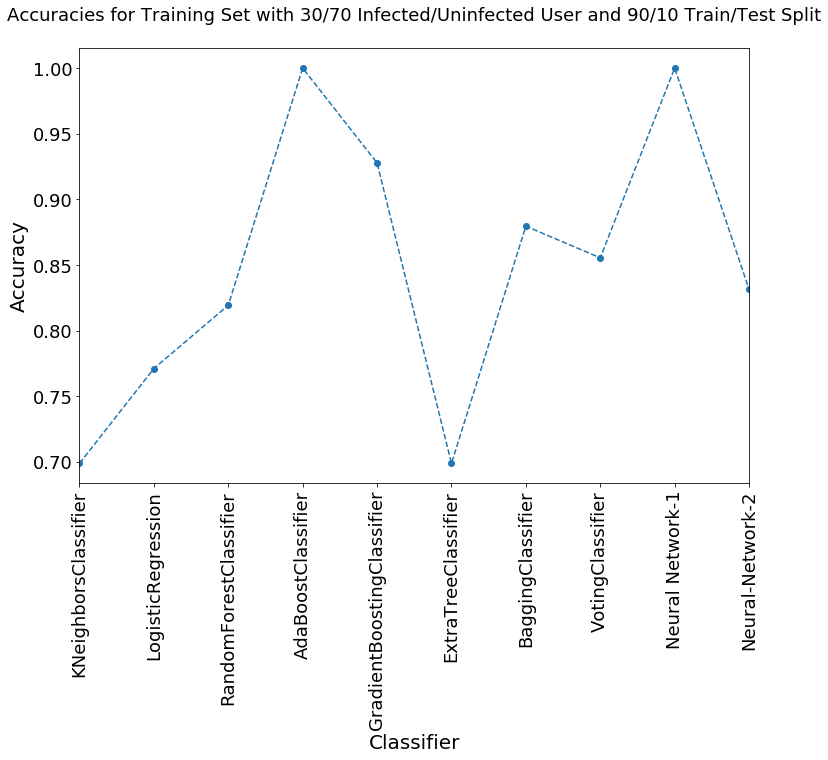

In [487]:
get_accuracy_plot(table_90_75_train,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split')

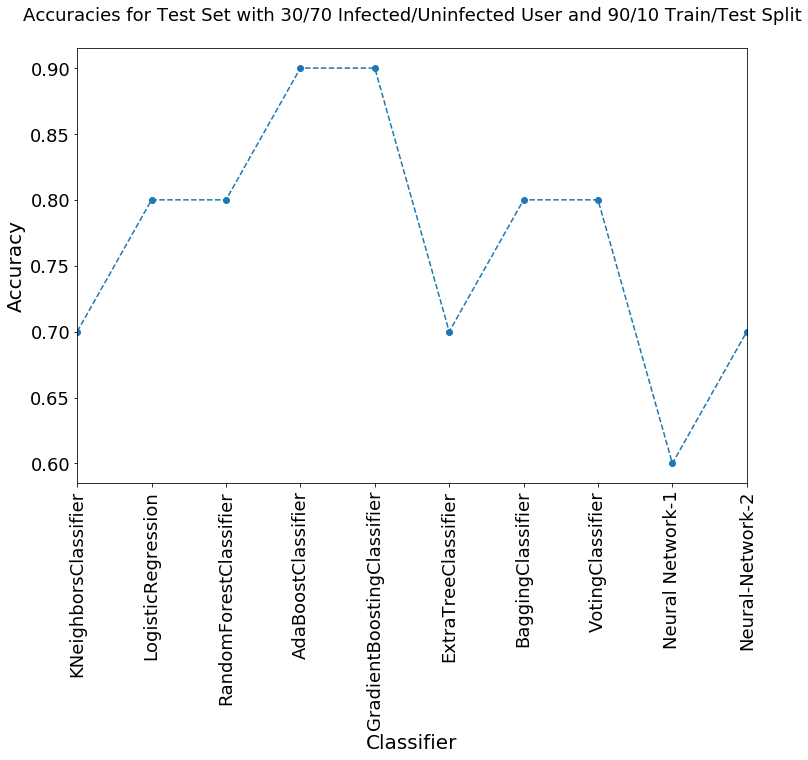

In [488]:
get_accuracy_plot(table_90_75_test,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split')

<a id='2.F' style="text-decoration : none; color : #000000;"><h3>90:10 Train/Test Split with PCA</h3.</a>

In [489]:
### With the PCA
pca=PCA(n_components=15,whiten=True,random_state=0)
X_pca_13=pca.fit_transform(scaled_X)
print("Variance explained using 15 components is:",sum(pca.explained_variance_ratio_))

print("The train/test split ratio is 90:10")
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca_13,Y,random_state=0,test_size=0.1)

Variance explained using 15 components is: 0.946789345141
The train/test split ratio is 90:10


In [490]:
table_90_75_train_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])
table_90_75_test_PCA=pd.DataFrame(columns=['accuracy','TP','TN','FP','FN','FPR','FNR'])

#### KNN

In [491]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
parameters = dict(n_neighbors=[20,30],weights=['uniform','distance'], algorithm=['auto','ball_tree'],
                  leaf_size=[2,5,10,15],
                  metric=['euclidean','manhattan','chebyshev'])
knn_model=grid(knn,parameters,X_train,Y_train,X_test,Y_test,"KNN")

Best Parameters are :


0          1          2            3         4
index  algorithm  leaf_size     metric  n_neighbors   weights
0           auto          2  chebyshev           20  distance


Accuracy of the  KNN  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          56   0       56
1           0  27       27
__all__    56  27       83

Accuracy of the  KNN  model for test data is: 0.9

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           9  0        9
1           1  0        1
__all__    10  0       10

In [493]:
%%capture
knn=KNeighborsClassifier(n_neighbors=20,weights='distance',leaf_size=2,metric='chebyshev',algorithm='auto')
knn.fit(X_train,Y_train)

cm_knn_train=ConfusionMatrix(Y_train,knn.predict(X_train))
cm_knn_test=ConfusionMatrix(Y_test,knn.predict(X_test))

table_90_75_train_PCA.loc[0]=([accuracy_score(Y_train,knn.predict(X_train)),cm_knn_train.TP,cm_knn_train.TN,
                           cm_knn_train.FP,cm_knn_train.FN,cm_knn_train.FNR,cm_knn_train.FPR])
table_90_75_test_PCA.loc[0]=([accuracy_score(Y_test,knn.predict(X_test)),cm_knn_test.TP,cm_knn_test.TN,
                          cm_knn_test.FP,cm_knn_test.FN,cm_knn_test.FNR,cm_knn_test.FPR])

#### Logistic

In [494]:
logistic=LogisticRegression()
parameters = dict(penalty=['l2'],dual=[False],C=[0.5,0.3,0.7],fit_intercept=[True,False],
                  intercept_scaling=[0.5,0.7],max_iter=[50,100],solver=['newton-cg','lbfgs','sag'],
                  tol=[1e-5,1e-3,1e-1],multi_class=['ovr','multinomial']
                 )
log_model=grid(logistic,parameters,X_train,Y_train,X_test,Y_test,"Logistic")

Best Parameters are :


0      1              2                  3         4            5  \
index    C   dual  fit_intercept  intercept_scaling  max_iter  multi_class   
0      0.3  False           True                0.5       100          ovr   

             6       7    8  
index  penalty  solver  tol  
0           l2     sag  0.1


Accuracy of the  Logistic  model for training data is: 0.746987951807

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          49   7       56
1          14  13       27
__all__    63  20       83

Accuracy of the  Logistic  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          8  1        9
1          1  0        1
__all__    9  1       10

In [495]:
logistic=LogisticRegression(C=0.7,dual=False,fit_intercept=True,intercept_scaling=0.5,max_iter=100,multi_class='ovr',penalty='l2',solver='sag',tol=1e-1)
logistic.fit(X_train,Y_train)

cm_logistic_train=ConfusionMatrix(Y_train,logistic.predict(X_train))
cm_logistic_test=ConfusionMatrix(Y_test,logistic.predict(X_test))

table_90_75_train_PCA.loc[1]=([accuracy_score(Y_train,logistic.predict(X_train)),cm_logistic_train.TP,cm_logistic_train.TN,
                           cm_logistic_train.FP,cm_logistic_train.FN,cm_logistic_train.FNR,cm_logistic_train.FPR])
table_90_75_test_PCA.loc[1]=([accuracy_score(Y_test,logistic.predict(X_test)),cm_logistic_test.TP,cm_logistic_test.TN,
                          cm_logistic_test.FP,cm_logistic_test.FN,cm_logistic_test.FNR,cm_logistic_test.FPR])


#### Random Forest

In [496]:
rf=RandomForestClassifier(criterion='entropy',max_depth=10,max_features='auto',max_leaf_nodes=5,min_impurity_decrease=1e-3,
                         min_samples_leaf=0.1,min_samples_split=0.08,n_estimators=1000,oob_score=False,random_state=0)
rf.fit(X_train,Y_train)
print("Accuracy of Random Forest Model on training data is:",rf.score(X_train,Y_train))
get_cm(rf,X_train,Y_train)
print("Accuracy of Random Forest Model on test data is:",accuracy_score(Y_test,rf.predict(X_test)))
get_cm(rf,X_test,Y_test)

Accuracy of Random Forest Model on training data is: 0.855421686747


Predicted   0   1  __all__
Actual                    
0          55   1       56
1          11  16       27
__all__    66  17       83

Accuracy of Random Forest Model on test data is: 0.9


Predicted   0  1  __all__
Actual                   
0           9  0        9
1           1  0        1
__all__    10  0       10

In [498]:
%%capture
cm_rf_train=ConfusionMatrix(Y_train,rf.predict(X_train))
cm_rf_test=ConfusionMatrix(Y_test,rf.predict(X_test))

table_90_75_train_PCA.loc[2]=([accuracy_score(Y_train,rf.predict(X_train)),cm_rf_train.TP,cm_rf_train.TN,cm_rf_train.FP,cm_rf_train.FN,
                cm_rf_train.FNR,cm_rf_train.FPR])
table_90_75_test_PCA.loc[2]=([accuracy_score(Y_test,rf.predict(X_test)),cm_rf_test.TP,cm_rf_test.TN,cm_rf_test.FP,cm_rf_test.FN,
                cm_rf_test.FNR,cm_rf_test.FPR])

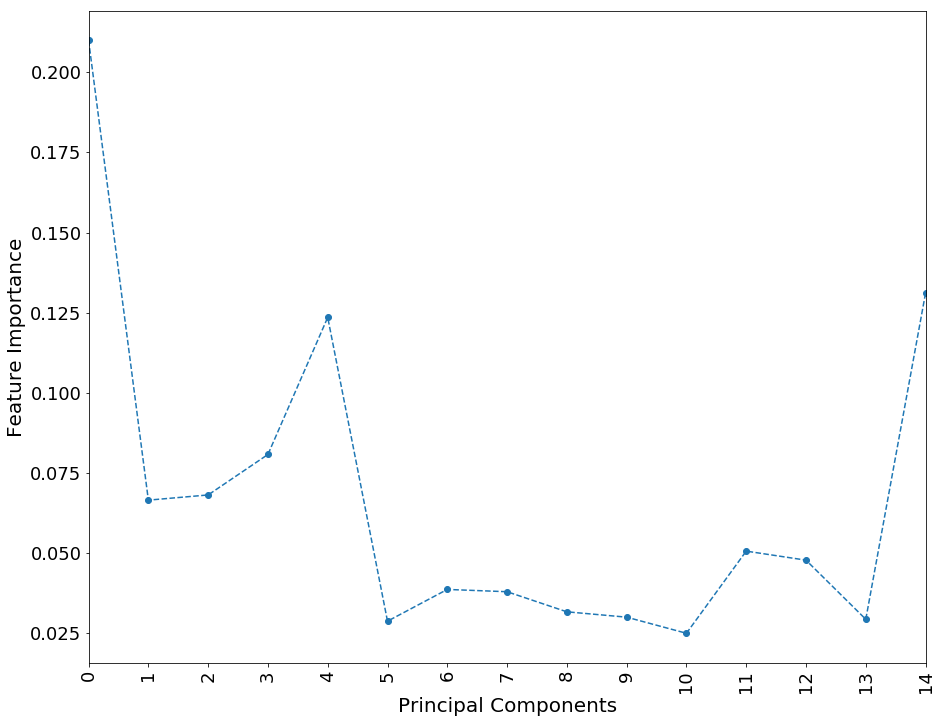

In [499]:
a=z.iloc[:,z.columns!='Target']
fig = plt.figure(figsize=(15, 12))
plt.plot(rf.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### AdaBoost

In [500]:
ada=AdaBoostClassifier()
parameters=dict(n_estimators=[50,100,150],learning_rate=[0.5,1,1.5],
                 algorithm=['SAMME','SAMME.R'],random_state=[0]
                )

ada_model=grid(ada,parameters,X_train,Y_train,X_test,Y_test,"AdaBoostClassifier")

Best Parameters are :


0              1             2             3
index  algorithm  learning_rate  n_estimators  random_state
0        SAMME.R            1.5           150             0


Accuracy of the  AdaBoostClassifier  model for training data is: 1.0

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          56   0       56
1           0  27       27
__all__    56  27       83

Accuracy of the  AdaBoostClassifier  model for test data is: 0.6

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          1  0        1
__all__    7  3       10

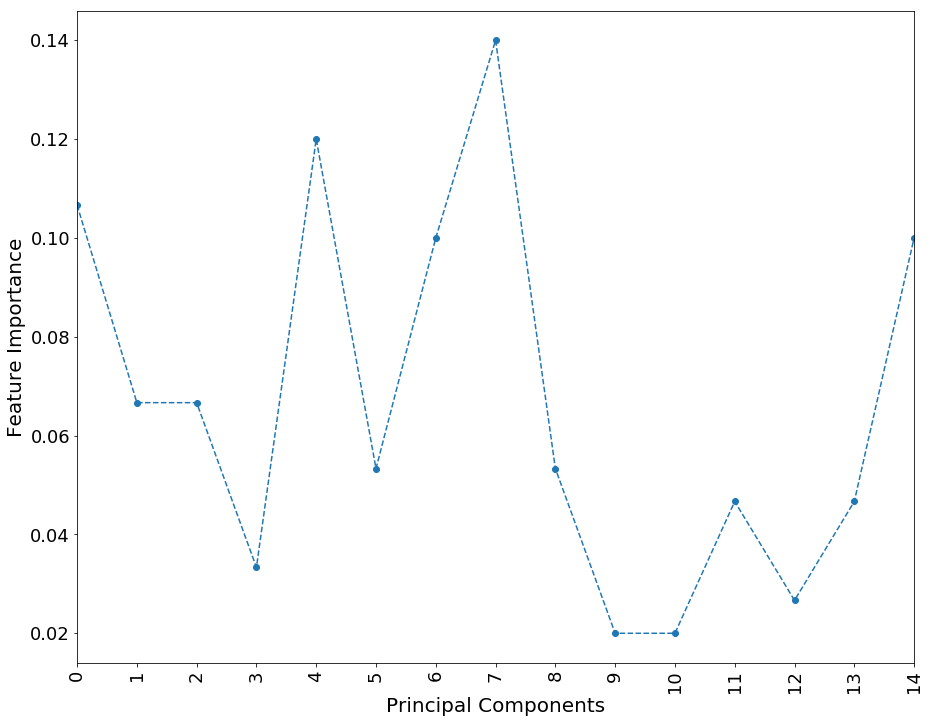

In [502]:
ada=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.5,n_estimators=150,random_state=0)
ada.fit(X_train,Y_train)

cm_ada_train=ConfusionMatrix(Y_train,ada.predict(X_train))
cm_ada_test=ConfusionMatrix(Y_test,ada.predict(X_test))

table_90_75_train_PCA.loc[3]=([accuracy_score(Y_train,ada.predict(X_train)),cm_ada_train.TP,cm_ada_train.TN,
                           cm_ada_train.FP,cm_ada_train.FN,cm_ada_train.FNR,cm_ada_train.FPR])
table_90_75_test_PCA.loc[3]=([accuracy_score(Y_test,ada.predict(X_test)),cm_ada_test.TP,cm_ada_test.TN,
                          cm_ada_test.FP,cm_ada_test.FN,cm_ada_test.FNR,cm_ada_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(ada.feature_importances_, '--o')
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Gradient Boosting Classifier

In [503]:
gbc=GradientBoostingClassifier()
parameters=dict(loss=['deviance','exponential'], learning_rate=[0.03],
                n_estimators=[50,100,200], criterion=['mse'],
                min_samples_split=[0.1],min_samples_leaf=[10,15],
                random_state=[0]
                )
gbc_model=grid(gbc,parameters,X_train,Y_train,X_test,Y_test,"Gradient Boosting Classifier")

Best Parameters are :


0              1         2                 3  \
index  criterion  learning_rate      loss  min_samples_leaf   
0            mse           0.03  deviance                15   

                       4             5             6  
index  min_samples_split  n_estimators  random_state  
0                    0.1           100             0


Accuracy of the  Gradient Boosting Classifier  model for training data is: 0.963855421687

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          55   1       56
1           2  25       27
__all__    57  26       83

Accuracy of the  Gradient Boosting Classifier  model for test data is: 0.8

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          8  1        9
1          1  0        1
__all__    9  1       10

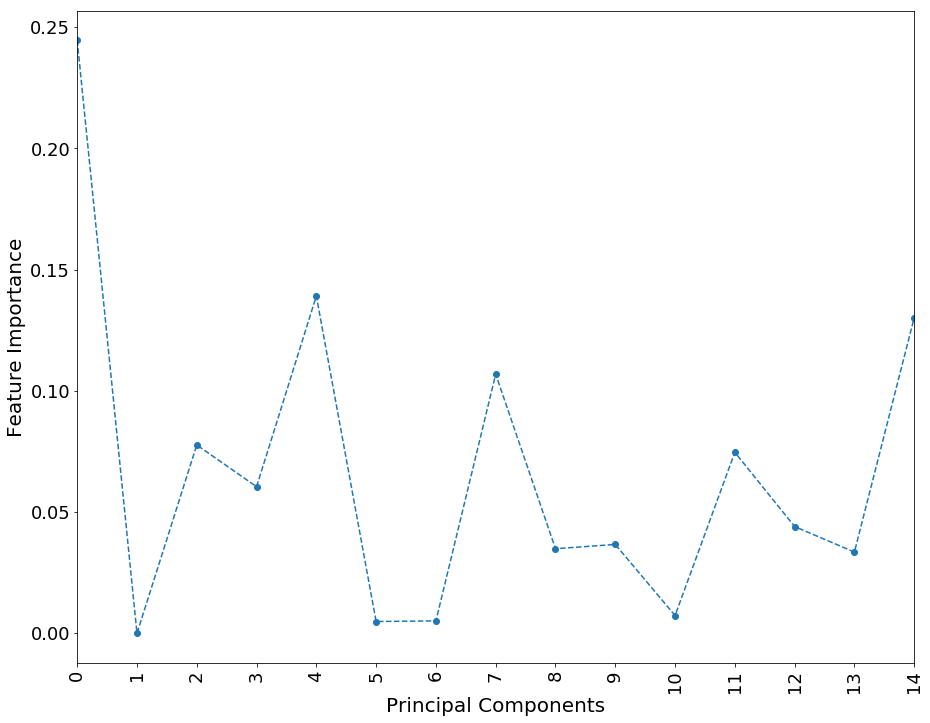

In [504]:
gbc=GradientBoostingClassifier(n_estimators=100,min_samples_leaf=15,min_samples_split=0.1,random_state=0,loss='deviance',criterion='mse',learning_rate=0.03)
gbc.fit(X_train,Y_train)

cm_gbc_train=ConfusionMatrix(Y_train,gbc.predict(X_train))
cm_gbc_test=ConfusionMatrix(Y_test,gbc.predict(X_test))

table_90_75_train_PCA.loc[4]=([accuracy_score(Y_train,gbc.predict(X_train)),cm_gbc_train.TP,cm_gbc_train.TN,
                           cm_gbc_train.FP,cm_gbc_train.FN,cm_gbc_train.FNR,cm_gbc_train.FPR])
table_90_75_test_PCA.loc[4]=([accuracy_score(Y_test,gbc.predict(X_test)),cm_gbc_test.TP,cm_gbc_test.TN,
                          cm_gbc_test.FP,cm_gbc_test.FN,cm_gbc_test.FNR,cm_gbc_test.FPR])

fig = plt.figure(figsize=(15, 12))
plt.plot(gbc.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Extra Tree Classifier

In [505]:
ext_tree=ExtraTreeClassifier()
parameters=dict(criterion=['gini','entropy'],splitter=['best','random'],max_features=['auto','sqrt'],max_depth=[10,20,30],
               min_samples_split=[2,3,5],min_samples_leaf=[2,3,5],random_state=[0],min_impurity_decrease=[1e-1,1e-3]
               )
ext_tree_model=grid(ext_tree,parameters,X_train,Y_train,X_test,Y_test,"Extra Decision Tree")

Best Parameters are :


0          1             2                      3  \
index  criterion  max_depth  max_features  min_impurity_decrease   
0           gini         10          auto                  0.001   

                      4                  5             6         7  
index  min_samples_leaf  min_samples_split  random_state  splitter  
0                     2                  5             0      best


Accuracy of the  Extra Decision Tree  model for training data is: 0.963855421687

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          55   1       56
1           2  25       27
__all__    57  26       83

Accuracy of the  Extra Decision Tree  model for test data is: 0.7

Confusion Matrix for test data is:


Predicted  0  1  __all__
Actual                  
0          7  2        9
1          1  0        1
__all__    8  2       10

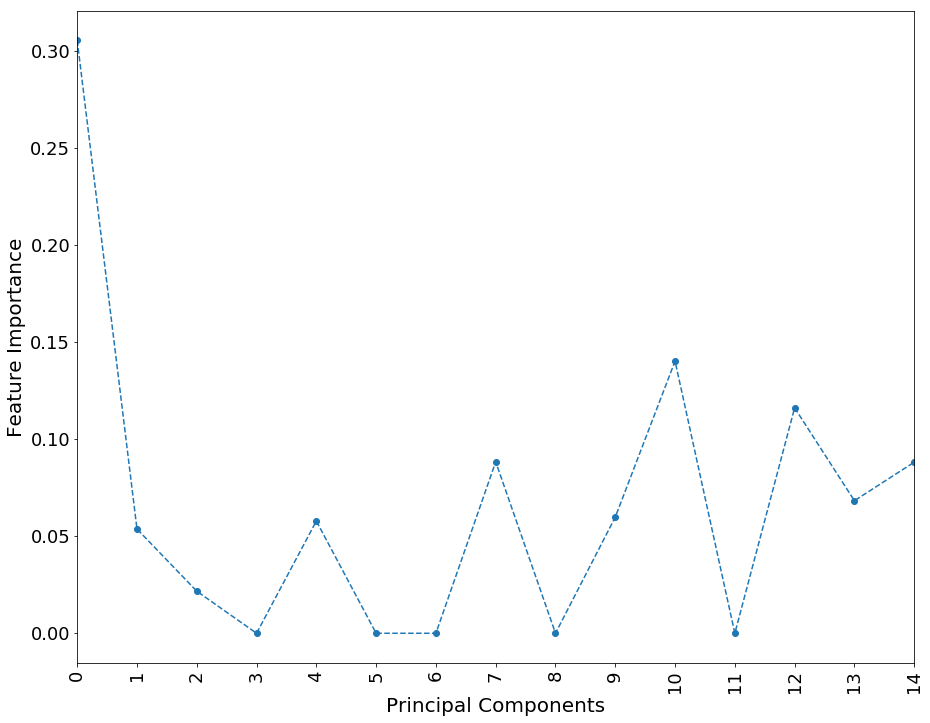

In [508]:
ext_tree=ExtraTreeClassifier(criterion='gini',max_depth=10,max_features='auto',min_impurity_decrease=0.001,min_samples_leaf=2,
                            min_samples_split=5,random_state=0,splitter='best')
ext_tree.fit(X_train,Y_train)

cm_ext_tree_train=ConfusionMatrix(Y_train,ext_tree.predict(X_train))
cm_ext_tree_test=ConfusionMatrix(Y_test,ext_tree.predict(X_test))

table_90_75_train_PCA.loc[5]=([accuracy_score(Y_train,ext_tree.predict(X_train)),cm_ext_tree_train.TP,cm_ext_tree_train.TN,
                           cm_ext_tree_train.FP,cm_ext_tree_train.FN,cm_ext_tree_train.FNR,cm_ext_tree_train.FPR])
table_90_75_test_PCA.loc[5]=([accuracy_score(Y_test,ext_tree.predict(X_test)),cm_ext_tree_test.TP,cm_ext_tree_test.TN,
                          cm_ext_tree_test.FP,cm_ext_tree_test.FN,cm_ext_tree_test.FNR,cm_ext_tree_test.FPR])


fig = plt.figure(figsize=(15, 12))
plt.plot(ext_tree.feature_importances_, '--o',)
plt.ylabel('Feature Importance', fontsize=20)
plt.xlabel('Principal Components', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0, 14])
plt.xticks(np.arange(15),np.arange(15),rotation=90)
plt.legend(loc='upper right', fontsize=18)
plt.show()

#### Bagging

In [509]:
bagging=BaggingClassifier()
parameters=dict(n_estimators=[1000], max_samples=[0.4,0.3],max_features=[0.4,0.3],
                bootstrap=[True],bootstrap_features=[True],oob_score=[True],random_state=[0]
               )

bagging_model=grid(bagging,parameters,X_train,Y_train,X_test,Y_test,"Bagging")

Best Parameters are :


0                   1             2            3             4  \
index  bootstrap  bootstrap_features  max_features  max_samples  n_estimators   
0           True                True           0.3          0.3          1000   

               5             6  
index  oob_score  random_state  
0           True             0


Accuracy of the  Bagging  model for training data is: 0.939759036145

Confusion Matrix for Training data is:


Predicted   0   1  __all__
Actual                    
0          56   0       56
1           5  22       27
__all__    61  22       83

Accuracy of the  Bagging  model for test data is: 0.9

Confusion Matrix for test data is:


Predicted   0  1  __all__
Actual                   
0           9  0        9
1           1  0        1
__all__    10  0       10

In [511]:
%%capture
bagging=BaggingClassifier(bootstrap=True,bootstrap_features=True,max_features=0.3,max_samples=0.3,n_estimators=1000,oob_score=True,random_state=0)
bagging.fit(X_train,Y_train)


cm_bagging_train=ConfusionMatrix(Y_train,bagging.predict(X_train))
cm_bagging_test=ConfusionMatrix(Y_test,bagging.predict(X_test))


table_90_75_train_PCA.loc[6]=([accuracy_score(Y_train,bagging.predict(X_train)),cm_bagging_train.TP,cm_bagging_train.TN,cm_bagging_train.FP,cm_bagging_train.FN,
                cm_bagging_train.FNR,cm_bagging_train.FPR])
table_90_75_test_PCA.loc[6]=([accuracy_score(Y_test,bagging.predict(X_test)),cm_bagging_test.TP,cm_bagging_test.TN,cm_bagging_test.FP,cm_bagging_test.FN,
                cm_bagging_test.FNR,cm_bagging_test.FPR])


#### Weighted Voting Classifier

In [512]:
eclf = VotingClassifier(estimators=[('knn', knn), ('logistic', logistic),('rf',rf),('ada',ada),('gbc',gbc),
                                    ('ext_tree',ext_tree),('bagging',bagging)], voting='hard')

eclf.fit(X_train,Y_train.reshape(1,len(Y_train))[0])
print("The training accuracy is :",eclf.score(X_train,Y_train))
pred=eclf.predict(X_test)
get_cm(eclf,X_train,Y_train.reshape(1,len(Y_train))[0])
print("The test accuracy is:",accuracy_score(Y_test.reshape(1,len(Y_test))[0],pred))
ConfusionMatrix(Y_test.reshape(1,len(Y_test))[0],pred)

The training accuracy is : 0.975903614458


Predicted   0   1  __all__
Actual                    
0          56   0       56
1           2  25       27
__all__    58  25       83

The test accuracy is: 0.9


Predicted   0  1  __all__
Actual                   
0           9  0        9
1           1  0        1
__all__    10  0       10

In [514]:
%%capture
cm_voting_train=ConfusionMatrix(Y_train,eclf.predict(X_train))
cm_voting_test=ConfusionMatrix(Y_test,eclf.predict(X_test))


table_90_75_train_PCA.loc[7]=([accuracy_score(Y_train,eclf.predict(X_train)),cm_voting_train.TP,cm_voting_train.TN,
                           cm_voting_train.FP,cm_voting_train.FN,cm_voting_train.FNR,cm_voting_train.FPR])
table_90_75_test_PCA.loc[7]=([accuracy_score(Y_test,eclf.predict(X_test)),cm_voting_test.TP,cm_voting_test.TN,
                          cm_voting_test.FP,cm_voting_test.FN,cm_voting_test.FNR,cm_voting_test.FPR])

#### Neural Network using Keras -1

In [515]:
np.random.seed(0)
deep_learning=Sequential()
deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
deep_learning.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
deep_learning.fit(X_train,Y_train,batch_size=20,epochs=80,verbose=False)

print("The accuracy of the model on training data is:",deep_learning.evaluate(X_train,Y_train,verbose=False)[1])
cm_deep_train=ConfusionMatrix(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0])
cm_deep_test=ConfusionMatrix(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0])
display(cm_deep_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False)))
display(cm_deep_test)

The accuracy of the model on training data is: 1.0


Predicted   0   1  __all__
Actual                    
0          56   0       56
1           0  27       27
__all__    56  27       83

The accuracy of the model on test data is: 0.6


Predicted  0  1  __all__
Actual                  
0          6  3        9
1          1  0        1
__all__    7  3       10

In [516]:
table_90_75_train_PCA.loc[8]=([accuracy_score(Y_train,deep_learning.predict_classes(X_train,batch_size=1,verbose=False).reshape(1,len(X_train))[0]),
                           cm_deep_train.TP,cm_deep_train.TN,cm_deep_train.FP,cm_deep_train.FN,
                cm_deep_train.FNR,cm_deep_train.FPR])
table_90_75_test_PCA.loc[8]=([accuracy_score(Y_test,deep_learning.predict_classes(X_test,batch_size=1,verbose=False).reshape(1,len(X_test))[0]),
                          cm_deep_test.TP,cm_deep_test.TN,cm_deep_test.FP,cm_deep_test.FN,
                cm_deep_test.FNR,cm_deep_test.FPR])

#### Neural Network using Keras with Grid Search- 2 

In [517]:
def build_keras_classifier(optimizer):
    deep_learning=Sequential()
    deep_learning.add(Dense(units=64,activation='relu',use_bias=True,kernel_initializer='uniform',input_dim=15))
    deep_learning.add(Dense(units=128,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=256,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=512,activation='relu',use_bias=True,kernel_initializer='uniform'))
    deep_learning.add(Dense(units=1,activation='sigmoid',use_bias=True,kernel_initializer='uniform'))
    deep_learning.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return deep_learning
classifier=KerasClassifier(build_fn=build_keras_classifier,batch_size=20,nb_epoch=100,verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
parmas= {'batch_size':[20],'nb_epoch':[120],'optimizer':['adam','rmsprop']}
grid_search=GridSearchCV(estimator=classifier,param_grid=parmas,scoring='accuracy',cv=kfold,verbose=1)
grid_search.fit(X_train,Y_train)
print("The accuracy of the model on training data is:",grid_search.score(X_train,Y_train))

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.6min finished


The accuracy of the model on training data is: 0.855421686747


In [518]:
cm_deep_1_train=ConfusionMatrix(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0])
display(cm_deep_1_train)
print("The accuracy of the model on test data is:",accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]))
cm_deep_1_test=ConfusionMatrix(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0])
display(cm_deep_1_test)

Predicted   0   1  __all__
Actual                    
0          50   6       56
1           6  21       27
__all__    56  27       83

The accuracy of the model on test data is: 0.8


Predicted  0  1  __all__
Actual                  
0          8  1        9
1          1  0        1
__all__    9  1       10

In [519]:
table_90_75_train_PCA.loc[9]=([accuracy_score(Y_train,grid_search.predict(X_train).reshape(1,len(X_train))[0]),
                           cm_deep_1_train.TP,cm_deep_1_train.TN,cm_deep_1_train.FP,cm_deep_1_train.FN,
                cm_deep_1_train.FNR,cm_deep_1_train.FPR])
table_90_75_test_PCA.loc[9]=([accuracy_score(Y_test,grid_search.predict(X_test).reshape(1,len(X_test))[0]),
                          cm_deep_1_test.TP,cm_deep_1_test.TN,cm_deep_1_test.FP,cm_deep_1_test.FN,
                cm_deep_1_test.FNR,cm_deep_1_test.FPR])

In [520]:
table_90_75_train_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']
table_90_75_test_PCA['index']=['KNeighborsClassifier','LogisticRegression','RandomForestClassifier','AdaBoostClassifier',
                           'GradientBoostingClassifier','ExtraTreeClassifier','BaggingClassifier','VotingClassifier',
                            'Neural Network-1','Neural-Network-2']

table_90_75_test_PCA.set_index(['index'],drop=True,inplace=True)
table_90_75_train_PCA.set_index(['index'],drop=True,inplace=True)

<h3><a id='2.F.F' style="text-decoration : none; color : #000000;">Comparision Table with Graphs</a></h3>

In [521]:
print("Comparision Table for Training Accuracies:")
display(table_90_75_train_PCA)

Comparision Table for Training Accuracies:


accuracy    TP    TN   FP    FN       FPR  \
index                                                                   
KNeighborsClassifier        1.000000  27.0  56.0  0.0   0.0  0.000000   
LogisticRegression          0.759036  15.0  48.0  8.0  12.0  0.444444   
RandomForestClassifier      0.855422  16.0  55.0  1.0  11.0  0.407407   
AdaBoostClassifier          1.000000  27.0  56.0  0.0   0.0  0.000000   
GradientBoostingClassifier  0.963855  25.0  55.0  1.0   2.0  0.074074   
ExtraTreeClassifier         0.963855  25.0  55.0  1.0   2.0  0.074074   
BaggingClassifier           0.939759  22.0  56.0  0.0   5.0  0.185185   
VotingClassifier            0.975904  25.0  56.0  0.0   2.0  0.074074   
Neural Network-1            1.000000  27.0  56.0  0.0   0.0  0.000000   
Neural-Network-2            0.855422  21.0  50.0  6.0   6.0  0.222222   

                                 FNR  
index                                 
KNeighborsClassifier        0.000000  
LogisticRegression          0.142857  
RandomForestClassifier      0.017857  
AdaBoostClassifier          0.000000  
GradientBoostingClassifier  0.017857  
ExtraTreeClassifier         0.017857  
BaggingClassifier           0.000000  
VotingClassifier            0.000000  
Neural Network-1            0.000000  
Neural-Network-2            0.107143

In [522]:
print("Comparision Table for Test Accuracies:")
display(table_90_75_test_PCA)

Comparision Table for Test Accuracies:


accuracy   TP   TN   FP   FN  FPR       FNR
index                                                                  
KNeighborsClassifier             0.9  8.1  0.9  0.9  0.1  0.1  0.900000
LogisticRegression               0.8  0.0  8.0  1.0  1.0  1.0  0.111111
RandomForestClassifier           0.9  8.1  0.9  0.9  0.1  0.1  0.900000
AdaBoostClassifier               0.6  0.0  6.0  3.0  1.0  1.0  0.333333
GradientBoostingClassifier       0.8  0.0  8.0  1.0  1.0  1.0  0.111111
ExtraTreeClassifier              0.7  0.0  7.0  2.0  1.0  1.0  0.222222
BaggingClassifier                0.9  8.1  0.9  0.9  0.1  0.1  0.900000
VotingClassifier                 0.9  8.1  0.9  0.9  0.1  0.1  0.900000
Neural Network-1                 0.6  0.0  6.0  3.0  1.0  1.0  0.333333
Neural-Network-2                 0.8  0.0  8.0  1.0  1.0  1.0  0.111111

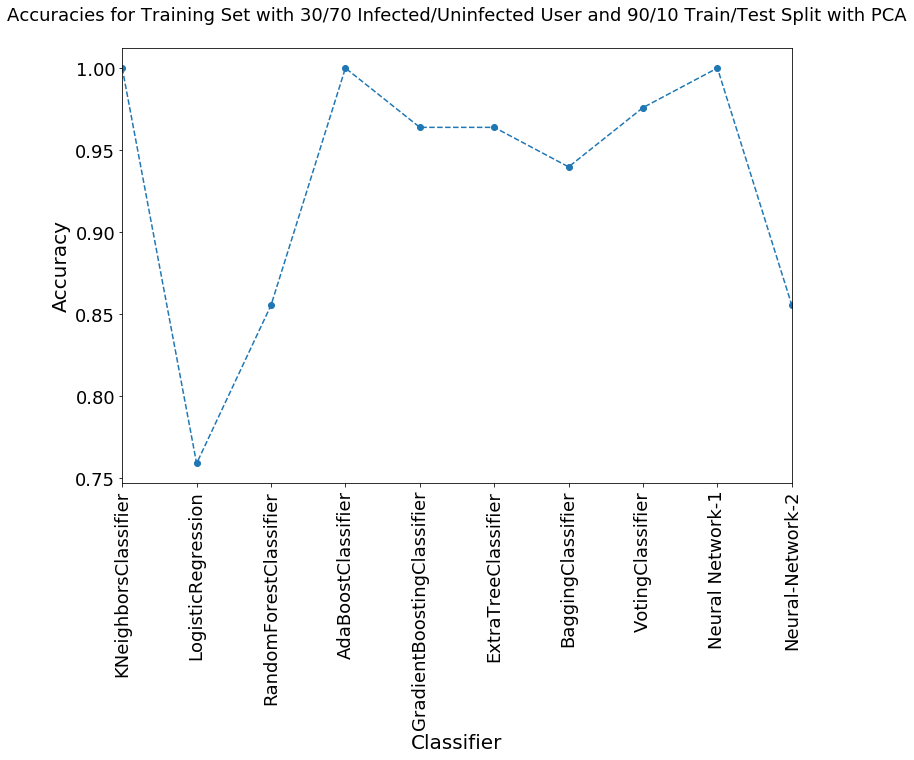

In [523]:
get_accuracy_plot(table_90_75_train_PCA,'Accuracies for Training Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

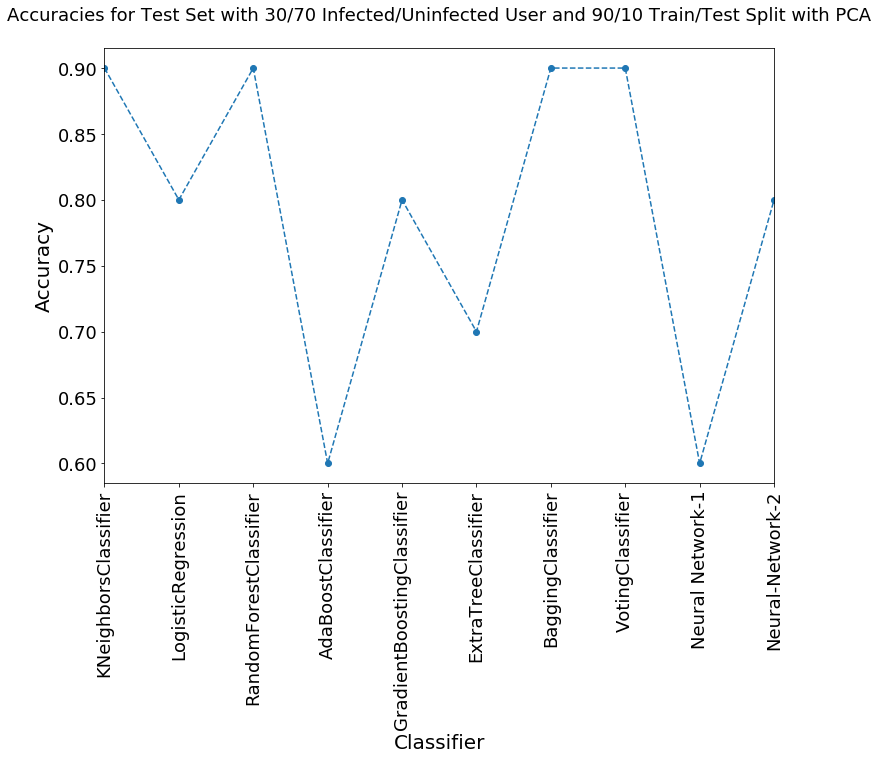

In [524]:
get_accuracy_plot(table_90_75_test_PCA,'Accuracies for Test Set with 30/70 Infected/Uninfected User and 90/10 Train/Test Split with PCA')

In [525]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To toggle code, click <a href="javascript:code_toggle()">here</a>.''')